## **Rough work and everything**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import glob, os, reA
import matplotlib.pyplot as plt
from datetime import  datetime
from ipywidgets import widgets, interactive

In [2]:
dt = datetime.today().strftime(format='%d-%m-%Y')

### **Establish parent directory**

In [3]:
#uniqueness in directory and file names is assumed for all analyses
sars_dir = "bioinformatics/github/covid/data/SarsGenomics/SARS-CoV-2"
home_dir = os.getenv('HOME')
parent_dir = glob.glob(f'{home_dir}/{sars_dir}', recursive=True)[0]

### **Metadata**

In [ ]:
df_meta = pd.read_excel(glob.glob(f'{parent_dir}/**/COVID19-resultsCts-merged-cln.xlsx', recursive=True)[0])
# glob(f'{parent_dir}/**/pc-nc_QC-QA_03-11-2021.xlsx', recursive=True)[0])[['CASE_ID', 'S_NUM']]#, 'G_COV', 'LIN', 'DT_SAM_RECEP', 'DT_SAM_COLL']]

In [ ]:
# drc_meta = pd.read_excel(glob.glob(f'{home_dir}/Documents/drc_meta.xlsx', recursive=True)[0])

In [ ]:
below10 = drc_meta[drc_meta['cubit0'] <= 10]

NameError: name 'drc_meta' is not defined

In [ ]:
below10.head()

<AxesSubplot:xlabel='cubit0', ylabel='coverage'>

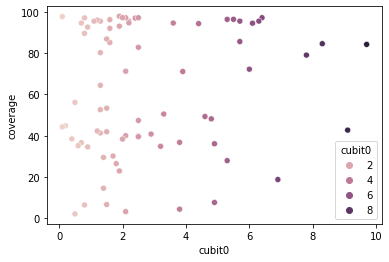

In [403]:
import seaborn as sns
sns.scatterplot(below10['cubit0'], below10['coverage'], hue=below10['cubit0'])

<AxesSubplot:xlabel='cubit0', ylabel='coverage'>

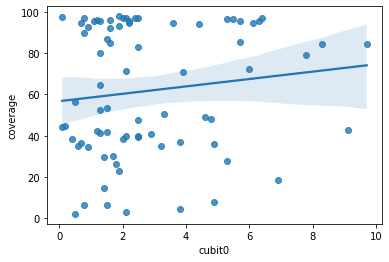

In [405]:
import seaborn as sns
sns.regplot(below10['cubit0'], below10['coverage'])

In [36]:
df_hb = pd.read_excel(glob.glob(f'{home_dir}/Documents/drc_meta.xlsx', recursive=True)[0], header=2)

In [37]:
# df_hb.head()

,SAMPLE ID,DATE SAMPLE COLLECTED,CASE TYPE,PATIENT NAMES,AGE,AGE UNIT,SEX,SAMPLE COLLECTED BY,DATE SAMPLE SENT TO NAIROBI,PCR RESULTS [GENEXPERT],PANBIO RDT RESULTS,SD BIOSENSER RDT RESULTS,VARIANT ILRI RESULTS,CT VALUES,COMMENTS
0,HBCTRH/4198/2021,28th JUL 2021,INITIAL,DERIS MECHASA,46,YEARS,FEMALE,OSUMBA,5TH AUG 2021,NaN,POSITIVE,NaN,21A Delta,NaN,NaN
1,HBCTRH/4285/2021,29th JUL 2021,INITIAL,EDWARD ONANO,68,YEARS,MALE,OSUMBA,5th AUG 2021,NaN,POSITIVE,NaN,21A Delta,NaN,NaN
2,NaN,21st AUG 2021,INITIAL,CHRISTINE AKOTH OTIENO,25,YEARS,FEMALE,OSUMBA,6TH AUG 2021,NaN,POSITIVE,NaN,21A Delta,28.0,NaN
3,HBCTRH/4359/2021,4th AUG 2021,INITIAL,HELLEN NAMBWIRE OBALLE,34,YEARS,FEMALE,OSUMBA,6th AUG 2021,NaN,POSITIVE,NaN,CT VALUE WAS LOW,39.0,NaN
4,HBCTRH/4430/2021,4th AUG 2021,INITIAL,JOHN ODHIAMBO OM0NDI,28,YEARS,MALE,OSUMBA,6th AUG 2021,NaN,POSITIVE,NaN,21A Delta,19.0,NaN


In [38]:
df_hb_res = df_hb[['SAMPLE ID', 'PCR RESULTS [GENEXPERT]', 'PANBIO RDT  RESULTS', 'SD BIOSENSER RDT RESULTS']]

### **County feedbacks**

In [7]:
df_pos = pd.read_excel(glob.glob(f'{home_dir}/**/{sars_dir}/Outputs/COVID19-results-merged.xlsx', recursive=True)[0])

In [17]:
df_seq18_raw = pd.read_excel(glob.glob(f'{home_dir}/**/{sars_dir}/KnowledgeBrief/metadata-seq-MS-ILL_seq18_18-10-2021.xlsx', recursive=True)[0])
df_seq18 = df_seq18_raw.merge(df_pos[['S_NUM', 'CASE_ID']], left_on='S_NUM', right_on='S_NUM')#.drop('SUM_Y', axis=1)

In [22]:
df_seq18_raw = pd.read_excel(glob.glob(f'{home_dir}/**/{sars_dir}/KnowledgeBrief/metadata-seq-MS-ILL_seq19_25-10-2021.xlsx', recursive=True)[0])
df_seq18 = df_seq18_raw.merge(df_pos[['S_NUM', 'CASE_ID']], left_on='S_NUM', right_on='S_NUM')#.drop('SUM_Y', axis=1)

In [23]:
df_seq18.head()

,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,...,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10,CASE_ID
0,COVC24643,32.0,F,Insurer,Kenya,Migori,No,NaN,NaN,FC,...,NaN,NaN,NaN,NaN,"D119_F120del, F120L","D63G, R203M",NaN,NaN,NaN,MCRH/MIG18912/2021
1,COVC24644,40.0,M,Lab technologist,Kenya,Migori,No,NaN,NaN,FC,...,I82T,NaN,"V82A, L116F, T120I",NaN,"D119_F120del, F120L","D63G, D377Y",NaN,NaN,NaN,MCRH/MIG18957/2021
2,COVC24645,31.0,M,Journalist,Kenya,Migori,No,NaN,NaN,FC,...,I82T,NaN,"V82A, L116F, T120I",NaN,"A65S, D119_F120del, F120L","D63G, R203M, D377Y",NaN,NaN,NaN,MCRH/MIG18958/2021
3,COVC24646,27.0,M,Pharmacist,Kenya,Migori,No,NaN,NaN,FC,...,I82T,NaN,"E16K, Y18*, F87F",NaN,"M1?, L4H, D119_F120del, F120L",D63G,NaN,NaN,NaN,MCRH/MIG18959/2021
4,COVC24648,47.0,F,Education Academic,Kenya,Nyamira,No,NaN,NaN,GW:FC:CO:RN:NV:H:LT:P-J:P-M,...,I82T,NaN,"V82A, T120I",NaN,"G8V, D119_F120del, F120L","T16T, D63G, R203M, G215C, D377Y",NaN,NaN,NaN,NCRH/7854/2021


In [ ]:
counties = [('Homabay', 'HBCTRH'), ('Migori', 'MCRH'), ('Kisii', 'KCRH'), ('Nyamira', 'NCRH'), ('Siaya', 'COV')]

In [24]:
mask1 = df_seq18['COUNT_RES'] == 'Homabay'
mask2 = df_seq18['CASE_ID'].str.contains('HBCTRH')
mask3 = df_seq18['CASE_ID'].str.contains('HBCRTH')

In [42]:
df_homa = df_seq18[mask1 | mask2 | mask3 == True]#.head()

In [43]:
df_homa


,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,...,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10,CASE_ID
20,COVC24670,54.0,F,NaN,Kenya,Homabay,No,NaN,NaN,GW;CO;SB;H;P-C,...,I82T,NaN,"V82A, T120I",NaN,"D119_F120del, F120L","D63G, R203M, G215C, D377Y",NaN,NaN,NaN,HCTRH/5658/2021
21,COVC24671,58.0,M,NaN,Kenya,Homabay,No,NaN,NaN,GW;FC;H;P-C,...,I82T,NaN,"V82A, T120I",NaN,"D119_F120del, F120L","D63G, R203M, G215C, D377Y",NaN,NaN,NaN,HCTRH/5661/2021
22,COVC24675,72.0,F,NaN,Kenya,Homabay,No,NaN,NaN,GW;FC;CO;D;H;P-C;P-J,...,I82T,NaN,"V82A, L116F, T120I",NaN,"D119_F120del, F120L","D63G, R203M, D377Y",NaN,NaN,NaN,HCTRH/5698/2021
27,COVC24698,36.0,M,Farmer,Kenya,Homabay,No,NaN,NaN,CO;RN;FC;GW,...,I82T,NaN,"V82A, L116F, T120I",NaN,"D119_F120del, F120L","D63G, L113L, R203M, D377Y",NaN,NaN,NaN,MCRH/MIG/19009


In [27]:
mask4 = df_seq18['COUNT_RES'] == 'Siaya'
# mask5 = df_seq18['CASE_ID'].str.contains('COV')
# mask6 = df_pos['CASE_ID'].str.contains('HBCRTH')

In [28]:
df_siaya = df_seq18[mask4 == True]
df_siaya

,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,...,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10,CASE_ID


In [30]:
mask6 = df_seq18['COUNT_RES'] == 'Migori'
mask7 = df_seq18['CASE_ID'].str.contains('MCRH') == True
mask8 = df_seq18['CASE_ID'].str.contains('MIG') == True

In [31]:
df_mig = df_seq18[mask6 | mask7 | mask8 == True]
df_mig

,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,...,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10,CASE_ID
0,COVC24643,32.0,F,Insurer,Kenya,Migori,No,NaN,NaN,FC,...,NaN,NaN,NaN,NaN,"D119_F120del, F120L","D63G, R203M",NaN,NaN,NaN,MCRH/MIG18912/2021
1,COVC24644,40.0,M,Lab technologist,Kenya,Migori,No,NaN,NaN,FC,...,I82T,NaN,"V82A, L116F, T120I",NaN,"D119_F120del, F120L","D63G, D377Y",NaN,NaN,NaN,MCRH/MIG18957/2021
2,COVC24645,31.0,M,Journalist,Kenya,Migori,No,NaN,NaN,FC,...,I82T,NaN,"V82A, L116F, T120I",NaN,"A65S, D119_F120del, F120L","D63G, R203M, D377Y",NaN,NaN,NaN,MCRH/MIG18958/2021
3,COVC24646,27.0,M,Pharmacist,Kenya,Migori,No,NaN,NaN,FC,...,I82T,NaN,"E16K, Y18*, F87F",NaN,"M1?, L4H, D119_F120del, F120L",D63G,NaN,NaN,NaN,MCRH/MIG18959/2021
27,COVC24698,36.0,M,Farmer,Kenya,Homabay,No,NaN,NaN,CO;RN;FC;GW,...,I82T,NaN,"V82A, L116F, T120I",NaN,"D119_F120del, F120L","D63G, L113L, R203M, D377Y",NaN,NaN,NaN,MCRH/MIG/19009
28,COVC24699,30.0,F,Business,Kenya,Migori,No,NaN,NaN,CO;RN;FC;H;LA,...,I82T,NaN,"V82A, T120I",NaN,"D119_F120del, F120L","D63G, R203M, G215C, D377Y",NaN,NaN,NaN,MCRH/MIG/19010


In [32]:
mask9 = df_seq18['COUNT_RES'] == 'Kisii'
mask10 = df_seq18['CASE_ID'].str.contains('NCRH') == True
# mask11 = df_seq18['CASE_ID'].str.contains('LKP') == True

In [33]:
df_nyamira = df_seq18[mask10 == True]#[mask11 == False]
df_nyamira

,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,...,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10,CASE_ID
4,COVC24648,47.0,F,Education Academic,Kenya,Nyamira,No,NaN,NaN,GW:FC:CO:RN:NV:H:LT:P-J:P-M,...,I82T,NaN,"V82A, T120I",NaN,"G8V, D119_F120del, F120L","T16T, D63G, R203M, G215C, D377Y",NaN,NaN,NaN,NCRH/7854/2021
5,COVC24649,30.0,F,NaN,Kenya,Nyamira,No,NaN,NaN,FC:CO:RN:H:P-J:LT,...,I82T,NaN,"V82A, T120I",NaN,"D119_F120del, F120L","D63G, R203M, G215C, T366I, D377Y",NaN,NaN,NaN,NCRH/7870/2021
6,COVC24650,42.0,F,Security guards,Kenya,Nyamira,No,NaN,NaN,FC:CO:H:P-J,...,I82T,NaN,"V82A, T120I",NaN,"D119_F120del, F120L","D63G, Q70H, R203M, G215C, D377Y",NaN,NaN,NaN,NCRH/7871/2021
7,COVC24651,27.0,F,NaN,Kenya,Nyamira,No,NaN,NaN,GW:FC:CO:ST:H:P-J:P-M:LS:LT,...,"I82T, S99S",NaN,NaN,NaN,"D119_F120del, F120L",D63G,NaN,NaN,NaN,NCRH/7872/2021
8,COVC24652,31.0,F,Clergy Religion,Kenya,Kisii,No,NaN,NaN,Unknown,...,"V23L, I24L, I82T","F2L, H3Y, H3L",NaN,NaN,"D119_F120del, F120L",D63G,NaN,NaN,NaN,NCRH/7873/2021
9,COVC24653,15.0,M,NaN,Kenya,Nyamira,No,NaN,NaN,NA:FC:CO:RN,...,I82T,NaN,"V82A, T120I",NaN,"D119_F120del, F120L",D63G,NaN,NaN,NaN,NCRH/7874/2021
10,COVC24654,35.0,F,NaN,Kenya,Nyamira,No,NaN,NaN,NA:FC:CO,...,I82T,NaN,"V82A, T120I",NaN,"D119_F120del, F120L","D63G, R203M, G215C, D377Y, Q418H",NaN,NaN,NaN,NCRH/7875/2021
11,COVC24655,75.0,F,NaN,Kenya,Nyamira,No,NaN,NaN,CO:RN,...,I82T,"T45I, K48I, K48N, Q51Q",NaN,NaN,"D119_F120del, F120L",D63G,NaN,NaN,NaN,NCRH/7876/2021
12,COVC24656,25.0,F,NaN,Kenya,Nyamira,No,NaN,NaN,GW:FC:CO:ST:NV:H:LS:LT,...,I82T,NaN,"V82A, L116F, T120I",NaN,"D119_F120del, F120L","D63G, D128H, R203M, D377Y",NaN,NaN,NaN,NCRH/7877/2021
13,COVC24657,25.0,M,NaN,Kenya,Nyamira,Yes,Kisii,NaN,GW:CO:ST:RN:SB:H:LS:LT:P-A:P-J,...,I82T,"D61H, D61V, D61D","V82A, T120I",NaN,"D119_F120del, F120L","D63G, R203M, G215C, G238C",NaN,NaN,T38I,NCRH/7882/2021


In [34]:
mask12 = df_seq18['COUNT_RES'] == 'Kisii'
mask13 = df_seq18['CASE_ID'].str.contains('KCRH') == True
# mask14 = df_pos['CASE_ID'].str.contains('LKP') == True

In [35]:
df_kisii = df_seq18[mask12 | mask13 == True]#[mask11 == False]
df_kisii

,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,...,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10,CASE_ID
8,COVC24652,31.0,F,Clergy Religion,Kenya,Kisii,No,NaN,NaN,Unknown,...,"V23L, I24L, I82T","F2L, H3Y, H3L",NaN,NaN,"D119_F120del, F120L",D63G,NaN,NaN,NaN,NCRH/7873/2021
18,COVC24662,83.0,M,NaN,Kenya,Kisii,No,NaN,NaN,CO:H:P-C,...,I82T,NaN,"A64S, V82A, L116F, T120I",NaN,"E64D, D119_F120del, F120L","D63G, R203M, D377Y",NaN,NaN,NaN,NCRH/7923/2021


In [40]:
# df_pos_res = df_seq18[mask1 | mask2 == True][['CASE_ID', 'RESULT', 'S_NUM']]#.head()

In [37]:
df_pos_res.head()

,CASE_ID,RESULT,S_NUM
20,HCTRH/5658/2021,Positive,COVC24670
21,HCTRH/5661/2021,Positive,COVC24671
22,HCTRH/5698/2021,Positive,COVC24675
27,MCRH/MIG/19009,Positive,COVC24698


In [38]:
df_western = df_homa.append([df_siaya, df_mig, df_nyamira, df_kisii])#[['CASE_ID', 'RESULT', 'S_NUM', 'DT_CONF']]#.head()

In [39]:
df_western.head()

,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,...,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10,CASE_ID
20,COVC24670,54.0,F,NaN,Kenya,Homabay,No,NaN,NaN,GW;CO;SB;H;P-C,...,I82T,NaN,"V82A, T120I",NaN,"D119_F120del, F120L","D63G, R203M, G215C, D377Y",NaN,NaN,NaN,HCTRH/5658/2021
21,COVC24671,58.0,M,NaN,Kenya,Homabay,No,NaN,NaN,GW;FC;H;P-C,...,I82T,NaN,"V82A, T120I",NaN,"D119_F120del, F120L","D63G, R203M, G215C, D377Y",NaN,NaN,NaN,HCTRH/5661/2021
22,COVC24675,72.0,F,NaN,Kenya,Homabay,No,NaN,NaN,GW;FC;CO;D;H;P-C;P-J,...,I82T,NaN,"V82A, L116F, T120I",NaN,"D119_F120del, F120L","D63G, R203M, D377Y",NaN,NaN,NaN,HCTRH/5698/2021
27,COVC24698,36.0,M,Farmer,Kenya,Homabay,No,NaN,NaN,CO;RN;FC;GW,...,I82T,NaN,"V82A, L116F, T120I",NaN,"D119_F120del, F120L","D63G, L113L, R203M, D377Y",NaN,NaN,NaN,MCRH/MIG/19009
0,COVC24643,32.0,F,Insurer,Kenya,Migori,No,NaN,NaN,FC,...,NaN,NaN,NaN,NaN,"D119_F120del, F120L","D63G, R203M",NaN,NaN,NaN,MCRH/MIG18912/2021


In [41]:
df_western.to_excel(f"{glob.glob(f'{parent_dir}/CountyFeedbacks')[0]}/COVID19-results-western_merged_{dt}.xlsx", index=False, float_format='%.1f')

In [134]:
df_seq_summ = pd.read_excel(glob.glob(f'{home_dir}/**/{sars_dir}/Outputs/seq-summary-metadata_29-09-2021.xlsx', recursive=True)[0])

In [135]:
df_seq_summ.head(2)

,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt,lib_prep,primer_set
0,COVC11310,20C,B.1,59.3,Run1,09-02-2021,Nextera_XT,ARTIC_V1
1,COVC00854,20C,B.1,94.9,Run7,18-05-2021,Run7,ARTIC_V3


In [136]:
df_ct = pd.read_excel(glob.glob(f'{home_dir}/**/{sars_dir}/Outputs/runsheet-cts.xlsx', recursive=True)[0])

In [137]:
df_ct.head(2)

,Sample_Name,Well_Position,Dt_Run,Ct_Mean
0,COVC00137,D9,2020-06-03 17:04:05,37.6
1,COVC00154,F2,2020-06-03 17:04:05,35.2


In [138]:
df_res_mrg = df_western.merge(df_ct, how='left', right_on='Sample_Name', left_on='S_NUM')

In [139]:
df_res_mrg.head()

,CASE_ID,RESULT,S_NUM,DT_CONF,Sample_Name,Well_Position,Dt_Run,Ct_Mean
0,HBCTRH/4198/2021,Positive,COVC24024,2021-08-02 00:00:00,COVC24024,A1,2021-08-02 17:05:06,22.8
1,HBCTRH/4285/2021,Positive,COVC24025,2021-08-02 00:00:00,COVC24025,A2,2021-08-02 17:05:06,15.3
2,HBCTRH/5142/2021,Positive,COVC24292,2021-09-02 00:00:00,COVC24292,A1,2021-09-02 20:50:25,26.7
3,HBCTRH/5188/2021,Negative,COVC24293,2021-09-02 00:00:00,NaN,NaN,NaT,NaN
4,HBCTRH/5197/2021,Negative,COVC24294,2021-09-02 00:00:00,NaN,NaN,NaT,NaN


In [140]:
df_res_ct_mrg = df_res_mrg.merge(df_seq_summ, how='left', right_on='sequence_name', left_on='Sample_Name')

In [141]:
df_res_ct_mrg.head()

,CASE_ID,RESULT,S_NUM,DT_CONF,Sample_Name,Well_Position,Dt_Run,Ct_Mean,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt,lib_prep,primer_set
0,HBCTRH/4198/2021,Positive,COVC24024,2021-08-02 00:00:00,COVC24024,A1,2021-08-02 17:05:06,22.8,COVC24024,21A (Delta),B.1.617.2,95.8,Run13_NS,10-08-2021,NEBNext_FS,ARTIC_V3
1,HBCTRH/4285/2021,Positive,COVC24025,2021-08-02 00:00:00,COVC24025,A2,2021-08-02 17:05:06,15.3,COVC24025,21A (Delta),B.1.617.2,93.3,Run13_NS,10-08-2021,NEBNext_FS,ARTIC_V3
2,HBCTRH/5142/2021,Positive,COVC24292,2021-09-02 00:00:00,COVC24292,A1,2021-09-02 20:50:25,26.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HBCTRH/5188/2021,Negative,COVC24293,2021-09-02 00:00:00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HBCTRH/5197/2021,Negative,COVC24294,2021-09-02 00:00:00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
df_res_ct_mrg.to_excel(f"{glob.glob(f'{parent_dir}/CountyFeedbacks')[0]}/COVID19-results-western_merged_{dt}.xlsx", index=False, float_format='%.1f')

In [143]:
l = [('a', 'b', 'c', 'x'), ('e', 'f', 'g', 'y'), ('h', 'i', 'j', 'z')]

In [144]:
def get_var_attr(x):
    prot_mut = [];alt_freq = [];ref2alt_qual = [];coverage = []
    prot_mut.extend(x[0])
    alt_freq.extend(x[1])
    ref2alt_qual.extend(x[2])
    coverage.extend(x[3])
    return prot_mut, alt_freq, ref2alt_qual, coverage#print(f'{prot_mut}\n{alt_freq}\n{ref2alt_qual}\n{coverage}')

In [145]:
get_var_attr(l[0])

(['a'], ['b'], ['c'], ['x'])

In [ ]:
l = [('', 'b', 1.0, 100), ('e', 'f', 2.0, 200), ('h', 'i', 3.0, 300)]

In [ ]:
def get_var_attr(x):
    prot_mut = '';alt_freq = '';ref2alt_qual = '';g_coverage = ''
    prot_mut += x[0]
    alt_freq += str(x[1])
    ref2alt_qual += str(x[2])
    g_coverage += str(x[3])
    return prot_mut, alt_freq, ref2alt_qual, g_coverage

In [ ]:
a = map(get_var_attr, l)

In [ ]:
variants = ''; altfreq = ''; refaltratio = ''; gencov = ''
for i in a:
    pm,af,raq,gc = i
    variants += f', {pm}'
    altfreq += f', {af}'
    refaltratio += f', {raq}'
    gencov += f', {gc}'
x = '{}\n{}\n{}\n{}'.format(variants.lstrip(', '), altfreq.lstrip(', '), refaltratio.lstrip(', '), gencov.lstrip(', '))
y = f"{variants.lstrip(', ')}\n{altfreq.lstrip(', ')}\n{refaltratio.lstrip(', ')}\n{gencov.lstrip(', ')}"

In [ ]:
print(x)

In [ ]:
y = 'p|h||F|g'

In [ ]:
p = y.split("|")

In [ ]:
set(y.split("|"))

In [ ]:
if not True or y != '': print(y)

In [ ]:
round(98.6)

In [ ]:
3/2


In [ ]:
float('1.5')

In [ ]:
'GT:GQ:PS:UG:UQ'.split(':')

In [18]:
df_DRC = (pd.read_excel(glob.
glob(f'{home_dir}/**/{sars_dir}/**/seq_drc_131samples_02_09_2021.xlsx', recursive=True)[0], header=1)
          [['Case ID', 'Age']])

In [19]:
df_DRC.head()

,Case ID,Age
0,723,39.0
1,212,30.0
2,750,54.0
3,146,38.0
4,331,41.0


In [28]:
df_DRC2 = pd.read_excel(glob.
glob(f'{home_dir}/Downloads/drc_meta.xlsx', recursive=True)[0], sheet_name='Sheet1')


In [29]:
df_DRC2.head()

,ID SAMPLES,Region or city,Country,date-of-collection-,Sex,Age,Symptoms,symptoms,CT value
0,1,Bukavu,DRC,29-05-2020,M,46,"Fever, difficulty in breathing, cough, Asthenia,",FC;SB;CO;GW,26.86
1,2,Bukavu,DRC,29-05-2020,M,38,"Fever, difficulty in breathing, cough, Asthenia,",FC;SB;CO;GW,28.41
2,4,Bukavu,DRC,29-05-2020,F,39,"Cough , cold, lack appetite, Asthenia, lack of...",CO;RN;LT;GW;LS,28.76
3,12,Bukavu,DRC,NaN,M,28,"Fever, difficulty in breathing, cough, Asthenia,",FC;SB;CO;GW,29.00
4,15,Bukavu,DRC,NaN,M,41,"Cough , cold, lack appetite, Asthenia,",CO;RN;LT;GW,25.22


In [35]:
(df_DRC.merge(df_DRC2, how='left', left_on='Case ID', right_on='ID SAMPLES').
to_excel(f"{glob.glob(f'{home_dir}/Downloads', recursive=True)[0]}/drc_meta2_{dt}.xlsx", index=False))

In [34]:
parent_dir

'/home/douso/SARS-CoV-2'

### **Verify Cts for Western samples**

In [5]:
df_western = pd.read_excel(glob.
glob(f'{home_dir}/**/Outputs/Homabay_Kisii_Migori_Nyamira_Siaya_20210930.xlsx', recursive=True)[0])


In [7]:
df_western.head()

,CASE_ID,S_NUM,NAME,AGE,AGE_UNIT,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,...,TRAV_FROM,QUAR_PLACE,SYMPS,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF,Well_Position,Ct_Mean,Dt_Run
0,HBCTRH/4198/2021,COVC24024,PERIS MECHESA MCHELE,47.0,Years,F,Business,Kenya,Homabay,HOMABAY TOWN,...,Nairobi,NaN,GW;F/C;CO;ST;RN;H;I/C,2021-07-28,2021-07-30,Positive,2021-08-02,A1,22.8,2021-08-02 17:05:06
1,HBCTRH/4285/2021,COVC24025,EDWARD ONANO ODIDO,68.0,Years,M,NaN,Kenya,Homabay,HOMABAY TOWN,...,Nairobi,NaN,F/C;H;P,2021-07-29,2021-07-30,Positive,2021-08-02,A2,15.3,2021-08-02 17:05:06
2,HBCTRH/,COVC24033,CHRISTINE AKOTH OTIENO,25.0,Years,F,NaN,Kenya,Homabay,North Karachuonyo,...,KENDU BAY,NaN,RN,2021-08-04,2021-08-06,Positive,2021-08-06,A6,27.8,2021-08-06 19:38:50
3,HBCTRH/4359/2021,COVC24034,HELLEN NABWIRE MULUNDU,34.0,Years,F,Banker,Kenya,Homabay,Homabay Town,...,"KISUMU, KITALE",NaN,H;P-A;P-C,2021-08-04,2021-08-06,Positive,2021-08-06,A7,39.0,2021-08-06 19:38:50
4,HBCTRH/4374/2021,COVC24035,LASTOR OCHIENG,33.0,Years,M,NaN,Kenya,Homabay,North Karachuonyo,...,HOMABAY,NaN,NaN,2021-08-04,2021-08-06,Positive,2021-08-06,A8,23.7,2021-08-06 19:38:50


In [10]:
df_raw_cts = pd.read_excel(glob.
glob(f'{home_dir}/**/Outputs/runsheet-raw-cts.xlsx', recursive=True)[0])


In [8]:
df_raw_cts.head()

,Sample_Name,Reporter,CT,Ct_Mean,Well_Position,Dt_Run
0,COVC24643,VIC,35.8,35.8,C8,2021-10-01 18:48:59
1,COVC24646,VIC,34.1,34.1,C11,2021-10-01 18:48:59
2,COVC24646,FAM,31.9,31.9,C11,2021-10-01 18:48:59
3,COVC24645,VIC,18.9,18.9,C10,2021-10-01 18:48:59
4,COVC24645,FAM,18.2,18.2,C10,2021-10-01 18:48:59


In [12]:
df_west_raw_cts = df_raw_cts[df_raw_cts['Sample_Name'].isin(df_western['S_NUM'])]

In [31]:
df_west_raw = df_western[['CASE_ID', 'S_NUM']].merge(df_west_raw_cts, left_on='S_NUM', right_on='Sample_Name').drop('S_NUM', axis=1)

In [28]:
df_avg_cts = pd.read_excel(glob.
glob(f'{home_dir}/**/Outputs/COVID19-resultsCts-merged-cln.xlsx', recursive=True)[0])[['S_NUM', 'RESULT', 'Ct_Mean']].rename(columns={'Ct_Mean': 'Avg_Ct'})

In [22]:
df_west_raw.head()

,CASE_ID,S_NUM,Reporter,CT,Ct_Mean,Well_Position,Dt_Run
0,HBCTRH/4198/2021,COVC24024,FAM,22.1,22.1,A1,2021-08-02 17:05:06
1,HBCTRH/4198/2021,COVC24024,VIC,23.6,23.6,A1,2021-08-02 17:05:06
2,HBCTRH/4198/2021,COVC24024,CY5,29.9,29.9,A1,2021-08-02 17:05:06
3,HBCTRH/4285/2021,COVC24025,VIC,16.2,16.2,A2,2021-08-02 17:05:06
4,HBCTRH/4285/2021,COVC24025,FAM,14.3,14.3,A2,2021-08-02 17:05:06


In [29]:
df_avg_cts.head()

,S_NUM,RESULT,Avg_Ct
0,COVC00001,Negative,NaN
1,COVC00002,Negative,NaN
2,COVC00003,Negative,NaN
3,COVC00004,Negative,NaN
4,COVC00005,Negative,NaN


In [33]:
(df_west_raw.merge(df_avg_cts, how='left', left_on='Sample_Name', right_on='S_NUM').drop('Sample_Name', axis=1).
to_excel(f"{glob.glob(f'{home_dir}/**/Outputs', recursive=True)[0]}/westernQA_{dt}.xlsx", index=False))

In [48]:
df_gisaid_bk = pd.read_excel(glob.
glob(f'{parent_dir}/**/Submissions/20210914_ILRI_gisaid_submission_metadata_curated.xls', recursive=True)[0], header=1, sheet_name='Submissions')[['Sample ID given by the submitting laboratory', 'Comment']]

In [49]:
df_gisaid_bk

,Sample ID given by the submitting laboratory,Comment
0,KEM-21-03-94501,Gap of 1 nucleotide(s) found at refpos 28254 (...
1,KEMRI_02_92681,Gap of 4 nucleotide(s) found at refpos 11286 (...
2,KEM-21-03-95374,Gap of 4 nucleotide(s) found at refpos 11286 (...
3,KEMRI_02_91770,Gap of 4 nucleotide(s) found at refpos 11286 (...
4,KEM-21-03-94391,Gap of 4 nucleotide(s) found at refpos 11286 (...
...,...,...
99,COVC23609,Stretches of NNNs (4.53% of overall sequence)....
100,KEMRI_01_90725,Stretches of NNNs (4.54% of overall sequence)....
101,COVC24050,Stretches of NNNs (4.62% of overall sequence)....
102,COVC23693,Stretches of NNNs (4.64% of overall sequence)....


In [53]:
(df_gisaid_bk[df_gisaid_bk['Comment'].str.contains('stop') == False].
to_excel(f"{glob.glob(f'{home_dir}/**/Submissions', recursive=True)[0]}/20210914_ILRI_gisaid_submission_metadata_curated-others_{dt}.xlsx", index=False))

In [86]:
df_MS = pd.read_excel(glob.
glob(f'{parent_dir}/**/metadata-seq-MS-ILL-ONT_05-10-2021.xlsx', recursive=True)[0])[['S_NUM', 'G_COV', 'LIN', 'DT_SAM_RECEP', 'DT_SAM_COLL']]

In [74]:
df_MS70 = df_MS[df_MS['G_COV'] >= 70.0]
df_kemri70 = df_MS70[df_MS70['S_NUM'].str.contains('KEM')]
# (df_kemri70['S_NUM'].
#  to_csv(f"{glob.glob(f'{home_dir}/**/COV_ILRI_run1-14', recursive=True)[0]}/nextclade/all_kemri_upto_seq15-above70IDs_{dt}.tsv", 
#         index=False, header=False, sep='\t'))

In [66]:
df_MS[df_MS['LIN'].isin(['AY.4', 'AY.12', 'B.1.617.2'])]

,S_NUM,G_COV,LIN
510,COVC23886,98.0,AY.4
511,COVC23887,98.9,AY.4
512,COVC23888,98.0,AY.4
513,COVC23894,96.1,AY.12
515,COVC23911,98.7,AY.4
...,...,...,...
1105,DRC-BKV-48,89.5,AY.4
1107,DRC-BKV-73,85.1,B.1.617.2
1110,NHRL-S007,95.7,B.1.617.2
1111,NHRL-S009,89.3,B.1.617.2


In [75]:
df_kemri70[df_kemri70['LIN'].isin(['AY.4', 'AY.12', 'B.1.617.2'])]

,S_NUM,G_COV,LIN


In [78]:
df_kemri70['G_COV'].mean()

94.23231707317072

In [99]:
df_MS[df_MS['LIN'].isin(['B.1.617.2'])].sort_values('G_COV', ascending=False).to_excel('/home/douso/deltas.xlsx')

In [82]:
df_MS[df_MS['LIN'].isin(['AY.4'])].sort_values('G_COV', ascending=False)

,S_NUM,G_COV,LIN
511,COVC23887,98.9,AY.4
515,COVC23911,98.7,AY.4
516,COVC23915,98.4,AY.4
521,COVC23932,98.3,AY.4
523,COVC23946,98.1,AY.4
527,COVC23960,98.1,AY.4
510,COVC23886,98.0,AY.4
512,COVC23888,98.0,AY.4
525,COVC23957,98.0,AY.4
526,COVC23959,98.0,AY.4


In [81]:
df_MS[df_MS['LIN'].isin(['AY.12'])].sort_values('G_COV', ascending=False)

,S_NUM,G_COV,LIN
572,COVC24048,96.8,AY.12
513,COVC23894,96.1,AY.12
533,COVC23977,95.1,AY.12
581,COVC24068,92.3,AY.12
592,COVC24145,90.2,AY.12
579,COVC24055,85.2,AY.12
563,COVC24037,80.8,AY.12
631,COVC24205,80.7,AY.12
522,COVC23936,78.5,AY.12


In [53]:
(df_gisaid_bk[df_gisaid_bk['Comment'].str.contains('stop') == False].
to_excel(f"{glob.glob(f'{home_dir}/**/Submissions', recursive=True)[0]}/20210914_ILRI_gisaid_submission_metadata_curated-others_{dt}.xlsx", index=False))

In [7]:
df_ids = pd.read_csv(glob.
glob(f'{parent_dir}/**/all_kemri_phyloIDs_07-10-2021.csv', recursive=True)[0], names=['id'])#[['S_NUM', 'G_COV', 'LIN']]

In [88]:
df_ids2 = pd.read_csv(glob.
glob(f'{parent_dir}/**/all_kemri_phyloIDs-lin_07-10-2021.csv', recursive=True)[0], names=['id', 'lin'])#[['S_NUM', 'G_COV', 'LIN']]

In [87]:
df_MS.head()

,S_NUM,G_COV,LIN,DT_SAM_RECEP,DT_SAM_COLL
0,COCV11310,59.8,NaN,NaT,NaT
1,COVC03617,98.6,B.1,NaT,2020-07-06
2,COVC03665,97.5,B.1.119,NaT,2020-07-06
3,COVC03696,98.7,B.1,NaT,2020-07-06
4,COVC03723,98.9,B.1,NaT,2020-07-06


In [100]:
df_all_kemri_meta = df_ids2.merge(df_MS[['S_NUM', 'G_COV', 'DT_SAM_RECEP', 'DT_SAM_COLL']], how='left', left_on='id', right_on='S_NUM')
# (df_all_kemri_meta.to_csv(f"{glob.glob(f'{home_dir}/**/KemriPhylo', recursive=True)[0]}/all_kemri_phyloIDs-lin-meta_{dt}.csv", 
#         index=False, header=False, sep=','))


In [102]:
df_all_kemri_meta.lin.value_counts()

B.1.1.7      117
B.1           14
A.23.1         9
B.1.530        8
B.1.617.2      6
Unknown        3
AY.4           3
B.1.351        3
A              3
B.1.1          2
B.1.525        1
B.1.549        1
A.23           1
B.1.446        1
AY.12          1
WUH-1REF       1
Name: lin, dtype: int64

In [119]:
start = pd.Timestamp('2019-12-01')
end = pd.Timestamp('2021-04-11')
scale = [0.00009, 0.00018, 0.00027, 0.00036, 0.00045, 0.00054, 0.00063, 0.00072, 0.00081, 0.0009, 0.00099, 0.00108, 0.00117, 0.00126, 0.00135, 0.00144, 0.00153,0.00162]
new_end = end.value + (5*0.00009)
dates = np.linspace(start.value, end.value, 11)

time = [pd.Timestamp(dt) for dt in dates]#.strftime('%Y-%m-%d %H')
timedelta = pd.Timedelta(time[2] - time[1])#*5
# time_last = time[-1] + pd.Timestamp(time5)

# dates = np.linspace(start.value, time_last, 18)

In [124]:
timedelta * 0.00009

Timedelta('0 days 00:06:26.467200')

In [121]:
dti = pd.date_range(start, periods=18, freq=timedelta)
[pd.Timestamp(dt).strftime('%Y-%m-%d %H') for dt in dti]

DatetimeIndex(['2019-12-01 00:00:00', '2020-01-19 16:48:00',
               '2020-03-09 09:36:00', '2020-04-28 02:24:00',
               '2020-06-16 19:12:00', '2020-08-05 12:00:00',
               '2020-09-24 04:48:00', '2020-11-12 21:36:00',
               '2021-01-01 14:24:00', '2021-02-20 07:12:00',
               '2021-04-11 00:00:00', '2021-05-30 16:48:00',
               '2021-07-19 09:36:00', '2021-09-07 02:24:00',
               '2021-10-26 19:12:00', '2021-12-15 12:00:00',
               '2022-02-03 04:48:00', '2022-03-24 21:36:00'],
              dtype='datetime64[ns]', freq='71568T')

In [19]:
set(df_ids.id) - set(df_ids2.id)#.shape

{'KEMRI_01_89637_A', 'KEMRI_01_89637_B'}

In [70]:
df_seq_summ = (pd.read_excel(glob.
glob(f'{home_dir}/**/{sars_dir}/**/seq-summary-metadata_18-10-2021.xlsx', recursive=True)[0])
          [['sequence_name', 'lineage', 'genome_coverage', 'tech']])

In [12]:
(df_ids.merge(df_seq_summ, how='left', left_on='id', right_on='sequence_name').drop('sequence_name', axis=1)
.to_csv(f"{glob.glob(f'{home_dir}/**/KemriPhylo', recursive=True)[0]}/all_kemri_phyloIDs-lin_{dt}.csv", 
        index=False, header=False, sep=','))

In [72]:
from Bio import Phylo

In [73]:
t = Phylo.read('/home/douso/Downloads/6mer_iqphylo_ed.nwk2', format='newick')

In [74]:
l =t.ladderize()

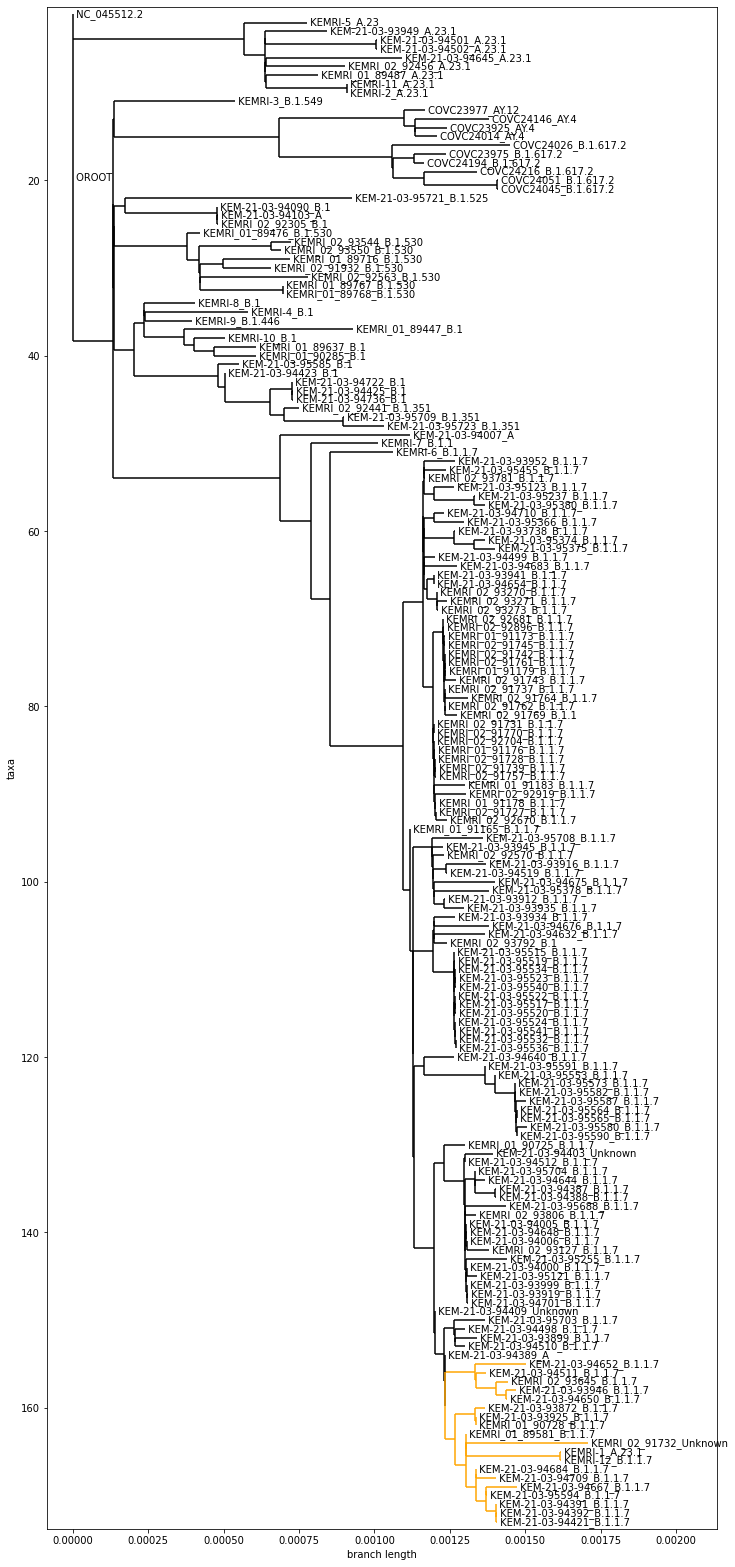

In [83]:
fig,ax=plt.subplots(figsize=(12,28))
clade = t.common_ancestor('KEM-21-03-94421_B.1.1.7', 'KEM-21-03-94652_B.1.1.7')
clade.color='#FFA500'
Phylo.draw(t, axes=ax, show_confidence=True)

In [25]:
df_seq_summ = pd.read_excel(glob.glob(f'{parent_dir}/**/metadata-seq-MS-ILL-ONT_05-10-2021.xlsx', recursive=True)[0])#usecols=['sequence_name', 'clade', 'lineage', 'genome_coverage'], 

In [26]:
df_seq_summ.head(2)

,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,...,E,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10
0,COVC11310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"L164L, S213fs",NaN,NaN,NaN,NaN,"P13S, R195K, P207T",NaN,NaN,NaN
1,COVC03617,55.0,F,None indicated,Kenya,Nairobi,No,NaN,DSH,None,...,NaN,NaN,NaN,NaN,NaN,NaN,R195K,NaN,NaN,NaN


In [27]:
df_lins_update = pd.read_excel(glob.glob(f'{home_dir}/**/Downloads/Lineage_country_county_samplingdate2.xlsx', recursive=True)[0])#usecols=['sequence_name', 'clade', 'lineage', 'genome_coverage'], 

In [28]:
df_lins_update.head(2)

,Sequence name,NAT,COUNT_RES,DT_SAM_COLL,Lineage,Sno.
0,COVC03617,Kenya,Nairobi,06-07-2020,B.1,176
1,COVC03665,Kenya,Nairobi,06-07-2020,B.1,177


In [29]:
df_seq_summ_lins = df_seq_summ[['S_NUM', 'G_COV', 'LIN']]

In [30]:
df_seq_summ_lins.merge(df_lins_update[['Sequence name', 'Lineage']], how='left', left_on='S_NUM', right_on='Sequence name').to_excel('/home/douso/Desktop/TRY.xlsx')

In [4]:
df_MS = pd.read_excel(glob.
glob(f'{parent_dir}/**/metadata-seq-MS-ILL-ONT_18-10-2021.xlsx', recursive=True)[0])#[['S_NUM', 'G_COV', 'LIN', 'DT_SAM_RECEP', 'DT_SAM_COLL']]

In [5]:
df_MS.columns

Index(['S_NUM', 'AGE_YRS', 'GEND', 'OCCU', 'NAT', 'COUNT_RES', 'TRAV_HIST',
       'TRAV_FROM', 'QUAR_PLACE', 'SYMPS', 'DT_SAM_COLL', 'DT_SAM_RECEP',
       'RESULT', 'DT_CONF', 'AVG_Ct', 'LIN', 'SCORP_CALL', 'CLADE', 'G_COV',
       'N_VAR', 'TECH', 'S', 'ORF1ab', 'ORF1a', 'ORF3a', 'ORF3b', 'E', 'M',
       'ORF6', 'ORF7a', 'ORF7b', 'ORF8', 'N', 'ORF9a', 'ORF9b', 'ORF10'],
      dtype='object')

In [8]:
df_wsu = df_MS[['S_NUM', 'COUNT_RES', 'TRAV_FROM', 'LIN', 'G_COV', 'TECH', 'DT_SAM_COLL', 'DT_SAM_RECEP']]
df_wsu[df_wsu.G_COV >= 70.0].sort_values(['S_NUM','G_COV']).drop_duplicates('S_NUM', keep='last').to_excel('/home/douso/Desktop/TRY.xlsx')

In [7]:
df_wsu[df_wsu.G_COV >= 70.0].shape

(1283, 8)

In [9]:
df_wsu[df_wsu.G_COV >= 70.0].sort_values(['S_NUM','G_COV']).drop_duplicates('S_NUM', keep='last').shape

(1260, 8)

In [16]:
df_wsu_curated = pd.read_excel(glob.
glob(f'{parent_dir}/**/phylo_ilri-wsu-kemri_18-10-2021.xlsx', recursive=True)[0])#[['S_NUM', 'G_COV', 'LIN', 'DT_SAM_RECEP', 'DT_SAM_COLL']]

In [17]:
df_wsu_curated.shape

(1218, 9)

In [97]:
df_seq_summ[df_seq_summ.genome_coverage >= 70.0].sort_values(['sequence_name','genome_coverage']).drop_duplicates('sequence_name', keep='last').to_excel('/home/douso/Desktop/TRY.xlsx')#.shape

In [74]:
df_wsu_curated.merge(df_seq_summ, left_on='S_NUM', right_on='sequence_name').head()

,Unnamed: 0,S_NUM,COUNT_RES,TRAV_FROM,LIN,G_COV,DT_SAM_COLL,DT_SAM_RECEP,sequence_name,lineage,genome_coverage,tech
0,1,COVC03617,Nairobi,NaN,B.1,98.6,2020-07-06,NaT,COVC03617,B.1,98.4,Illumina
1,2,COVC03665,Nairobi,NaN,B.1,97.5,2020-07-06,NaT,COVC03665,B.1,95.5,Illumina
2,3,COVC03696,Nairobi,NaN,B.1.349,98.7,2020-07-06,NaT,COVC03696,B.1.349,98.4,Illumina
3,4,COVC03723,Nairobi,NaN,B.1,98.9,2020-07-06,NaT,COVC03723,B.1,98.9,Illumina
4,5,COVC03813,Nairobi,NaN,B.1,97.9,2020-07-10,NaT,COVC03813,B.1,97.1,Illumina


In [18]:
df_wsu_mrg = df_wsu_curated#df_seq_summ[df_seq_summ.sequence_name.isin(df_wsu_curated.S_NUM) == True].sort_values(['sequence_name','genome_coverage'])

In [19]:
df_wsu_mrg.head()

,SNO.,S_NUM,COUNT_RES,TRAV_FROM,LIN,G_COV,TECH,DT_SAM_COLL,DT_SAM_RECEP
0,0,COVC03617,Nairobi,NaN,B.1,98.6,Illumina,2020-07-06,NaT
1,1,COVC03665,Nairobi,NaN,B.1,97.5,Illumina,2020-07-06,NaT
2,2,COVC03696,Nairobi,NaN,B.1.349,98.7,Illumina,2020-07-06,NaT
3,3,COVC03723,Nairobi,NaN,B.1,98.9,Illumina,2020-07-06,NaT
4,4,COVC03813,Nairobi,NaN,B.1,97.9,Illumina,2020-07-10,NaT


In [20]:
df_wsu_mrg_nodup = df_wsu_mrg.drop_duplicates()

In [21]:
df_wsu_mrg_nodup.shape

(1218, 9)

In [24]:
(df_wsu_mrg_nodup[df_wsu_mrg_nodup.TECH == 'Illumina'][['S_NUM']].to_csv(f"{glob.glob(f'{parent_dir}/**/Outputs', recursive=True)[0]}/phylo_ilri-wsu-kemri_ILL-IDs_nodup_{dt}.csv", 
        index=False, header=False, sep=','))

In [25]:
(df_wsu_mrg_nodup[df_wsu_mrg_nodup.TECH == 'ONT'][['S_NUM']].to_csv(f"{glob.glob(f'{parent_dir}/**/Outputs', recursive=True)[0]}/phylo_ilri-wsu-kemri_ONT-IDs_nodup_{dt}.csv", 
        index=False, header=False, sep=','))

In [74]:
df_wsu_curated2 = pd.read_excel(glob.
glob(f'{parent_dir}/**/phylo_ilri-wsu-kemri_cure_19-10-2021.xlsx', recursive=True)[0])#[['S_NUM', 'G_COV', 'LIN', 'DT_SAM_RECEP', 'DT_SAM_COLL']]

In [75]:
df_wsu_curated2.head(2)

,Sno.,Sample_Name,Residence,Travel_From,Pango,Genome_Coversge,Tech,Date_Used,Date_Coll,Date_Reception
0,1,COVC03617,Nairobi,NaN,B.1,98.6,Illumina,2020-07-06,2020-07-06,NaT
1,2,COVC03665,Nairobi,NaN,B.1,97.5,Illumina,2020-07-06,2020-07-06,NaT


In [76]:
counties_to_remove = ['Garissa', 'Homabay', 'Laikipia', 'Kisii', 'Migori', 'Mombasa', 'Siaya', 'Uasin Gishu']

In [77]:
df_rm = df_wsu_curated2[df_wsu_curated2.Residence.isin(counties_to_remove) == False]

In [78]:
df_rm.shape

(1113, 10)

### **County feedback reports**

In [11]:
home_dir

'/home/douso'

In [14]:
fileName = 'Ouso_2021-11-19_run23and2021-11-26_run25_miseq.Analysis.QCstats.xlsx'
df_countyFB1 = pd.read_excel(glob.
glob(f'{home_dir}/**/{fileName}', recursive=True)[0], sheet_name=0)#[['S_NUM', 'G_COV', 'LIN', 'DT_SAM_RECEP', 'DT_SAM_COLL']]

In [15]:
df_countyFB1.head()

,Sample,drc,# Input reads,# Trimmed reads (fastp),% Mapped reads,# Mapped reads,# Trimmed reads (iVar),Coverage median,% Coverage > 1x,% Coverage > 10x,...,Unnamed: 1014,Unnamed: 1015,Unnamed: 1016,Unnamed: 1017,Unnamed: 1018,Unnamed: 1019,Unnamed: 1020,Unnamed: 1021,Unnamed: 1022,Unnamed: 1023
0,COVM01419_S1,COVM01419,123422,8464,91.45,7740,6980.0,25.0,96.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,COVM01420_S9,COVM01420,310492,21124,99.53,21025,19907.0,75.0,97.0,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,COVM01421_S17,COVM01421,218616,40870,29.99,12257,2367.0,2.0,62.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,COVM01422_S25,COVM01422,114740,8666,87.87,7615,6431.0,22.0,93.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,COVM01423_S33,COVM01423,139806,13594,76.20,10359,8214.0,22.0,92.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
df_countyFB2 = pd.read_excel(glob.
glob(f'{home_dir}/**/{fileName}', recursive=True)[0], sheet_name=1)#[['S_NUM', 'G_COV', 'LIN', 'DT_SAM_RECEP', 'DT_SAM_COLL']]

In [84]:
df_countyFB2.head()

,Sequence name,Lineage,Conflict,Ambiguity score,Scorpio call,Scorpio support,Scorpio conflict,Note,pangolin version,pangoLEARN version
0,COVC24477_S123,AY.7.1,0.0,0.937759,Delta (B.1.617.2-like),0.7692,0.0,scorpio call: Alt alleles 10; Ref alleles 0; A...,v3.1.14,2021-09-28
1,COVC24478_S124,AY.4,0.0,0.953678,Delta (B.1.617.2-like),0.9231,0.0,scorpio call: Alt alleles 12; Ref alleles 0; A...,v3.1.14,2021-09-28
2,COVC24479_S126,AY.7.1,0.0,0.851159,Delta (B.1.617.2-like),0.5385,0.0,scorpio call: Alt alleles 7; Ref alleles 0; Am...,v3.1.14,2021-09-28
3,COVC24480_S125,AY.16,0.0,0.947585,Delta (B.1.617.2-like),0.9231,0.0,scorpio call: Alt alleles 12; Ref alleles 0; A...,v3.1.14,2021-09-28
4,COVC24481_S127,AY.16,0.0,0.923239,Delta (B.1.617.2-like),0.8462,0.0,scorpio call: Alt alleles 11; Ref alleles 0; A...,v3.1.14,2021-09-28


In [135]:
df_countyFB3 = pd.read_excel(glob.
glob(f'{home_dir}/**/{fileName}', recursive=True)[0], sheet_name=2)#[['S_NUM', 'G_COV', 'LIN', 'DT_SAM_RECEP', 'DT_SAM_COLL']]

In [86]:
df_countyFB3.head()

,seqName,clade,qc.overallScore,qc.overallStatus,totalSubstitutions,totalDeletions,totalInsertions,totalFrameShifts,totalAminoacidSubstitutions,totalAminoacidDeletions,...,qc.frameShifts.totalFrameShifts,qc.frameShifts.frameShiftsIgnored,qc.frameShifts.totalFrameShiftsIgnored,qc.frameShifts.score,qc.frameShifts.status,qc.stopCodons.stopCodons,qc.stopCodons.totalStopCodons,qc.stopCodons.score,qc.stopCodons.status,errors
0,COVC24477_S123,21J (Delta),21.216680,good,35.0,7.0,0.0,0.0,28.0,2.0,...,0.0,NaN,0.0,0.0,good,NaN,0.0,0.0,good,NaN
1,COVC24478_S124,21J (Delta),8.626187,good,34.0,7.0,0.0,0.0,29.0,2.0,...,0.0,NaN,0.0,0.0,good,NaN,0.0,0.0,good,NaN
2,COVC24479_S126,21J (Delta),158.359726,bad,30.0,7.0,0.0,0.0,22.0,2.0,...,0.0,NaN,0.0,0.0,good,NaN,0.0,0.0,good,NaN
3,COVC24480_S125,21A (Delta),15.294654,good,41.0,7.0,0.0,0.0,28.0,2.0,...,0.0,NaN,0.0,0.0,good,NaN,0.0,0.0,good,NaN
4,COVC24481_S127,21A (Delta),37.129273,mediocre,40.0,7.0,0.0,0.0,26.0,2.0,...,0.0,NaN,0.0,0.0,good,NaN,0.0,0.0,good,NaN


In [136]:
df_countyFB4 = pd.read_excel(glob.
glob(f'{home_dir}/**/{fileName}', recursive=True)[0], sheet_name=3)#[['S_NUM', 'G_COV', 'LIN', 'DT_SAM_RECEP', 'DT_SAM_COLL']]

In [137]:
df_countyFB5 = pd.read_excel(glob.
glob(f'{home_dir}/**/{fileName}', recursive=True)[0], sheet_name=4)#[['S_NUM', 'G_COV', 'LIN', 'DT_SAM_RECEP', 'DT_SAM_COLL']]

In [140]:
df_metaRaw = pd.read_excel(glob.
glob(f'{parent_dir}/**/COVID19-results-merged.xlsx', recursive=True)[0])[['CASE_ID', 'S_NUM']]#, 'G_COV', 'LIN', 'DT_SAM_RECEP', 'DT_SAM_COLL']]

In [91]:
df_countyFB4.head()

,Sample,orf1ab:[Var(filter:freq)],S:[Var(filter:freq)],ORF3a:[Var(filter:freq)],M:[Var(filter:freq)],N:[Var(filter:freq)],E:[Var(filter:freq)],ORF6:[Var(filter:freq)],ORF7a:[Var(filter:freq)],ORF7b:[Var(filter:freq)],ORF8:[Var(filter:freq)],ORF9b:[Var(filter:freq)],ORF10:[Var(filter:freq)],other:[gene:Var(filter:freq)]
0,COVC24477_S123,"orf1ab:F924F(PASS;1),(PASS;0.997067),T3255I(PA...","S:(PASS;1),T19R(PASS;1),L5F(PASS;1),D950N(PASS...","ORF3a:S26L(PASS;1),","M:I82T(PASS;1),","N:D63G(PASS;0.997379),(PASS;0.942482),R203M(PA...",E:,ORF6:,"ORF7a:T120I(PASS;1),",ORF7b:,"ORF8:(PASS;0.991471),D119_F120del(PASS;0.79720...",ORF9b:,"ORF10:T38I(PASS;0.996314),",others:
1,COVC24478_S124,"orf1ab:I3476V(PASS;0.998503),T3255I(PASS;0.996...","S:D614G(PASS;0.997506),P681R(PASS;1),T19R(PASS...","ORF3a:S26L(PASS;0.999008),","M:I82T(PASS;0.999279),","N:D63G(PASS;0.994662),(PASS;0.916065),R203M(PA...",E:,ORF6:,"ORF7a:V82A(PASS;1),T120I(PASS;1),",ORF7b:,"ORF8:D119_F120del(PASS;0.815453),F120L(PASS;0....",ORF9b:,ORF10:,others:
2,COVC24479_S126,"orf1ab:K1948K(PASS;0.423077),L6319L(PASS;1),(P...","S:P681R(PASS;1),D614G(PASS;0.997647),(PASS;1),","ORF3a:S26L(PASS;0.999542),","M:I82T(PASS;1),","N:G215C(PASS;1),D63G(PASS;0.998659),(PASS;0.93...",E:,ORF6:,ORF7a:,ORF7b:,"ORF8:D119_F120del(PASS;0.786859),(PASS;1),F120...",ORF9b:,"ORF10:T38I(PASS;0.992465),",others:
3,COVC24480_S125,"orf1ab:L4715L(PASS;0.999327),G334G(PASS;0.9994...","S:(PASS;0.999245),P681R(PASS;1),(PASS;0.999248...","ORF3a:N82K(PASS;1),V228V(PASS;0.933798),S26L(P...","M:I82T(PASS;0.998618),","N:R203M(PASS;1),D63G(PASS;0.997631),A35V(PASS;...",E:,ORF6:,"ORF7a:T120I(PASS;1),L116F(PASS;1),",ORF7b:,"ORF8:F120L(PASS;1),D119_F120del(PASS;0.807705),",ORF9b:,ORF10:,others:
4,COVC24481_S127,"orf1ab:Q998H(PASS;1),L1643L(PASS;1),F924F(PASS...","S:(PASS;0.999265),V1264L(PASS;1),(PASS;0.99951...","ORF3a:V228V(PASS;0.917949),S26L(PASS;0.999415),","M:I82T(PASS;1),","N:D63G(PASS;0.99964),R203M(PASS;1),D377Y(PASS;...","E:(PASS;1),",ORF6:,"ORF7a:T120I(PASS;1),L116F(PASS;1),",ORF7b:,"ORF8:D119_F120del(PASS;0.806498),F120L(PASS;0....",ORF9b:,ORF10:,others:


In [141]:

# county_idx = 0
dfs = [df_countyFB1, df_countyFB2, df_countyFB3, df_countyFB4, df_countyFB5]
counties = {'homabay': df_homa, 'kisii': df_kisii, 'migori': df_mig, 'nyamira':df_nyamira, 'siaya': df_siaya}
for k,v in counties.items():
#     print(k)
    count = 1
    for df in dfs:
        df_r = df.rename(columns={df.columns[0]: 'samp_id'})
        df_r2 = df_r.assign(samp_id=df_r.samp_id.apply(lambda x: str(x).split('_')[0]))
        df_r2.head(1)
        df_county = df_metaRaw.merge(df_r2[df_r2.samp_id.isin(v.S_NUM)], how='right', left_on='S_NUM', right_on='samp_id').drop('S_NUM', axis=1)
        if count == 1:
            tool = 'qcstats'
        elif count == 2:
            tool = 'pango'
        elif count == 3:
            tool = 'nextclade'
        elif count == 4:
            tool = 'ivar-snpeff'
        else: tool = 'summary'
        df_county.to_excel(f"{glob.glob(f'{parent_dir}/**/CountyFeedbacks', recursive=True)[0]}/df_countyFB_{k}_{tool}_{dt}.xlsx", 
            index=False, float_format='%.1f')
        count += 1
#         county_idx += 1

In [152]:
# for k,v in counties.items():
x = df_metaRaw[['CASE_ID', 'S_NUM']].merge(df_western, how='right', on='S_NUM')#.to_excel(f"{glob.glob(f'{parent_dir}/**/CountyFeedbacks', recursive=True)[0]}/{k}_seq_countiesFB_{dt}.xlsx", 
#             index=False, float_format='%.1f')

In [153]:
x.head()

,CASE_ID_x,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,...,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10,CASE_ID_y
0,COV087,COVC24482,60.0,M,Bussiness,Kenya,Siaya,No,NaN,NaN,...,I82T,NaN,"L116F, T120I",NaN,"D119_F120del, F120L","D63G, R203M, D377Y",NaN,NaN,NaN,COV087
1,COV088,COVC24483,77.0,F,NaN,Kenya,Siaya,No,NaN,NaN,...,NaN,NaN,NaN,NaN,"D119_F120del, F120L",NaN,NaN,NaN,NaN,COV088
2,COV090,COVC24484,55.0,F,Bussiness,Kenya,Siaya,No,NaN,NaN,...,NaN,NaN,E121*,NaN,"Q27*, R52I, K68*, Y73C","D3H, D3V, D3E, R203K, R203R, G204R, S235F, G24...",NaN,NaN,NaN,COV090
3,COV092,COVC24485,71.0,M,Procurement Officer,Kenya,Siaya,No,NaN,NaN,...,I82T,NaN,NaN,NaN,"D119_F120del, F120L","D63G, R203M, D377Y",NaN,NaN,NaN,COV092
4,COV094,COVC24487,32.0,M,Casual Lauborer,Kenya,Siaya,No,NaN,NaN,...,I82T,NaN,NaN,NaN,"D119_F120del, F120L","D63G, R203M, D377Y",NaN,NaN,NaN,COV094


### **Getting VCF QC attributes trials**

In [83]:
l = [('a', 'b', 'c', 'x'), ('e', 'f', 'g', 'y'), ('h', 'i', 'j', 'z')]

In [96]:
def get_var_attr(x):
    prot_mut = [];alt_freq = [];ref2alt_qual = [];coverage = []
    prot_mut.extend(x[0])
    alt_freq.extend(x[1])
    ref2alt_qual.extend(x[2])
    coverage.extend(x[3])
    return prot_mut, alt_freq, ref2alt_qual, coverage#print(f'{prot_mut}\n{alt_freq}\n{ref2alt_qual}\n{coverage}')

In [99]:
get_var_attr(l[0])

'a'

In [93]:
for i in a:
    print(i)

['a']
['e']
['h']


In [222]:
l = [('', 'b', 1.0, 100), ('e', 'f', 2.0, 200), ('h', 'i', 3.0, 300)]

In [215]:
def get_var_attr(x):
    prot_mut = '';alt_freq = '';ref2alt_qual = '';g_coverage = ''
    prot_mut += x[0]
    alt_freq += str(x[1])
    ref2alt_qual += str(x[2])
    g_coverage += str(x[3])
    return prot_mut, alt_freq, ref2alt_qual, g_coverage

In [223]:
a = map(get_var_attr, l)

In [224]:
variants = ''; altfreq = ''; refaltratio = ''; gencov = ''
for i in a:
    pm,af,raq,gc = i
    variants += f', {pm}'
    altfreq += f', {af}'
    refaltratio += f', {raq}'
    gencov += f', {gc}'
x = '{}\n{}\n{}\n{}'.format(variants.lstrip(', '), altfreq.lstrip(', '), refaltratio.lstrip(', '), gencov.lstrip(', '))
y = f"{variants.lstrip(', ')}\n{altfreq.lstrip(', ')}\n{refaltratio.lstrip(', ')}\n{gencov.lstrip(', ')}"

In [225]:
print(x)

e, h
b, f, i
1.0, 2.0, 3.0
100, 200, 300


In [227]:
y = 'p|h||F|g'

In [196]:
p = y.split("|")

In [228]:
set(y.split("|"))

{'', 'F', 'g', 'h', 'p'}

In [206]:
if not True or y != '': print(y)

p|h||F|g


In [1]:
round(98.6, 1)

98.6

In [234]:
3/2


1.5

In [236]:
float('1.5')

1.5

In [237]:
'GT:GQ:PS:UG:UQ'.split(':')

['GT', 'GQ', 'PS', 'UG', 'UQ']

### **PC-NC QC/QA plots**

In [21]:
df_meta_pc_nc = pd.read_excel(glob.glob(f'{parent_dir}/**/pc-nc_QC-QA_17-03-2022.xlsx', recursive=True)[0])
# glob(f'{parent_dir}/**/pc-nc_QC-QA_03-11-2021.xlsx', recursive=True)[0])[['CASE_ID', 'S_NUM']]#, 'G_COV', 'LIN', 'DT_SAM_RECEP', 'DT_SAM_COLL']]

In [25]:
df_meta_pc_nc.head()

,Sample_Name,Reporter,CT,Ct_Mean,Well_Position,Dt_Run
0,NC,CY5,24.9,NaN,H11,2020-10-12 15:33:47
1,PC,FAM,29.3,29.3,H12,2020-10-12 15:33:47
2,PC,VIC,30.7,30.7,H12,2020-10-12 15:33:47
3,PC,CY5,16.4,16.4,H12,2020-10-12 15:33:47
4,NC,CY5,37.0,37.0,C8,2020-12-08 13:27:50


In [17]:
from datetime import datetime, timedelta
one_month = pd.Timestamp(dt) - timedelta(days=30)
one_month

Timestamp('2022-02-27 00:00:00')

In [22]:
df_metaRaw = df_meta_pc_nc[df_meta_pc_nc.Dt_Run >= one_month]

In [23]:
df_pc = df_metaRaw[df_metaRaw.Sample_Name.str.contains('PC')]
df_pc_fam = df_pc[df_pc.Reporter == 'FAM'][['Dt_Run', 'CT']].rename(columns={'CT': 'PC-FAM'})
df_pc_vic = df_pc[df_pc.Reporter == 'VIC'][['Dt_Run', 'CT']].rename(columns={'CT': 'PC-VIC'})
df_pc_cy5 = df_pc[df_pc.Reporter == 'CY5'][['Dt_Run', 'CT']].rename(columns={'CT': 'PC-CY5'})
df_pc_reporters = (df_pc_vic.merge(df_pc_fam, on='Dt_Run')
                   .merge(df_pc_cy5, on='Dt_Run')
                   .drop_duplicates().dropna().set_index('Dt_Run'))

In [24]:
df_pc_reporters.head()

,PC-VIC,PC-FAM,PC-CY5
Dt_Run,,,


In [11]:
df_nc = df_metaRaw[df_metaRaw.Sample_Name.str.contains('NC')]
df_nc_cy5 = df_nc[df_nc.Reporter == 'CY5'][['Dt_Run', 'CT']].rename(columns={'CT': 'NC-CY5'})
df_pc_nc_reporters = df_pc_reporters.merge(df_nc_cy5, on='Dt_Run')

In [12]:
df_pc_nc_reporters.tail(2)

,PC-VIC,PC-FAM,PC-CY5,Dt_Run,NC-CY5


<function matplotlib.pyplot.show(close=None, block=None)>

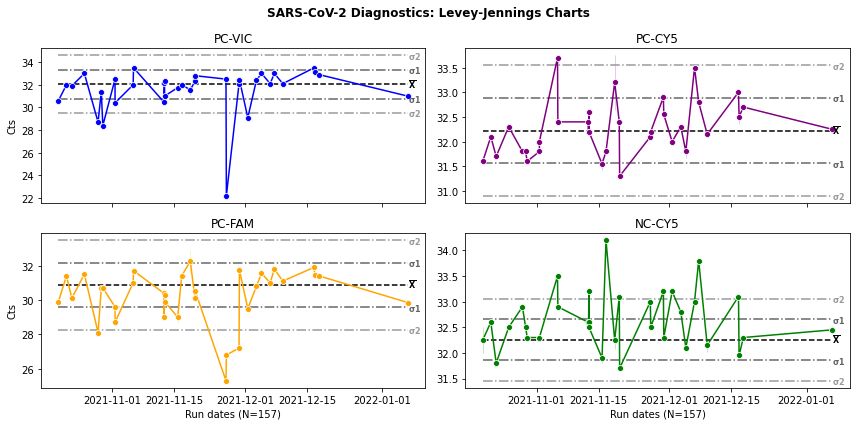

In [17]:
fig,ax = plt.subplots(2, 2, figsize=(12, 6))
df = df_pc_nc_reporters.dropna()#.set_index('Dt_Run')

sns.lineplot(data=df, x='Dt_Run', y='PC-VIC', ax=ax[0,0], color='blue', marker='o').set_ylabel('Cts')
sns.lineplot(data=df, x='Dt_Run', y='PC-FAM', ax=ax[1,0], color='orange', marker='o').set_ylabel('Cts')
sns.lineplot(data=df, x='Dt_Run', y='PC-CY5', ax=ax[0,1], color='purple', marker='o').set_ylabel('')
sns.lineplot(data=df, x='Dt_Run', y='NC-CY5', ax=ax[1,1], color='green', marker='o').set_ylabel('')
plt.setp(ax[0,0].get_xticklabels(), visible=False)
plt.setp(ax[0,1].get_xticklabels(), visible=False)
ax[0,0].set_xlabel(None)
ax[0,1].set_xlabel(None)
ax[1,0].set_xlabel(f'Run dates (N={df.shape[0]})')
ax[1,1].set_xlabel(f'Run dates (N={df.shape[0]})')


sd = df.std(numeric_only=True)
mn = df.mean(numeric_only=True)

reporters = df.columns[1:]
axes = [ax[0,0], ax[1,0], ax[0,1], ax[1,1]]
stats = [(m, m-2*s, m-s, m+s, m+2*s) for m,s in zip(mn, sd)]
stats_clrs = ['k', '#979A9A', '#626567', '#626567', '#979A9A']
stats_ls = ['dashed','dashdot', 'dashdot', 'dashdot', 'dashdot']

for a,r,s in zip(axes, reporters, stats):
    a.set_title(r) 
    a.hlines(s, df.Dt_Run.min(), df.Dt_Run.max(), linestyles=stats_ls, colors=stats_clrs)
    a.text(df.Dt_Run.max(), s[0], s=r'$\mathbf{\overline{X}}$', 
        va="center", rotation=0, fontsize=8)
    a.text(df.Dt_Run.max(), s[1], s=r'$\mathbf{\sigma2}$', 
        va="center", rotation=0, fontsize=8, color='#979A9A')
    a.text(df.Dt_Run.max(), s[2], s=r'$\mathbf{\sigma1}$', 
        va="center", rotation=0, fontsize=8, color='#626567')
    a.text(df.Dt_Run.max(), s[3], s=r'$\mathbf{\sigma1}$', 
        va="center", rotation=0, fontsize=8, color='#626567')
    a.text(df.Dt_Run.max(), s[4], s=r'$\mathbf{\sigma2}$', 
        va="center", rotation=0, fontsize=8, color='#979A9A')
    
# plt.subplot(2,2,1)
# plt.plot(df['PC-VIC'], ax=ax[0], alpha=0.5)#,sharex=True
# ax[0].xaxis.set_minor_locator()
# plt.ylabel('Ct')
# plt.xlabel('Date')
fig.suptitle('SARS-CoV-2 Diagnostics: Levey-Jennings Charts', fontweight='bold')
plt.tight_layout()
# plt.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/cts_qa-qc_{dt}.svg")
plt.show

In [250]:
fig.axes

[<AxesSubplot:title={'center':'PC-VIC'}, ylabel='Cts'>,
 <AxesSubplot:title={'center':'PC-CY5'}>,
 <AxesSubplot:title={'center':'PC-FAM'}, xlabel='Run dates (N=39)', ylabel='Cts'>,
 <AxesSubplot:title={'center':'NC-CY5'}, xlabel='Run dates (N=39)'>]

In [179]:

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

AttributeError: 'Legend' object has no attribute 'handles'

In [13]:
df_pc_nc_reporters.std(numeric_only=True)

PC-VIC    1.273888
PC-FAM    1.301424
PC-CY5    0.661040
NC-CY5    0.400673
dtype: float64

In [14]:
df_pc_nc_reporters.mean(numeric_only=True)

PC-VIC    32.060510
PC-FAM    30.874522
PC-CY5    32.224204
NC-CY5    32.257325
dtype: float64

In [6]:
l = ['COVM01044',
'COVM01048',
'COVM01049',
'COVM01050',
'COVM00553',
'NHRL-S002',
'NHRL-S001',
'NHRL-S031',
'COVM01026',
'COVM00992',
'COVM01065',
'NHRL-S032']

In [7]:
df_l = df_meta[df_meta.S_NUM.isin(l)]

In [9]:
df_l.to_excel(f"{glob.glob(f'{parent_dir}/Outputs')[0]}/ms_interest_{dt}.xlsx", index=False, float_format='%.1f')

In [13]:
df_png = pd.read_csv(glob.glob(f'{home_dir}/output23/png/results.csv', recursive=True)[0])
# glob(f'{parent_dir}/**/pc-nc_QC-QA_03-11-2021.xlsx', recursive=True)[0])[['CASE_ID', 'S_NUM']]#, 'G_COV', 'LIN', 'DT_SAM_RECEP', 'DT_SAM_COLL']]

In [14]:
df_nxt = pd.read_table(glob.glob(f'{home_dir}/output23/**/nxt.tsv', recursive=True)[0])
# glob(f'{parent_dir}/**/pc-nc_QC-QA_03-11-2021.xlsx', recursive=True)[0])[['CASE_ID', 'S_NUM']]#, 'G_COV', 'LIN', 'DT_SAM_RECEP', 'DT_SAM_COLL']]

In [17]:
df_samp = pd.read_excel(glob.glob(f'{parent_dir}/**/Run23-sampleIDs-19_11_2021.xlsx', recursive=True)[0])

In [23]:
df_samp.dro

,SN,Sample ID,sample name,plate pos,CASE_ID
0,1,Fabrice Nfuate,COVM01419,A1,DRC02-BKV-FN-2021
1,2,BKV-DRC-2,COVM01420,A2,DRC02-BKV-2-2021
2,3,Moambi Zawadi,COVM01421,A3,DRC02-BKV-MZ-2021
3,4,BKV-DRC-4,COVM01422,A4,DRC02-BKV-4-2021
4,5,BKV-DRC-12,COVM01423,A5,DRC02-BKV-12-2021


In [21]:
df_all = df_png.merge(df_nxt, how='outer', right_on='seqName', left_on='Sequence name')#.drop('seqName', axis=1)

In [22]:
df_all

,Sequence name,Lineage,Scorpio call,seqName,clade,genomeCoverage
0,COVM01420,AY.46,Delta (B.1.617.2-like),COVM01420,21J (Delta),85.8
1,COVM01424,AY.23,Delta (B.1.617.2-like),COVM01424,21J (Delta),78.3
2,COVM01425,B.1.617.2,Delta (B.1.617.2-like),COVM01425,21J (Delta),77.1
3,COVM01426,B.1.617.2,Delta (B.1.617.2-like),COVM01426,21J (Delta),75.3
4,COVM01428,B.1.629,NaN,COVM01428,21J (Delta),72.9
...,...,...,...,...,...,...
90,NaN,NaN,NaN,COVM01470,20A,21.7
91,NaN,NaN,NaN,COVM01484,21A (Delta),21.6
92,NaN,NaN,NaN,COVM01493,21A (Delta),19.4
93,NaN,NaN,NaN,COVM01513,21A (Delta),16.2


In [24]:
set(df_samp['sample name']) - set(df_nxt.seqName)

{'COVM01427', 'COVM01453', 'COVM01492'}

In [25]:
df_all.to_excel(f"{glob.glob(f'{parent_dir}/Outputs')[0]}/2021-11-19_run23_miseq.Analysis.Partial.QCstats_{dt}.xlsx", index=False, float_format='%.1f')

### **Remove duplicates seq report - DRC**

In [4]:
writer = pd.ExcelWriter(f"{glob.glob(f'{parent_dir}/**/SeqReports', recursive=True)[0]}/output_2021-12-10_run22-30_miseq-ont30_deduplicated.Analysis.QCstats_{dt}.xlsx")

df_reort1 = pd.read_excel(glob.glob(f'{parent_dir}/**/SeqReports/output_2021-12-10_run22-30_miseq-ont30.Analysis.QCstats.xlsx', recursive=True)[0], sheet_name=0)
qcStat = df_reort1.sort_values(['sample_name', 'Genome fraction (%)'], ascending=[True, False]).drop_duplicates('sample_name', keep='first')
df_reort2 = pd.read_excel(glob.glob(f'{parent_dir}/**/SeqReports/output_2021-12-10_run22-30_miseq-ont30.Analysis.QCstats.xlsx', recursive=True)[0], sheet_name=1)
pangolin = df_reort2.sort_values(['sample_name', 'Genome fraction (%)'], ascending=[True, False]).drop_duplicates('sample_name', keep='first')
df_reort3 = pd.read_excel(glob.glob(f'{parent_dir}/**/SeqReports/output_2021-12-10_run22-30_miseq-ont30.Analysis.QCstats.xlsx', recursive=True)[0], sheet_name=2)
nextclade = df_reort3.sort_values(['sample_name', 'Genome fraction (%)'], ascending=[True, False]).drop_duplicates('sample_name', keep='first')
df_reort4 = pd.read_excel(glob.glob(f'{parent_dir}/**/SeqReports/output_2021-12-10_run22-30_miseq-ont30.Analysis.QCstats.xlsx', recursive=True)[0], sheet_name=3)
iVar_snpE = df_reort4.sort_values(['sample_name', 'Genome fraction (%)'], ascending=[True, False]).drop_duplicates('sample_name', keep='first')
df_reort5 = pd.read_excel(glob.glob(f'{parent_dir}/**/SeqReports/output_2021-12-10_run22-30_miseq-ont30.Analysis.QCstats.xlsx', recursive=True)[0], sheet_name=4)
df_seq_meta = df_reort5.sort_values(['sample_name', 'Genome fraction (%)'], ascending=[True, False]).drop_duplicates('sample_name', keep='first')
df_reort6 = pd.read_excel(glob.glob(f'{parent_dir}/**/SeqReports/output_2021-12-10_run22-30_miseq-ont30.Analysis.QCstats.xlsx', recursive=True)[0], sheet_name=5)
summary = df_reort6.sort_values(['Unique lab id', 'Genome fraction (%)'], ascending=[True, False]).drop_duplicates('Unique lab id', keep='first')

qcStat.sort_values('Genome fraction (%)', ascending=False).to_excel(writer, sheet_name='QCstats', index=False, na_rep='NA', float_format='%.1f')

pangolin.sort_values('Genome fraction (%)', ascending=False).to_excel(writer, sheet_name='pangolinAnalysis', index=False, na_rep='NA', float_format='%.1f')

nextclade.sort_values('Genome fraction (%)', ascending=False).to_excel(writer, sheet_name='nextcladeAnalysis', index=False, na_rep='NA', float_format='%.1f')

iVar_snpE.sort_values('Genome fraction (%)', ascending=False).to_excel(writer, sheet_name='snpEffAnnotation', index=False, na_rep='NA', float_format='%.1f')

df_seq_meta.sort_values('Genome fraction (%)', ascending=False).sort_values('Genome fraction (%)', ascending=False).to_excel(writer, sheet_name='metaData', index=False, na_rep='NA', float_format='%.1f')

summary.sort_values('Genome fraction (%)', ascending=False).to_excel(writer, sheet_name='summaryReport', index=False, na_rep='NA', float_format='%.1f')

writer.save()


In [ ]:
np.newaxis

### **Additional CollabMS data**

In [7]:
df_seq_meta = pd.read_excel(glob.glob(f'{parent_dir}/**/metadata-seq-MS-ILL-ONT_seq19-32_13-01-2022.xlsx', recursive=True)[0])

In [8]:
# df_seq_meta.tail()

In [11]:
mask1 = df_seq_meta.CASE_ID.str.contains('DRC02') == False
mask2 = df_seq_meta.S_NUM.str.contains('COVS') == False
mask3 = df_seq_meta.G_COV >= 70
df_seq_meta1 = df_seq_meta[mask1 & mask2 & mask3 == True].sort_values(['S_NUM', 'G_COV']).drop_duplicates('S_NUM', keep='last')


In [13]:
df_seq_meta1.columns

Index(['CASE_ID', 'S_NUM', 'AGE_YRS', 'GEND', 'OCCU', 'NAT', 'COUNT_RES',
       'TRAV_HIST', 'TRAV_FROM', 'QUAR_PLACE', 'SYMPS', 'DT_SAM_COLL',
       'DT_SAM_RECEP', 'RESULT', 'DT_CONF', 'VACC_STATUS', 'VACC_DOS',
       'AVG_Ct', 'LIN', 'SCORP_CALL', 'CLADE', 'G_COV', 'N_VAR', 'S', 'ORF1ab',
       'ORF1a', 'ORF3a', 'ORF3b', 'E', 'M', 'ORF6', 'ORF7a', 'ORF7b', 'ORF8',
       'N', 'ORF9a', 'ORF9b', 'ORF10', 'SEQ#', 'SEQ_MCHN', 'DT_SEQ', 'LIB_KIT',
       'PRM_SET'],
      dtype='object')

In [16]:
(df_seq_meta1[['S_NUM', 'G_COV', 'COUNT_RES', 'LIN', 'DT_SAM_COLL', 'DT_SAM_RECEP']]
 .to_excel(f"{glob.glob(f'{parent_dir}/CollabMS')[0]}/additional-metadata_{dt}.xlsx", index=False, float_format='%.1f'))

In [39]:
# df_prev_sub1 = pd.read_excel(glob.glob(f'{parent_dir}/**/Submissions/20210914_ILRI_gisaid_submission_metadata.xls')[0], sheet_name='Submissions', usecols=['covv_provider_sample_id'])
df_prev_sub2 = pd.read_excel(glob.glob(f'{parent_dir}/**/Submissions/20211102_ILRI_gisaid_submission_metadata.xls')[0], sheet_name='Submissions', usecols=['covv_provider_sample_id'])
df_prev_sub3 = pd.read_excel(glob.glob(f'{parent_dir}/**/Submissions/20211214_ILRI_gisaid_submission_metadata.xls')[0], sheet_name='Submissions', usecols=['covv_provider_sample_id'])
df_prev_sub4 = pd.read_excel(glob.glob(f'{parent_dir}/**/Submissions/20220110_ILRI_gisaid_submission_metadata.xls')[0], sheet_name='Submissions', usecols=['covv_provider_sample_id'])
df_prev_sub = df_prev_sub2.append([df_prev_sub3, df_prev_sub4])

In [40]:
df_prev_sub.columns

Index(['covv_provider_sample_id'], dtype='object')

In [41]:
df_sub_gisaid80 = df_seq_meta1[df_seq_meta1.S_NUM.isin(df_prev_sub.covv_provider_sample_id)]
df_sub_gisaid80b = df_seq_meta1[df_seq_meta1.S_NUM.isin(df_prev_sub.covv_provider_sample_id) == False]

In [44]:
df_sub_gisaid80.shape

(480, 43)

In [1]:
df_sub_gisaid80b.shape

NameError: name 'df_sub_gisaid80b' is not defined

In [46]:
# df_sub_draft = df_sub_draft2[df_sub_draft2['covv_provider_sample_id'].isin(df_prev_sub.covv_provider_sample_id) == False].fillna('unknown').sort_values('covv_provider_sample_id')[gisaid_cols] 

# df_sub_draft.to_excel(f"{glob.glob(f'{parent_dir}/Gisaid')[0]}/gisaid_data_{ref}_{dt}.xlsx", index=False)

df_sub_gisaid80[['S_NUM', 'SEQ#', 'DT_SEQ']].to_csv(f"{glob.glob(f'{parent_dir}/CollabMS')[0]}/gisaid_IDs_seq19-32_{dt}.csv", index=False, header=False)

# df_sub_draft.shape

### **Summary descriptions - MoH**

In [25]:
df_MOH = pd.read_excel(glob.glob(f'{parent_dir}/**/MoH_COVID-19_genomic_surveillance_brief-final_13-01-2022.xlsx')[0])

In [26]:
df_MOH.head()

,Date Collection (yyyy-mm-dd),Pango Lineage Annotation,Next Clade Lineage Annotation,WHO Annotation,Sample County of Origin,Gender,Subject Country of Origin,MoC-S-Protein
0,*2021-12-23,BA.1,21K (Omicron),Omicron (BA.1-like),Bungoma,M,Kenya,"T95I, N764K, D796Y, D614G, T547K, G339D, P681H..."
1,*2021-12-23,BA.1,21K (Omicron),Omicron (BA.1-like),West pokot,NaN,Kenya,"T95I, N764K, D796Y, D614G, T547K, G339D, P681H..."
2,2021-12-22 00:00:00,BA.1,21K (Omicron),Omicron (BA.1-like),Kiambu,NaN,Kenya,"T95I, N764K, D796Y, D614G, T547K, G339D, P681H..."
3,2021-12-22 00:00:00,BA.1,21K (Omicron),Omicron (BA.1-like),Bungoma,M,Kenya,"T95I, N764K, D796Y, D614G, T547K, G339D, P681H..."
4,2021-12-21 00:00:00,BA.1,21K (Omicron),Omicron (BA.1-like),Kiambu,NaN,Kenya,"T95I, N764K, D796Y, D614G, T547K, G339D, P681H..."


In [27]:
df_MOH['WHO Annotation'].value_counts()

Omicron (BA.1-like)                  162
Delta (B.1.617.2-like)               139
Probable Omicron (BA.1-like)          32
Probable Omicron (B.1.1.529-like)      1
Omicron (BA.2-like)                    1
Name: WHO Annotation, dtype: int64

In [28]:
df_MOH['Sample County of Origin'].value_counts()

Nairobi        105
Nyamira         46
West pokot      46
Bungoma         39
Kakamega        19
Kiambu          17
Migori          16
Trans nzoia     13
Kisii            8
Busia            6
Homabay          4
Nakuru           2
Mombasa          2
Vihiga           1
Siaya            1
Kajiado          1
Kirinyaga        1
Murang'a         1
Name: Sample County of Origin, dtype: int64

In [29]:
df_MOH['Subject Country of Origin'].value_counts()

Kenya                               301
South Africa                         10
Zimbabwe                              5
United Kingdom (UK)                   2
United States of America (USA)        2
Botswana                              2
Tanzania                              2
South Sudan                           2
Democratic Republic of the Congo      1
Canada                                1
Brazil                                1
Netherlands                           1
Uganda                                1
Burundi                               1
India                                 1
France                                1
Name: Subject Country of Origin, dtype: int64

### **kemri_kilifi_qc10_18-01-2022**

In [18]:
df_kilifi_qc = pd.read_excel(glob.glob(f'{parent_dir}/**/kemri_kilifi_qc10_18-01-2022.xlsx')[0])

In [19]:
df_kil_qc_meta = df_meta[df_meta.S_NUM.isin(df_kilifi_qc.id)]

In [22]:
df_kil_qc_meta.to_csv(f"{glob.glob(f'{parent_dir}/Gisaid')[0]}/kemri_kilifi_qc10_metadata_{dt}.tsv", sep='\t', index=False)

### **Gisaid_2-3 submission corrections**

In [26]:
df_seq_summ0 = pd.read_excel(glob.glob(f'{parent_dir}/Outputs/seq-summary-metadata_11-01-2022.xlsx')[0])
df_seq_summ0.head()

,case_id,sequence_name,genome_coverage,lineage,clade,run_num,tech,seq_dt,lib_prep,primer_set,analysis_pipeline,sno.
0,NaN,COVC00915,0,Failed,NaN,Run07,Illumina,18-05-2021,Run7,ARTIC_V3,NaN,1
1,NaN,COVC06455,0,Unknown,NaN,Run08,Illumina,25-05-2021,Run8,ARTIC_V3,NaN,2
2,NaN,COVC14304,0,Failed,NaN,Run01,Illumina,09-02-2021,Nextera_XT,ARTIC_V1,NaN,3
3,NaN,COVC01849,0,Failed,NaN,Run01,Illumina,09-02-2021,Nextera_XT,ARTIC_V1,NaN,4
4,NaN,COVC19680,0,Failed,NaN,Run01,Illumina,09-02-2021,Nextera_XT,ARTIC_V1,NaN,5


In [28]:
df_prev_corr2 = pd.read_excel(glob.glob(f'{parent_dir}/**/SubmissionCorrections/20211102_ILRI_gisaid_submission_metadata.xls')[0], sheet_name='Submissions', usecols=['covv_provider_sample_id'])
df_prev_corr3 = pd.read_excel(glob.glob(f'{parent_dir}/**/SubmissionCorrections/20211214_ILRI_gisaid_submission_metadata_curated.xls')[0], sheet_name='Submissions', usecols=['covv_provider_sample_id'])
df_prev_corr_id = df_prev_corr2.append([df_prev_corr2, df_prev_corr3])
df_seq_summ[df_seq_summ.sequence_name.isin(df_prev_corr_id.covv_provider_sample_id)].to_csv(f"{glob.glob(f'{parent_dir}/**/SubmissionCorrections')[0]}/gisaid_sub-review2-3_IDs_{dt}.csv", sep=',', index=False)

### **Gisaid submission reports -RF**

In [5]:
df_prev_sub1 = pd.read_excel(glob.glob(f'{parent_dir}/RFellerReports/rf-20210914_ILRI_gisaid_submission_metadata.xls')[0], sheet_name='Submissions', usecols=['covv_provider_sample_id', 'sub#'])
df_prev_sub2 = pd.read_excel(glob.glob(f'{parent_dir}/RFellerReports/rf-20211102_ILRI_gisaid_submission_metadata.xls')[0], sheet_name='Submissions', usecols=['covv_provider_sample_id', 'sub#'])
df_prev_sub3 = pd.read_excel(glob.glob(f'{parent_dir}/RFellerReports/rf-20211214_ILRI_gisaid_submission_metadata.xls')[0], sheet_name='Submissions', usecols=['covv_provider_sample_id', 'sub#'])
df_prev_sub4 = pd.read_excel(glob.glob(f'{parent_dir}/RFellerReports/rf-20220110_ILRI_gisaid_submission_metadata.xls')[0], sheet_name='Submissions', usecols=['covv_provider_sample_id', 'sub#'])
df_prev_sub5 = pd.read_excel(glob.glob(f'{parent_dir}/RFellerReports/rf-20220204_ILRI_gisaid_submission_metadata.xls')[0], sheet_name='Submissions', usecols=['covv_provider_sample_id'])
df_prev_sub6a = pd.read_excel(glob.glob(f'{parent_dir}/RFellerReports/rf-20220321_ILRI_gisaid_ 6b_submission_metadata.xls')[0], sheet_name='Submissions', usecols=['covv_provider_sample_id'])
df_prev_sub6b = pd.read_excel(glob.glob(f'{parent_dir}/RFellerReports/rf-20220321_ILRI_gisaid_ 6a_submission_metadata.xls')[0], sheet_name='Submissions', usecols=['covv_provider_sample_id'])

In [33]:
df_meta.head()

,CASE_ID,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,SAMP_TYPE,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF,VACC_STATUS,VACC_DOS
0,NaN,COVC00001,35.0,F,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NP Swab,NaT,NaT,Negative,2020-06-02,NaN,NaN
1,NaN,COVC00002,29.0,M,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NP Swab,NaT,NaT,Negative,2020-06-02,NaN,NaN
2,NaN,COVC00003,50.0,M,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NP Swab,NaT,NaT,Negative,2020-06-02,NaN,NaN
3,NaN,COVC00004,35.0,F,Casual,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NP Swab,NaT,NaT,Negative,2020-06-02,NaN,NaN
4,NaN,COVC00005,27.0,F,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NP Swab,NaT,NaT,Negative,2020-06-02,NaN,NaN


In [34]:
df_prev_sub_rf = df_prev_sub1.append([df_prev_sub2, df_prev_sub3, df_prev_sub4, df_prev_sub5])

In [35]:
df_prev_sub_rf.groupby('sub#').count()

,covv_provider_sample_id
sub#,
sub01,731
sub02,685
sub03,115
sub04,354


In [101]:
df_seq_summ_a = pd.read_excel(glob.glob(f'{parent_dir}/**/seq-summary-metadata_03-02-2022.xlsx')[0])#, sheet_name='Sheet3'
df_seq_summ_b = df_seq_summ_a[df_seq_summ_a.sequence_name.str.contains('DCR') == False]
df_seq_summ_c = df_seq_summ_b[df_seq_summ_b.sequence_name.str.contains('COVS') == False]
df_seq_summ = df_seq_summ_c[df_seq_summ_c.sequence_name.str.contains('COVG') == False]

In [102]:
df_seq_summ.shape

(3632, 12)

In [103]:
gisaid_data1 = pd.read_excel(glob.glob(f'{parent_dir}/RFellerReports/gisaid01_no_duplicate_ill-ont_17-09-2021.xlsx')[0])
gisaid_data1.sort_values(['id', 'g_cov'], ascending=[True, False]).drop_duplicates('id', keep='first').shape

(1117, 4)

In [104]:
gisaid_data1.head()

,sno.,id,g_cov,sub
0,1,COVC11310,59.8,sub01
1,2,COVC03665,97.5,sub01
2,3,COVC03813,97.9,sub01
3,4,COVC03617,98.6,sub01
4,5,COVC03723,98.9,sub01


In [105]:
df_seq_summ_fil = df_seq_summ.sort_values(['sequence_name', 'genome_coverage'], ascending=[True, False]).drop_duplicates('sequence_name', keep='first')
df_seq_summ_fil.shape

(3331, 12)

In [106]:
df_seq_summ_AUG = df_seq_summ_fil[df_seq_summ_fil.seq_dt <= pd.Timestamp('2021-08-31')]
df_seq_summ_AUG.shape

(1129, 12)

In [107]:
df_seq_summ_AUG.groupby('seq_dt').count()

,case_id,sequence_name,genome_coverage,lineage,clade,run_num,tech,lib_prep,primer_set,analysis_pipeline,sno.
seq_dt,,,,,,,,,,,
2021-02-09,0,54,54,54,45,54,54,54,54,0,54
2021-03-27,0,30,30,30,30,30,30,30,30,0,30
2021-04-09,0,13,13,13,12,13,13,13,13,0,13
2021-04-14,0,52,52,52,47,52,52,52,52,0,52
2021-04-19,0,39,39,39,34,39,39,39,39,0,39
2021-04-23,0,66,66,66,66,66,66,66,66,0,66
2021-04-30,0,76,76,76,75,76,76,76,76,0,76
2021-05-18,0,92,92,92,91,92,92,92,92,0,92
2021-05-25,0,96,96,96,95,96,96,96,96,0,96


In [108]:
df_seq_summ_AUG.merge(df_meta[['S_NUM', 'DT_SAM_COLL']], how='left', left_on='sequence_name', right_on='S_NUM')

,case_id,sequence_name,genome_coverage,lineage,clade,run_num,tech,seq_dt,lib_prep,primer_set,analysis_pipeline,sno.,S_NUM,DT_SAM_COLL
0,NaN,COVC00854,94.9,B.1,20C,Run07,MiSeq,2021-05-18,NEBNext_FS,ARTIC_V3,NaN,533.0,COVC00854,2020-06-11
1,NaN,COVC00867,68.2,B.1.446,20C,Run07,MiSeq,2021-05-18,NEBNext_FS,ARTIC_V3,NaN,513.0,COVC00867,2020-06-10
2,NaN,COVC00893,84.1,B.1.446,20C,Run07,MiSeq,2021-05-18,NEBNext_FS,ARTIC_V3,NaN,517.0,COVC00893,2020-06-10
3,NaN,COVC00915,0,Failed,NaN,Run07,MiSeq,2021-05-18,NEBNext_FS,ARTIC_V3,NaN,467.0,COVC00915,2020-06-10
4,NaN,COVC00962,92.9,B.1,20A,Run07,MiSeq,2021-05-18,NEBNext_FS,ARTIC_V3,NaN,523.0,COVC00962,2020-06-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,NaN,NPHL1,97.9,B.1.1.7,20I/501Y.V1,Run06_04_03_03b,MiSeq,2021-04-30,NEBNext,ARTIC_V3,NaN,460.0,NPHL1,NaT
1125,NaN,NPHL2,61.8,B.1.1.7,20I/501Y.V1,Run06_04_03_03b,MiSeq,2021-04-30,NEBNext,ARTIC_V3,NaN,454.0,NPHL2,NaT
1126,NaN,NPHL3,96.5,B.1.1.7,20I/501Y.V1,Run04_03_03b,Illumina,2021-04-19,NEBNext,ARTIC_V3,NaN,322.0,NPHL3,NaT
1127,NaN,NPHL4,49.5,A,20A,Run06_04_03_03b,MiSeq,2021-04-30,NEBNext,ARTIC_V3,NaN,453.0,NPHL4,NaT


In [109]:
df_sub1_fil = gisaid_data1.merge(df_seq_summ_fil, how='left', left_on='id', right_on='sequence_name')
df_sub1_fil.sort_values(['sequence_name', 'genome_coverage'], ascending=[True, False]).drop_duplicates('sequence_name', keep='first').shape

(1117, 16)

In [110]:
maska = df_seq_summ_fil.seq_dt <= pd.Timestamp('2021-08-31')
maskb = df_seq_summ_fil.seq_dt >= pd.Timestamp('2021-08-01')

df_sub1_aug = df_seq_summ_fil[maska & maskb == True].merge(df_meta[['S_NUM', 'DT_SAM_COLL']], how='left', left_on='sequence_name', right_on='S_NUM')
df_sub1_notaug = df_seq_summ_fil[maska & maskb == False].merge(df_meta[['S_NUM', 'DT_SAM_COLL']], how='left', left_on='sequence_name', right_on='S_NUM')
df_sub1_aug_sub = df_sub1_aug[df_sub1_aug.sequence_name.isin(df_prev_sub1.covv_provider_sample_id)]
print(f'Sequenced: {df_sub1_aug.shape[0]}\nTotal Sequenced: {df_seq_summ_AUG.shape[0]}\nSubmitted: {df_sub1_aug_sub.shape[0]}\nTotal Submitted: {df_prev_sub1.shape[0]}')

Sequenced: 473
Total Sequenced: 1129
Submitted: 332
Total Submitted: 731


In [111]:
df_sub1_aug_dt = df_sub1_aug[df_sub1_aug.DT_SAM_COLL.isna() == False]['DT_SAM_COLL']
df_sub1_notaug_dt = df_sub1_notaug[df_sub1_notaug.DT_SAM_COLL.isna() == False]['DT_SAM_COLL']

In [112]:
sub1_timedelta_aug = pd.Timestamp('2021-09-16') - df_sub1_aug_dt
sub1_timedelta_notaug = pd.Timestamp('2021-09-16') - df_sub1_notaug_dt
print(f'Time one: {sub1_timedelta_aug.mean()}\nTime two: {sub1_timedelta_notaug.mean()}')

Time one: 197 days 23:19:43.216783216
Time two: 65 days 13:12:49.303423849


In [113]:
df_sub1_aug_dt

0     2020-11-04
1     2020-11-04
2     2020-11-04
3     2020-11-05
5     2020-11-05
         ...    
468   2021-02-25
469   2021-02-26
470   2021-01-03
471   2021-01-03
472   2021-01-03
Name: DT_SAM_COLL, Length: 429, dtype: datetime64[ns]

In [114]:
# set(df_sub1_fil.id) - set(df_sub1_fil.sequence_name)

In [115]:
df_prev_sub_rf.groupby('sub#').count()

,covv_provider_sample_id
sub#,
sub01,731
sub02,685
sub03,115
sub04,354


In [116]:
# set(df_seq_summ.THREE) - set(df_seq_summ.ONE)


In [117]:
mask1 = df_seq_summ.run_num.str.contains('Run16')
mask2 = df_seq_summ.run_num.str.contains('Run17')
mask3 = df_seq_summ.run_num.str.contains('Run18')
mask4 = df_seq_summ.run_num.str.contains('Run19')
mask5 = df_seq_summ.run_num.str.contains('Run20')
mask6 = df_seq_summ.run_num.str.contains('Run21')

In [118]:
df_sub2a = df_seq_summ[mask1 | mask2 | mask3 | mask4 | mask5 | mask6 == True]
df_sub2 = df_sub2a[df_sub2a.sequence_name.str.contains('DRC') == False]
df_sub2.shape

(833, 12)

In [119]:
df_sub2_fil = df_sub2.sort_values(['sequence_name', 'genome_coverage'], ascending=[True, False]).drop_duplicates('sequence_name', keep='first')
df_sub2_fil.shape

(833, 12)

In [120]:
# df_sub2 = df_seq_summ[mask1 | mask2 | mask3 | mask4 | mask5 | mask6 == True]
df_sub2_fil.groupby('seq_dt').count()

,case_id,sequence_name,genome_coverage,lineage,clade,run_num,tech,lib_prep,primer_set,analysis_pipeline,sno.
seq_dt,,,,,,,,,,,
2021-09-15,0,96,96,91,96,96,96,96,96,0,96
2021-09-23,0,65,65,52,65,65,65,65,65,0,65
2021-10-10,0,384,384,323,383,384,384,384,384,0,384
2021-10-19,0,96,96,89,95,96,96,96,96,0,96
2021-10-25,0,96,96,81,96,96,96,96,96,0,96
2021-10-29,0,96,96,88,96,96,96,96,96,0,96


In [121]:
# df_sub2 = df_seq_summ[mask1 | mask2 | mask3 | mask4 | mask5 | mask6 == True]
df_sub2_fil.merge(df_meta[['S_NUM', 'DT_SAM_COLL']], how='left', left_on='sequence_name', right_on='S_NUM')

,case_id,sequence_name,genome_coverage,lineage,clade,run_num,tech,seq_dt,lib_prep,primer_set,analysis_pipeline,sno.,S_NUM,DT_SAM_COLL
0,NaN,COVC17732,92.4,B.1,20C,Run16,MinION,2021-09-15,NEBNext,ARTIC_V3,NaN,1362.0,COVC17732,2020-10-30
1,NaN,COVC17734,91.4,B.1,20C,Run16,MinION,2021-09-15,NEBNext,ARTIC_V3,NaN,1363.0,COVC17734,2020-10-31
2,NaN,COVC17735,94.2,B.1,20C,Run16,MinION,2021-09-15,NEBNext,ARTIC_V3,NaN,1364.0,COVC17735,2020-10-31
3,NaN,COVC17737,91.5,B.1,20C,Run16,MinION,2021-09-15,NEBNext,ARTIC_V3,NaN,1365.0,COVC17737,2020-10-31
4,NaN,COVC17739,97.2,B.1,20C,Run16,MinION,2021-09-15,NEBNext,ARTIC_V3,NaN,1366.0,COVC17739,2020-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,NaN,COVM01412,98.886,B.1.1.7,"20I (Alpha, V1)",Run21,MinION,2021-10-29,NEBNext,ARTIC_V3,NaN,2214.0,COVM01412,2021-05-20
829,NaN,COVM01413,83.296,AY.5,21J (Delta),Run21,MinION,2021-10-29,NEBNext,ARTIC_V3,NaN,2215.0,COVM01413,2021-06-17
830,NaN,COVM01415,55.202,NaN,"20I (Alpha, V1)",Run21,MinION,2021-10-29,NEBNext,ARTIC_V3,NaN,2216.0,COVM01415,2021-08-06
831,NaN,COVM01416,97.97,B.1.1.7,"20I (Alpha, V1)",Run21,MinION,2021-10-29,NEBNext,ARTIC_V3,NaN,2217.0,COVM01416,2021-08-06


In [122]:
# df_sub2 = df_seq_summ[mask1 | mask2 | mask3 | mask4 | mask5 | mask6 == True]
df_sub2_fil.merge(df_meta[['S_NUM', 'DT_SAM_COLL']], how='left', left_on='sequence_name', right_on='S_NUM')

,case_id,sequence_name,genome_coverage,lineage,clade,run_num,tech,seq_dt,lib_prep,primer_set,analysis_pipeline,sno.,S_NUM,DT_SAM_COLL
0,NaN,COVC17732,92.4,B.1,20C,Run16,MinION,2021-09-15,NEBNext,ARTIC_V3,NaN,1362.0,COVC17732,2020-10-30
1,NaN,COVC17734,91.4,B.1,20C,Run16,MinION,2021-09-15,NEBNext,ARTIC_V3,NaN,1363.0,COVC17734,2020-10-31
2,NaN,COVC17735,94.2,B.1,20C,Run16,MinION,2021-09-15,NEBNext,ARTIC_V3,NaN,1364.0,COVC17735,2020-10-31
3,NaN,COVC17737,91.5,B.1,20C,Run16,MinION,2021-09-15,NEBNext,ARTIC_V3,NaN,1365.0,COVC17737,2020-10-31
4,NaN,COVC17739,97.2,B.1,20C,Run16,MinION,2021-09-15,NEBNext,ARTIC_V3,NaN,1366.0,COVC17739,2020-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,NaN,COVM01412,98.886,B.1.1.7,"20I (Alpha, V1)",Run21,MinION,2021-10-29,NEBNext,ARTIC_V3,NaN,2214.0,COVM01412,2021-05-20
829,NaN,COVM01413,83.296,AY.5,21J (Delta),Run21,MinION,2021-10-29,NEBNext,ARTIC_V3,NaN,2215.0,COVM01413,2021-06-17
830,NaN,COVM01415,55.202,NaN,"20I (Alpha, V1)",Run21,MinION,2021-10-29,NEBNext,ARTIC_V3,NaN,2216.0,COVM01415,2021-08-06
831,NaN,COVM01416,97.97,B.1.1.7,"20I (Alpha, V1)",Run21,MinION,2021-10-29,NEBNext,ARTIC_V3,NaN,2217.0,COVM01416,2021-08-06


In [123]:
# df_sub2 = df_seq_summ[mask1 | mask2 | mask3 | mask4 | mask5 | mask6 == True]
df_sub2_sep = df_sub2_fil[df_sub2_fil.seq_dt <= pd.Timestamp('2021-09-24')].merge(df_meta[['S_NUM', 'DT_SAM_COLL']], how='left', left_on='sequence_name', right_on='S_NUM')
df_sub2_notsep = df_sub2[df_sub2.seq_dt > pd.Timestamp('2021-09-24')].merge(df_meta[['S_NUM', 'DT_SAM_COLL']], how='left', left_on='sequence_name', right_on='S_NUM')
df_sub2_sep_sub = df_sub2_sep[df_sub2_sep.sequence_name.isin(df_prev_sub2.covv_provider_sample_id)]
print(f'Sequenced: {df_sub2_sep.shape[0]}\nTotal Sequenced: {df_sub2_fil.shape[0]}\nSubmitted: {df_sub2_sep_sub.shape[0]}\nTotal Submitted: {df_prev_sub2.shape[0]}')

Sequenced: 161
Total Sequenced: 833
Submitted: 130
Total Submitted: 685


In [124]:
df_sub2_sep_dt = df_sub2_sep[df_sub2_sep.DT_SAM_COLL.isna() == False]['DT_SAM_COLL']
df_sub2_notsep_dt = df_sub2_notsep[df_sub2_notsep.DT_SAM_COLL.isna() == False]['DT_SAM_COLL']

In [125]:
sub2_timedelta_sep = pd.Timestamp('2021-11-09') - df_sub2_sep_dt
sub2_timedelta_notsep = pd.Timestamp('2021-11-09') - df_sub2_notsep_dt
print(f'Time one: {sub2_timedelta_sep.mean()}\nTime two: {sub2_timedelta_notsep.mean()}')

Time one: 264 days 12:45:57.446808512
Time two: 93 days 05:02:40.509554140


In [126]:
df_sub2_fil.groupby('run_num').count()

,case_id,sequence_name,genome_coverage,lineage,clade,tech,seq_dt,lib_prep,primer_set,analysis_pipeline,sno.
run_num,,,,,,,,,,,
Run16,0,96,96,91,96,96,96,96,96,0,96
Run17,0,65,65,52,65,65,65,65,65,0,65
Run18,0,384,384,323,383,384,384,384,384,0,384
Run19,0,96,96,89,95,96,96,96,96,0,96
Run20,0,96,96,81,96,96,96,96,96,0,96
Run21,0,96,96,88,96,96,96,96,96,0,96


In [127]:
mask7 = df_seq_summ.run_num.str.contains('Run22')
mask8 = df_seq_summ.run_num.str.contains('Run30')
mask9 = df_seq_summ.run_num.str.contains('Run26')

# mask12 = df_seq_summ.run_num.str.contains('Run21')

In [128]:
df_sub3 = df_seq_summ[mask8 | mask7 | mask9 == True]
df_sub3.shape

(257, 12)

In [129]:
df_sub3.groupby('run_num').count()

,case_id,sequence_name,genome_coverage,lineage,clade,tech,seq_dt,lib_prep,primer_set,analysis_pipeline,sno.
run_num,,,,,,,,,,,
Run22,76,76,76,75,76,76,76,76,76,76,76
Run26,86,86,82,8,82,86,86,86,86,86,86
Run30,95,95,95,87,95,95,95,95,95,95,95


In [130]:
df_sub3_fil0 = df_sub3.sort_values(['sequence_name', 'genome_coverage'], ascending=[True, False]).drop_duplicates('sequence_name', keep='first')
df_sub3_fil = df_sub3_fil0[df_sub3_fil0.case_id.str.contains('DCR02') == False]
df_sub3_fil.shape

(191, 12)

In [131]:
# df_sub2 = df_seq_summ[mask1 | mask2 | mask3 | mask4 | mask5 | mask6 == True]
df_sub3_fil.groupby('seq_dt').count()

,case_id,sequence_name,genome_coverage,lineage,clade,run_num,tech,lib_prep,primer_set,analysis_pipeline,sno.
seq_dt,,,,,,,,,,,
2021-11-10,76,76,76,75,76,76,76,76,76,76,76
2021-11-30,20,20,17,1,17,20,20,20,20,20,20
2021-12-10,95,95,95,87,95,95,95,95,95,95,95


In [132]:
# df_sub2 = df_seq_summ[mask1 | mask2 | mask3 | mask4 | mask5 | mask6 == True]
df_sub3_fil.merge(df_meta[['S_NUM', 'DT_SAM_COLL']], how='left', left_on='sequence_name', right_on='S_NUM')

,case_id,sequence_name,genome_coverage,lineage,clade,run_num,tech,seq_dt,lib_prep,primer_set,analysis_pipeline,sno.,S_NUM,DT_SAM_COLL
0,NCRH/7995,COVC24720,96,AY.116,21J (Delta),Run22,MiSeq,2021-11-10,NEBNext,ARTIC_V3,nf-viralrecon-v2.2,2276.0,COVC24720,2021-10-08
1,NCRH/7996,COVC24721,96.6,AY.116,21J (Delta),Run22,MiSeq,2021-11-10,NEBNext,ARTIC_V3,nf-viralrecon-v2.2,2259.0,COVC24721,2021-10-08
2,NCRH/8019,COVC24722,96.9,AY.116,21J (Delta),Run22,MiSeq,2021-11-10,NEBNext,ARTIC_V3,nf-viralrecon-v2.2,2253.0,COVC24722,2021-10-10
3,NCRH/8055,COVC24725,96.7,AY.116,21J (Delta),Run22,MiSeq,2021-11-10,NEBNext,ARTIC_V3,nf-viralrecon-v2.2,2257.0,COVC24725,2021-10-14
4,NCRH/8056,COVC24726,95.5,AY.16,21A (Delta),Run22,MiSeq,2021-11-10,NEBNext,ARTIC_V3,nf-viralrecon-v2.2,2284.0,COVC24726,2021-10-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,NPHL04/36158/2021,COVM01680,92.5,BA.1,21K (Omicron),Run30,MinION,2021-12-10,NEBNext,ARTIC_V3,nf-viralrecon-v2.2,2681.0,COVM01680,2021-12-06
187,NPHL04/JKIA552285-36159/2021,COVM01681,91.6,BA.1,21K (Omicron),Run30,MinION,2021-12-10,NEBNext,ARTIC_V3,nf-viralrecon-v2.2,2685.0,COVM01681,2021-12-06
188,NPHL04/JKIA539-36228/2021,COVM01682,92.5,BA.1,21K (Omicron),Run30,MinION,2021-12-10,NEBNext,ARTIC_V3,nf-viralrecon-v2.2,2682.0,COVM01682,2021-12-06
189,NPHL04/JKIA512-36229/2021,COVM01683,91.5,BA.1,21K (Omicron),Run30,MinION,2021-12-10,NEBNext,ARTIC_V3,nf-viralrecon-v2.2,2686.0,COVM01683,2021-12-06


In [133]:
# df_sub2 = df_seq_summ[mask1 | mask2 | mask3 | mask4 | mask5 | mask6 == True]
df_sub3_nov = df_sub3_fil[df_sub3_fil.seq_dt <= pd.Timestamp('2021-12-01')].merge(df_meta[['S_NUM', 'DT_SAM_COLL']], how='left', left_on='sequence_name', right_on='S_NUM')
df_sub3_notnov = df_sub3_fil[df_sub3_fil.seq_dt > pd.Timestamp('2021-12-01')].merge(df_meta[['S_NUM', 'DT_SAM_COLL']], how='left', left_on='sequence_name', right_on='S_NUM')
df_sub3_nov_sub = df_sub3_nov[df_sub3_nov.sequence_name.isin(df_prev_sub3.covv_provider_sample_id)]
print(f'Sequenced: {df_sub3_nov.shape[0]}\nTotal Sequenced: {df_sub3_fil.shape[0]}\nSubmitted: {df_sub3_nov_sub.shape[0]}\nTotal Submitted: {df_prev_sub3.shape[0]}')

Sequenced: 96
Total Sequenced: 191
Submitted: 74
Total Submitted: 115


In [134]:
x = df_prev_sub3.merge(df_meta[['CASE_ID', 'S_NUM', 'DT_SAM_COLL']], how='left', left_on='covv_provider_sample_id', right_on='S_NUM')
y = df_seq_summ[['sequence_name', 'genome_coverage', 'run_num']].merge(x[['CASE_ID', 'S_NUM', 'DT_SAM_COLL']], how='right', left_on='sequence_name', right_on='S_NUM')
z = y.sort_values(['S_NUM', 'run_num'], ascending=[True, False]).drop_duplicates('S_NUM', keep='first')
# z.to_excel(f"{glob.glob(f'{parent_dir}/RFellerReports')[0]}/df_sub3_nov2.xlsx", index=False)

In [135]:
# set(df_prev_sub3.covv_provider_sample_id) - set(df_sub3_fil.sequence_name)
# df_sub3_fil.shape

In [136]:
# df_sub3_fil.to_excel(f"{glob.glob(f'{parent_dir}/RFellerReports')[0]}/df_sub3_nov1.xlsx", index=False)

In [137]:
df_sub3_nov_dt = df_sub3_nov[df_sub3_nov.DT_SAM_COLL.isna() == False]['DT_SAM_COLL']
df_sub3_notnov_dt = df_sub3_notnov[df_sub3_notnov.DT_SAM_COLL.isna() == False]['DT_SAM_COLL']

In [138]:
df_sub3_nov_dt0 = df_sub3_nov[df_sub3_nov.DT_SAM_COLL.isna() == False]
df_sub3_nov_dt1 = df_sub3_nov_dt0[df_sub3_nov_dt0.case_id.str.contains('DRC02') == True]['DT_SAM_COLL']
df_sub3_notnov_dt0 = df_sub3_notnov[df_sub3_notnov.DT_SAM_COLL.isna() == False]
df_sub3_notnov_dt1 = df_sub3_notnov_dt0[df_sub3_notnov_dt0.case_id.str.contains('DRC02') == True]['DT_SAM_COLL']

In [139]:
df_sub3_nov_dt0 = df_sub3_nov[df_sub3_nov.DT_SAM_COLL.isna() == False]
df_sub3_nov_dt = df_sub3_nov_dt0[df_sub3_nov_dt0.case_id.str.contains('DRC02') == False]['DT_SAM_COLL']
df_sub3_notnov_dt0 = df_sub3_notnov[df_sub3_notnov.DT_SAM_COLL.isna() == False]
df_sub3_notnov_dt = df_sub3_notnov_dt0[df_sub3_notnov_dt0.case_id.str.contains('DRC02') == False]['DT_SAM_COLL']

In [140]:
sub3_timedelta_nov = pd.Timestamp('2021-12-28') - df_sub3_nov_dt
sub3_timedelta_nov1 = pd.Timestamp('2021-12-28') - df_sub3_nov_dt1
sub3_timedelta_notnov = pd.Timestamp('2021-12-28') - df_sub3_notnov_dt
sub3_timedelta_notnov1 = pd.Timestamp('2021-12-28') - df_sub3_notnov_dt1
print(f'Time one: {sub3_timedelta_nov.mean()}\nTime two: {sub3_timedelta_notnov.mean()}')
print(f'Time one-drc: {sub3_timedelta_nov1.mean()}\nTime two-drc: {sub3_timedelta_notnov1.mean()}')

Time one: 90 days 15:25:42.857142857
Time two: 47 days 03:07:49.565217391
Time one-drc: 172 days 02:40:00
Time two-drc: 161 days 05:06:22.978723404


In [141]:
len(sub3_timedelta_nov1)

9

In [142]:
mask10 = df_seq_summ.run_num.str.contains('Run23')
mask11 = df_seq_summ.run_num.str.contains('Run25')
mask12 = df_seq_summ.run_num.str.contains('Run25and23')
mask13 = df_seq_summ.run_num.str.contains('Run27')
mask14 = df_seq_summ.run_num.str.contains('Run28')
mask15 = df_seq_summ.run_num.str.contains('Run29')
mask16 = df_seq_summ.run_num.str.contains('Run30')
mask17 = df_seq_summ.run_num.str.contains('Run31')
mask18 = df_seq_summ.run_num.str.contains('Run32')
mask19 = df_seq_summ.clade.str.contains('Delta')
mask20 = df_seq_summ.case_id.str.contains('NPHL04')

In [144]:
df_sub4 = df_seq_summ[mask10 | mask11 |mask12 | mask13 | mask14 | mask15 | mask16 | mask17 | mask18 == True]
# maskz = df_sub4a.case_id.str.contains('DRC02') == False
# df_sub4 = df_sub4a[df_sub4a.run_num.str.contains('Run30') & maskz == False]
df_sub4.shape

(502, 12)

In [145]:
df_sub4_fil = df_sub4.sort_values(['sequence_name', 'genome_coverage'], ascending=[True, False]).drop_duplicates('sequence_name', keep='first')
df_sub4_fil.shape

(407, 12)

In [146]:
a = df_sub3_fil[df_sub3_fil.case_id.str.contains('DRC02') == False]
df_sub4_fil[df_sub4_fil.sequence_name.isin(a.sequence_name) == True].shape

(58, 12)

In [147]:
df_sub4_fil[df_sub4_fil.case_id.str.contains('DRC02') == True].shape

(152, 12)

In [148]:
df_sub4_fil.groupby('run_num').count()


,case_id,sequence_name,genome_coverage,lineage,clade,tech,seq_dt,lib_prep,primer_set,analysis_pipeline,sno.
run_num,,,,,,,,,,,
Run23,11,11,11,11,11,11,11,11,11,11,11
Run25,86,86,86,85,86,86,86,86,86,86,86
Run25and23,6,6,6,6,6,6,6,6,6,6,6
Run27,10,10,10,10,10,10,10,10,10,10,10
Run28,4,4,4,4,4,4,4,4,4,4,4
Run29,15,15,15,15,15,15,15,15,15,15,15
Run30,95,95,95,87,95,95,95,95,95,95,95
Run31,88,88,88,88,88,88,88,88,88,88,88
Run32,92,92,92,92,92,92,92,92,92,92,92


In [149]:
# df_sub2 = df_seq_summ[mask1 | mask2 | mask3 | mask4 | mask5 | mask6 == True]
df_sub4_fil.groupby('seq_dt').count()

,case_id,sequence_name,genome_coverage,lineage,clade,run_num,tech,lib_prep,primer_set,analysis_pipeline,sno.
seq_dt,,,,,,,,,,,
2021-11-19,11,11,11,11,11,11,11,11,11,11,11
2021-11-26,92,92,92,91,92,92,92,92,92,92,92
2021-11-30,10,10,10,10,10,10,10,10,10,10,10
2021-12-02,4,4,4,4,4,4,4,4,4,4,4
2021-12-06,15,15,15,15,15,15,15,15,15,15,15
2021-12-10,95,95,95,87,95,95,95,95,95,95,95
2021-12-21,88,88,88,88,88,88,88,88,88,88,88
2021-12-29,92,92,92,92,92,92,92,92,92,92,92


In [151]:
# df_sub2 = df_seq_summ[mask1 | mask2 | mask3 | mask4 | mask5 | mask6 == True]
df_sub4_nov = df_sub4_fil[df_sub4_fil.seq_dt <= pd.Timestamp('2021-11-30')].merge(df_meta[['S_NUM', 'DT_SAM_COLL']], how='left', left_on='sequence_name', right_on='S_NUM')
df_sub4_notnov = df_sub4_fil[df_sub4_fil.seq_dt > pd.Timestamp('2021-11-30')].merge(df_meta[['S_NUM', 'DT_SAM_COLL']], how='left', left_on='sequence_name', right_on='S_NUM')
df_sub4_nov_sub = df_sub4_nov[df_sub4_nov.sequence_name.isin(df_prev_sub4.covv_provider_sample_id)]
print(f'Sequenced: {df_sub4_nov.shape[0]}\nTotal Sequenced: {df_sub4_fil.shape[0]}\nSubmitted: {df_sub4_nov_sub.shape[0]}\nTotal Submitted: {df_prev_sub4.shape[0]}')

Sequenced: 113
Total Sequenced: 407
Submitted: 111
Total Submitted: 354


In [159]:
# df_sub2 = df_seq_summ[mask1 | mask2 | mask3 | mask4 | mask5 | mask6 == True]
df_sub4_sub = df_sub4_fil.merge(df_meta[['S_NUM', 'DT_SAM_COLL']], how='left', left_on='sequence_name', right_on='S_NUM')
print(f'Total Sequenced: {df_sub4_fil.shape[0]}\nTotal Submitted: {df_prev_sub4.shape[0]}')

Total Sequenced: 407
Total Submitted: 354


In [160]:
df_sub4_sub_dt = df_sub4_sub[df_sub4_sub.DT_SAM_COLL.isna() == False]
df_sub4_sub_dt_local = df_sub4_sub_dt[df_sub4_sub_dt.case_id.str.contains('DRC02') == False]['DT_SAM_COLL']
df_sub4_sub_dt_drc = df_sub4_sub_dt[df_sub4_sub_dt.case_id.str.contains('DRC02') == True]['DT_SAM_COLL']


In [161]:
sub4_timedelta_local = pd.Timestamp('2022-01-26') - df_sub4_sub_dt_local
sub4_timedelta_drc = pd.Timestamp('2022-01-26') - df_sub4_sub_dt_drc
print(f'Time local: {sub4_timedelta_local.mean()}\nTime drc: {sub4_timedelta_drc.mean()}')

Time local: 50 days 05:02:13.333333333
Time drc: 168 days 00:18:56.842105264


In [ ]:
mask19 = df_seq_summ.run_num.str.contains('Run33')
mask20 = df_seq_summ.run_num.str.contains('Run34')

In [ ]:
df_sub5 = df_seq_summ[mask19 | mask20 == True]
# maskz = df_sub4a.case_id.str.contains('DRC02') == False
# df_sub4 = df_sub4a[df_sub4a.run_num.str.contains('Run30') & maskz == False]
df_sub5.shape

In [ ]:
df_sub5_fil = df_sub5.sort_values(['sequence_name', 'genome_coverage'], ascending=[True, False]).drop_duplicates('sequence_name', keep='first')
df_sub5_fil.head()

In [ ]:
df_sub5_fil[df_sub5_fil.case_id.str.contains('DRC02') == True].shape

In [ ]:
df_sub5_fil.groupby('run_num').count()


In [ ]:
df_sub5_fil.groupby('seq_dt').count()

In [ ]:
df_sub5_jan = df_sub5_fil[df_sub5_fil.seq_dt <= pd.Timestamp('2022-01-31')].merge(df_meta[['S_NUM', 'DT_SAM_COLL']], how='left', left_on='sequence_name', right_on='S_NUM')
df_sub5_notjan = df_sub5_fil[df_sub5_fil.seq_dt > pd.Timestamp('2022-01-31')].merge(df_meta[['S_NUM', 'DT_SAM_COLL']], how='left', left_on='sequence_name', right_on='S_NUM')
df_sub5_jan_sub = df_sub5_jan[df_sub5_jan.sequence_name.isin(df_prev_sub5.covv_provider_sample_id)]
print(f'Sequenced: {df_sub5_jan.shape[0]}\nTotal Sequenced: {df_sub5_fil.shape[0]}\nSubmitted: {df_sub5_jan_sub.shape[0]}\nTotal Submitted: {df_prev_sub5.shape[0] - 1}')

In [ ]:
df_sub5_jan_dt0 = df_sub5_jan[df_sub5_jan.DT_SAM_COLL.isna() == False]
df_sub5_jan_dt = df_sub5_jan_dt0[df_sub5_jan_dt0.case_id.str.contains('DRC03') == False]['DT_SAM_COLL']
df_sub5_notjan_dt0 = df_sub5_notjan[df_sub5_notjan.DT_SAM_COLL.isna() == False]
df_sub5_notjan_dt = df_sub5_notjan_dt0[df_sub5_notjan_dt0.case_id.str.contains('DRC03') == False]['DT_SAM_COLL']

In [ ]:
sub5_timedelta_jan = pd.Timestamp('2022-02-04') - df_sub5_jan_dt
sub5_timedelta_notjan = pd.Timestamp('2022-02-04') - df_sub5_notjan_dt
print(f'Time one: {sub5_timedelta_jan.mean()}\nTime two: {sub5_timedelta_notjan.mean()}')

In [ ]:
df_sub5_drc = df_sub5_fil.merge(df_meta[['S_NUM', 'DT_SAM_COLL']], how='left', left_on='sequence_name', right_on='S_NUM')
df_drc03_dt = df_sub5_drc[df_sub5_drc.case_id.str.contains('DRC03') == True]['DT_SAM_COLL']
# df_sub3_notnov_dt = df_sub3_notnov[df_sub3_notnov.DT_SAM_COLL.isna() == False]['DT_SAM_COLL']

In [ ]:
df_drc03_dt.shape

In [ ]:
dcr03_timedelta = pd.Timestamp('2022-02-04') - df_drc03_dt
# sub5_timedelta_notjan = pd.Timestamp('2021-12-28') - df_sub5_notjan_dt
print(f'Time drc: {dcr03_timedelta.mean()}')#'\nTime two: {sub3_timedelta_notnov.mean()}')

In [ ]:
df_seq_summ[['run_num', 'sequence_name']].groupby('run_num').count()

### **Curate Migori Metadata**

In [ ]:
df_mig = pd.read_excel(glob.glob(f'/home/douso/SARS-CoV-2/ResultsDBCurated/COVID-19-COVM_Reporting_05_01_2022.xlsx')[0], header=0, sheet_name='Sheet3')
df_mig.head()

In [ ]:
df_mig_so = pd.read_excel(glob.glob(f'/home/douso/Downloads/PCR_COVID19_ILRI 04.01.22_Ouso_so.xlsx')[0], header=1, sheet_name='Sheet1')
df_mig_so.head()

In [ ]:
df_mig.merge(df_mig_so, how='left', left_on='x', right_on='CASE ID').to_excel(f"{glob.glob(f'{parent_dir}/ResultsDBCurated')[0]}/COVID-19-COVM_curated3_Reporting_05_01_2022.xlsx", index=False)

In [ ]:
df_mig_only = df_mig[['CASE ID', 'SAMPLE NUMBER', 'NAME', 'SYMTOMS SHOWN (COUGH;FEVER;ETC)']][df_mig['CASE ID'].str.contains('MCRH') == True]
df_mig_only.shape

In [ ]:
df_mig_corr = pd.read_excel('/home/douso/Downloads/PCR_COVID19_ILRI 04.01.22 (1).xlsx', header=1)#, sheet_name='Sheet3'
df_mig_corr.shape

In [ ]:
df_mig_cu = df_mig_corr.merge(df_mig_only, how='right', on='CASE ID')

In [ ]:
df_mig_cu.shape

In [ ]:
df_mig_cu.to_excel(f"{glob.glob(f'{parent_dir}/ResultsDBCurated')[0]}/COVID-19-COVM_curated3_Reporting_05_01_2022.xlsx", index=False)

In [ ]:
pd.Timestamp('2021-12-08') - pd.Timestamp('2021-08-12')

### ***curate DRC03 Metadata***

In [ ]:
df_dcr03_lab = pd.read_excel(f"{glob.glob(f'{parent_dir}/ResultsDBCurated')[0]}/COVID-19-COVM_Reporting_29_12_2021.xlsx", header=0, sheet_name='Sheet5')#, sheet_name='Sheet3'
df_dcr03_lab.head()  

In [ ]:
df_lab = pd.read_excel(f"{glob.glob(f'{parent_dir}/ResultsDBCurated')[0]}/seq_drc03_200samples_01_01_2022.xlsx", header=0, sheet_name='Sheet4', usecols='c')#, sheet_name='Sheet3'
df_lab.head()  

In [ ]:
df_dcr03_cur = df_lab.merge(df_dcr03_lab, how='outer', left_on='a', right_on='x')
print(df_dcr03_cur.shape)
df_dcr03_cur.head()

In [ ]:
df_dcr03_cur.to_excel(f"{glob.glob(f'{parent_dir}/ResultsDBCurated')[0]}/seq_drc03_200samples_curated.xlsx", index=False)

### ***curate CollabMS Metadata***

In [153]:
df_supp_tab = pd.read_csv(f"{glob.glob(f'/home/douso/Downloads/')[0]}/SupplementTable2.csv", header=0)#, sheet_name='Sheet3'
df_supp_tab.head()  

,Local Name,Accession Number
0,NaN,EPI_ISL_6096565
1,NaN,EPI_ISL_6096566
2,NaN,EPI_ISL_6096541
3,NaN,EPI_ISL_6096574
4,NaN,EPI_ISL_6096579


In [154]:
df_kib_ste_used = pd.read_csv(f"{glob.glob(f'/home/douso/Downloads/')[0]}/kibet_steph-used.csv", header=0)#, sheet_name='Sheet3'
df_kib_ste_used.head()  

,sid
0,COVC03617
1,COVC03665
2,COVC03696
3,COVC03723
4,COVC03813


In [160]:
df_kib_ste_used_cln = df_kib_ste_used.sort_values('sid').drop_duplicates(keep='first')
# df_kib_ste_used_cln.to_excel(f"{glob.glob(f'/home/douso/Downloads/')[0]}/kibet_steph-used_dedup.xlsx", index=0)

In [159]:
df_acc = pd.read_excel(f"{glob.glob(f'/home/douso/Downloads/')[0]}/Supplement Table 2_ilri.xlsx", header=2)#, sheet_name='Sheet3'
df_acc.head()  

,Local Name,Accession Number
0,COVM01389,EPI_ISL_6096565
1,COVM01392,EPI_ISL_6096566
2,COVM01384,EPI_ISL_6096541
3,COVM01393,EPI_ISL_6096574
4,COVM01394,EPI_ISL_6096579


In [170]:
df_no_acc = df_kib_ste_used_cln[df_kib_ste_used_cln.sid.isin(df_acc['Local Name']) == False]
df_no_acc.head()

,sid
1320,2078336-116-run47
950,CBRD-1059616-run57
1322,CBRD-1076213-run69
952,CBRD-1077434-run70
953,CBRD-1077553-run70


In [172]:
df_seq_summ = (pd.read_excel(f"{glob.glob(f'/home/douso/SARS-CoV-2/Outputs')[0]}/seq-summary-metadata_03-02-2022.xlsx", header=0)
              [['sequence_name', 'genome_coverage', 'run_num']].rename(columns={'sequence_name': 'sid'}))
df_seq_summ.head()  

,sid,genome_coverage,run_num
0,COVC14304,0,Run01
1,COVC01849,0,Run01
2,COVC19680,0,Run01
3,COVC19690,0,Run01
4,COVC20476,0,Run01


In [173]:
df_no_acc_ilri = df_no_acc.merge(df_seq_summ, how='left', on='sid')


In [176]:
df_no_acc_ilri.sort_values(['sid', 'genome_coverage'], ascending=[True, False]).drop_duplicates('sid', keep='first').to_excel(f"{glob.glob(f'/home/douso/Downloads/')[0]}/kibet_steph-used_noacc_ilri.xlsx", index=0)

In [ ]:
df_supp_ste_tab = df_supp_tab.merge(df_ste_tab, how='outer', left_on='gid', right_on='gid')

In [ ]:
df_supp_ste_kib_tab = df_ste_tab.merge(df_kib_tab, how='outer', left_on='gid', right_on='gid1')

In [ ]:
df_supp_ste_kib_tab = df_supp_ste_tab.merge(df_ste_tab, how='outer', left_on='gid', right_on='gid')

In [ ]:
df_supp_ste_kib_tab.sort_values(['gid', 'sid_x', 'sid_y']).drop_duplicates('gid', keep='first').to_excel(f"{glob.glob(f'/home/douso/Downloads/')[0]}/collbMS_acc_sup-ste-kib_dedup.xlsx", index=0)

In [ ]:
len(set(df_ste_tab2.sid) - set(df_kib_tab.sid))

In [147]:
df_kib_tab.columns

Index(['sid', 'gid1'], dtype='object')

In [148]:
df_SUPP = pd.read_excel(f"{glob.glob(f'/home/douso/Downloads')[0]}//Supplement Table 2.xlsx", header=2)#, sheet_name='Sheet3'
df_SUPP.head()  

,Local Name,Accession Number
0,NaN,EPI_ISL_6096565
1,NaN,EPI_ISL_6096566
2,NaN,EPI_ISL_6096541
3,NaN,EPI_ISL_6096574
4,NaN,EPI_ISL_6096579


In [149]:
df_supp_ste_kib_tab.to_excel(f"{glob.glob(f'/home/douso/Downloads/')[0]}/collbMS_acc_ste-kib.xlsx", index=0)

In [150]:
set(df_supp_ste_kib_tab.gid) - set(df_SUPP['Accession Number']) 

{'EPI_ISL_4252028',
 'EPI_ISL_4252215',
 'EPI_ISL_9746936',
 'EPI_ISL_9746937',
 'EPI_ISL_9746938',
 'EPI_ISL_9746939',
 'EPI_ISL_9746940',
 'EPI_ISL_9746941',
 'EPI_ISL_9746943',
 'EPI_ISL_9746944',
 'EPI_ISL_9746945',
 'EPI_ISL_9746946',
 'EPI_ISL_9746947',
 'EPI_ISL_9746948',
 'EPI_ISL_9746950',
 'EPI_ISL_9746951',
 'EPI_ISL_9746952',
 'EPI_ISL_9746953',
 'EPI_ISL_9746954',
 'EPI_ISL_9746955',
 'EPI_ISL_9746958',
 'EPI_ISL_9746959',
 'EPI_ISL_9746960',
 'EPI_ISL_9746961',
 'EPI_ISL_9746962',
 'EPI_ISL_9746963',
 'EPI_ISL_9746964',
 'EPI_ISL_9746965',
 'EPI_ISL_9746966',
 'EPI_ISL_9746967',
 'EPI_ISL_9746969',
 'EPI_ISL_9746970',
 'EPI_ISL_9746971',
 'EPI_ISL_9746972',
 'EPI_ISL_9746973',
 'EPI_ISL_9746974',
 'EPI_ISL_9746975',
 'EPI_ISL_9746976',
 'EPI_ISL_9746979',
 'EPI_ISL_9746980',
 'EPI_ISL_9746982',
 'EPI_ISL_9746983',
 'EPI_ISL_9746985',
 'EPI_ISL_9746987',
 'EPI_ISL_9746988',
 'EPI_ISL_9746990',
 'EPI_ISL_9746991',
 'EPI_ISL_9746992',
 'EPI_ISL_9746993',
 'EPI_ISL_9746994',


In [151]:
len(set(df_supp_ste_kib_tab.gid) - set(df_SUPP['Accession Number']))


62

In [3]:
import argparse
import os
import sys
import re
import pandas as pd
from itertools import takewhile

In [5]:
# for f in "/home/douso/output_metaphlan/COVC24924_S1_relab_table.metaphlan.txt":
with open('/home/douso/output_metaphlan/COVC24924_S1_relab_table.metaphlan.txt') as fin:
    headers = [x.strip() for x in takewhile(lambda x: x.startswith('#'), fin)]
if len(headers) == 1:
    names = ['clade_name', 'relative_abundance']
    index_col = 0
if len(headers) >= 4:
    names = headers[-1].split('#')[1].strip().split('\t')
    index_col = [0,1]


In [8]:
headers

['#mpa_v30_CHOCOPhlAn_201901',
 '#/export/apps/metaphlan/3.0.13/bin/metaphlan output/bbduk100/COVC24924_S1_1un.con.duk.fq.gz,output/bbduk100/COVC24924_S1_2un.con.duk.fq.gz --bowtie2out output/metaphlan/COVC24924_S1.bowtie2.bz2 --nproc 30 --input_type fastq --unknown_estimation --add_viruses -o output/metaphlan/COVC24924_S1_relab_table.metaphlan.txt --sample_id_key COVC24924_S1 --sample_id COVC24924_S1 -s output/metaphlan/COVC24924_S1.metaphlan.sam',
 '#COVC24924_S1\tCOVC24924_S1',
 '#clade_name\tNCBI_tax_id\trelative_abundance\tadditional_species']

In [9]:
names

['clade_name', 'NCBI_tax_id', 'relative_abundance', 'additional_species']

In [10]:
# for f in "/home/douso/output_metaphlan/COVC24924_S1_relab_table.metaphlan.txt":
with open('/home/douso/output_metaphlan/COVC24924_S1_mkrab_table.metaphlan.txt') as fin:
    headers = [x.strip() for x in takewhile(lambda x: x.startswith('#'), fin)]
if len(headers) == 1:
    names = ['clade_name', 'relative_abundance']
    index_col = 0
if len(headers) >= 4:
    names = headers[-1].split('#')[1].strip().split('\t')
    index_col = [0,1]


In [14]:
headers

['#mpa_v30_CHOCOPhlAn_201901',
 '#/export/apps/metaphlan/3.0.13/bin/metaphlan -t marker_ab_table --nproc 30 output/metaphlan/COVC24924_S1.bowtie2.bz2 --input_type bowtie2out --unknown_estimation --add_viruses --sample_id_key COVC24924_S1 --sample_id COVC24924_S1',
 '#COVC24924_S1\tCOVC24924_S1']

In [12]:
names

['clade_name', 'NCBI_tax_id', 'relative_abundance', 'additional_species']

In [224]:
df = pd.read_csv('/home/douso/output_metaphlan/COVC24924_S1_mkrab_table.metaphlan.txt', usecols=range(2), skiprows=2, sep='\t')

In [225]:
df.head()

,#COVC24924_S1,COVC24924_S1
0,45617__GeneID:17099689,0.512295
1,381899__GeneID:5469769,12.500000
2,1147043__GeneID:14296294,0.825764
3,120574__GeneID:956016,2.071466
4,644007__GeneID:7956347,3.717472


In [39]:
index_col = [0]
df.columns[index_col]#.to_list()

Index(['#COVC24924_S1'], dtype='object')

In [63]:
df.iloc[:,0].rename("_".join(os.path.splitext(os.path.basename('/home/douso/output_metaphlan/COVC24924_S1_mkrab_table.metaphlan.txt'))[0].split('_')[0:2])).to_frame()

,COVC24924_S1
0,#markerID
1,45617__GeneID:17099689
2,381899__GeneID:5469769
3,1147043__GeneID:14296294
4,120574__GeneID:956016
...,...
2728,671232__X8H547__CYK11_09175
2729,671232__E6IZ96__CYK11_09320
2730,671232__W1TXI3__SanJ4211_1157c
2731,671232__F9P9T7__HMPREF0813_00966


In [42]:
os.path.basename('/home/douso/output_metaphlan/COVC24924_S1_mkrab_table.metaphlan.txt')

'COVC24924_S1_mkrab_table.metaphlan.txt'

In [54]:
os.path.splitext(os.path.basename('/home/douso/output_metaphlan/COVC24924_S1_mkrab_table.metaphlan.txt'))[0]#.split('_')[0:1]

'COVC24924_S1_mkrab_table.metaphlan'

In [155]:
s = 'COVC24924_S1_mkrab_table.metaphlan'
s.split('_')[0:2]

['COVC24924', 'S1']

In [167]:
r =re.compile('*_mkrab_table.metaphlan'.replace('*', '\w*'))
m = r.match(s)
# m['match']
m.group()

'COVC24924_S1_mkrab_table.metaphlan'

In [158]:
if r in s:
    print('yes')

TypeError: 'in <string>' requires string as left operand, not re.Pattern

In [163]:
if r.search(s) or True:
    print('yes')

yes


In [69]:
!dirr='/home/douso/output_metaphlan'

In [65]:
os.path.split('/home/douso/output_metaphlan/*COVC24924_S1_mkrab_table.metaphlan.txt')

('/home/douso/output_metaphlan', '*COVC24924_S1_mkrab_table.metaphlan.txt')

In [87]:
os.listdir('.')#[1]

['.gitignore',
 'track-mutations-wsu-ilri-MS.ipynb',
 'sample-dualindexing.ipynb',
 'COVC24924_S1_relab_table.metaphlan.txt',
 'cts-trends.ipynb',
 'generalised-seq-metadata-integration-and-KB.ipynb',
 'sars-general.ipynb',
 'gisaid_submissions.ipynb',
 '.git',
 '.ipynb_checkpoints',
 'track-spike-muts.ipynb',
 'avg_kit_coverage.png',
 'retrieve-sapmles-cts.ipynb',
 'analysis-notes.ipynb',
 'aggregate-analysis-reports-nf-viralrecon.ipynb',
 'retrieve-sapmles-for-seq-biorepo.ipynb',
 'metadata-cleaning.ipynb',
 'trend-plots.ipynb',
 'avg_kit_coverage2.png',
 'README.md']

In [170]:
print(s+"""\n\n\tPlease make sure to supply file paths to the files to combine. 
If combining 3 files (Table1.txt, Table2.txt, and Table3.txt) the call 
should be:\n\n\t\tpython merge_metaphlan_tables.py Table1.txt Table2.txt 
Table3.txt > output.txt\n\n\tA wildcard to indicate all .txt files that 
start with Table can be used as follows:\n\n\t\tpython merge_metaphlan_tables.py 
Table*.txt > output.txt""")

COVC24924_S1_mkrab_table.metaphlan

	Please make sure to supply file paths to the files to combine. 
If combining 3 files (Table1.txt, Table2.txt, and Table3.txt) the call 
should be:

		python merge_metaphlan_tables.py Table1.txt Table2.txt 
Table3.txt > output.txt

	A wildcard to indicate all .txt files that 
start with Table can be used as follows:

		python merge_metaphlan_tables.py 
Table*.txt > output.txt


In [90]:
fruit = 'Appl'
isApple = True if fruit == 'Apple' else None
isApple

In [176]:
l = ['ouso', 'obado']
" ".join(l[:])

'ouso obado'

In [196]:
x = pd.DataFrame({'sirN':'ouso', 'midN': 'obado', 'firN': 'dan'}, index=['ouso'])
x

,sirN,midN,firN
ouso,ouso,obado,dan


In [217]:
x.set_index(x.columns[[0]].to_list())

,midN,firN
sirN,,
ouso,obado,dan


In [199]:
x.set_index(x.columns[[0]])

,sirN,midN,firN
sirN,ouso,obado,dan


In [193]:
x.iloc[:,0].rename('obado').to_frame()

,obado
ouso,ouso


In [2]:
import numpy as np
import math as mt

In [4]:
np.std([3, 5, 6, 4, 3, 5, 4])

1.0301575072754257

In [4]:
a = [32, 45, 39, 43, 58, 84, 65]
b = [17, 20,23, 7, 24, 49, 38]

np.corrcoef(a, b)

array([[1.        , 0.87755261],
       [0.87755261, 1.        ]])

In [30]:
def filterdata(x):
  if x>5:
    return x

result = filter(filterdata,(1,2,6))
print(list(result))

[6]


In [42]:
df_et = pd.read_excel(f"{glob.glob(f'/home/douso/SARS-CoV-2/ResultsDBCurated')[0]}/df_ethiopia.xlsx", header=1, sheet_name='Sheet1')
df_et.head()  

,S/#,CASE_ID,YEAR,DATE OF SAMPLE COLLECTION,SAMPLE TYPE,PURPOSE OF SAMPLING,NAME,GENDER_(M/F),AGE,AGE UNIT (DAYS/MONTHS/YEARS),...,TRAVEL FROM,CONTACT WITH CASE Y/N,QUARANTINE FACILITY/HOSPITAL/HOMESTEAD,CONFIRMED CASE NAME,SYMTOMS_SHOWN_(COUGH;FEVER;ETC),QPCR RESULT DATE,RESULT,LAB_CONFIRMATION_DATE,DATE SAMPLE RECEIVED IN THE LAB,CT VALUE
0,1,ETH/21354059933,2022,2022-01-03,OP Swab,Community Survellance,NaN,F,35.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-01-03,Positive,2022-03-09,2022-03-08,24.6
1,2,ETH/21354059934,2022,2022-01-03,OP Swab,Community Survellance,NaN,F,49.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-01-03,Positive,2022-03-09,2022-03-08,26.9
2,3,ETH/21354059935,2022,2022-01-03,OP Swab,Suspect,NaN,M,54.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-01-03,Positive,2022-03-09,2022-03-08,28.7
3,4,ETH/21354059940,2022,2022-01-03,OP Swab,Suspect,NaN,M,25.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-01-03,Positive,2022-03-09,2022-03-08,25.8
4,5,ETH/21354059943,2022,2022-01-03,OP Swab,Suspect,NaN,F,43.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-01-03,Positive,2022-03-09,2022-03-08,27.1


In [43]:
df_et2 = pd.read_excel(f"{glob.glob(f'/home/douso/SARS-CoV-2/ResultsDBCurated')[0]}/COVID-19-COVM-ETH_Reporting_09_03_2022.xlsx", header=1)#, sheet_name='Sheet2')
df_et2.head()  

,REASON FOR TESTING: 1. Surveillance \n2. Air Travel \n3. Truck Driver \n4. Other,CASE ID,TYPE OF CASE (INITIAL/REPEAT),SAMPLE NUMBER,NAME,ID/PASSPORT NUMBER,AGE,AGE UNIT (DAYS/MONTHS/YEARS),GENDER (M/F),PHONE NUMBER,...,DATE OF ONSET OF SYMPTOMS,SYMTOMS SHOWN (COUGH;FEVER;ETC),"SAMPLE TYPE (NP SWAB, OP SWAB, SERUM SPUTUM ETC)",DATE OF SAMPLE COLLECTION\n(DD/MM/YYYY)\n,DATE SAMPLE RECEIVED IN THE LAB\n(DD/MM/YYYY),RESULT,LAB CONFIRMATION DATE\n(DD/MM/YYYY),EMAIL ADDRESS,VACCINATION STATUS Y/N,DOSAGE\nC/NC
0,1,ETH/22003050914,Initial,COVM02773,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ETH/22003050916,Initial,COVM02774,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,ETH/22003050579,Initial,COVM02775,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,ETH/22003050581,Initial,COVM02776,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,ETH/22003050583,Initial,COVM02777,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_et.merge(df_et2, how='inner', left_on='CASE_ID', right_on='CASE ID').to_excel(f"{glob.glob(f'/home/douso/Downloads/')[0]}/df_ethiopia_inner.xlsx", index=0)

In [45]:
df_etin = pd.read_excel(f"{glob.glob(f'/home/douso/Downloads')[0]}/df_ethiopia_inner.xlsx", header=0)#, sheet_name='Sheet2')
df_etin.head()  

,S/#,CASE_ID,YEAR,DATE OF SAMPLE COLLECTION,SAMPLE TYPE,PURPOSE OF SAMPLING,NAME_x,GENDER_(M/F),AGE_x,AGE UNIT (DAYS/MONTHS/YEARS)_x,...,DATE OF ONSET OF SYMPTOMS,SYMTOMS SHOWN (COUGH;FEVER;ETC),"SAMPLE TYPE (NP SWAB, OP SWAB, SERUM SPUTUM ETC)",DATE OF SAMPLE COLLECTION\n(DD/MM/YYYY)\n,DATE SAMPLE RECEIVED IN THE LAB\n(DD/MM/YYYY),RESULT_y,LAB CONFIRMATION DATE\n(DD/MM/YYYY),EMAIL ADDRESS,VACCINATION STATUS Y/N,DOSAGE\nC/NC
0,1,ETH/21354059933,2022,2022-01-03,OP Swab,Community Survellance,NaN,F,35.0,NaN,...,NaN,NaN,NaN,NaN,44628.0,NaN,NaN,NaN,NaN,NaN
1,2,ETH/21354059934,2022,2022-01-03,OP Swab,Community Survellance,NaN,F,49.0,NaN,...,NaN,NaN,NaN,NaN,44628.0,NaN,NaN,NaN,NaN,NaN
2,3,ETH/21354059935,2022,2022-01-03,OP Swab,Suspect,NaN,M,54.0,NaN,...,NaN,NaN,NaN,NaN,44628.0,NaN,NaN,NaN,NaN,NaN
3,4,ETH/21354059940,2022,2022-01-03,OP Swab,Suspect,NaN,M,25.0,NaN,...,NaN,NaN,NaN,NaN,44628.0,NaN,NaN,NaN,NaN,NaN
4,5,ETH/21354059943,2022,2022-01-03,OP Swab,Suspect,NaN,F,43.0,NaN,...,NaN,NaN,NaN,NaN,44628.0,NaN,NaN,NaN,NaN,NaN


In [46]:
df_et[df_et["CASE_ID"].isin(df_etin.CASE_ID) == False].to_excel(f"{glob.glob(f'/home/douso/Downloads/')[0]}/df_ethiopia_nosamp.xlsx", index=0)

In [47]:
df_et2[df_et2["CASE ID"].isin(df_etin.CASE_ID) == False].to_excel(f"{glob.glob(f'/home/douso/Downloads/')[0]}/df_ethiopia_nodata.xlsx", index=0)

## Retrieve samples for CDC training

In [90]:
# seq_IDs = pd.read_excel(f'{parent_dir}/Outputs/all-sequenced-samples-IDs_21-03-2022.xlsx')
# unseq = pd.read_excel(f'{parent_dir}/Outputs/all-unsequenced-pos-samples-ct25_23-03-2022.xlsx')
raw_CTs = pd.read_excel(f'{parent_dir}/Outputs/runsheet-raw-cts.xlsx')
# biorepo = pd.read_excel(f'{parent_dir}/BioRepoAzizi/COVID-19-Sample-Archive-loc-cln-covc.xlsx')

In [91]:
print(seq_IDs.head(1), '\n', unseq.head(1), '\n', raw_CTs.head(1), '\n', biorepo.head(1))

      SAMPLE Unnamed: 1
0  COVC00854        NaN 
        S_NUM  CASE_ID  AGE_YRS GEND OCCU    NAT COUNT_RES S_COUNT_RES  \
0  COVC02703  DGC/093     50.0    M  Nil  Kenya       NaN        <na>   

  TRAV_HIST TRAV_FROM  ... SAMP_TYPE DT_SAM_COLL DT_SAM_RECEP    RESULT  \
0        No       NaN  ...   NP Swab  2020-07-03          NaT  Positive   

     DT_CONF VACC_STATUS VACC_DOS Well_Position AVG_Ct              Dt_Run  
0 2020-07-03         NaN      NaN           B07    8.5 2020-07-03 16:34:53  

[1 rows x 22 columns] 
   Sample_Name Reporter    CT  Ct_Mean Well_Position              Dt_Run
0   COVM02984      CY5  22.6     22.6            B7 2022-03-16 20:32:57 
    Unnamed: 0 ALIQUOT A Sample ID ALIQUOT A Storage box Position in box  \
0           0           COVA00001              SARS0001              1A   

  ALIQUOT B Sample ID ALIQUOT B Storage box Position in box.1      S_NUM  
0            COVB0001              SARS0002                1A  COVC00001  


In [92]:
unseq2 = unseq[unseq.S_NUM.isin(seq_IDs.SAMPLE) == False][['S_NUM', 'AVG_Ct']].replace('VC', 'CB')

In [93]:
# unseq2.to_excel(f'{parent_dir}/BioRepoAzizi/COVID-19-Sample-Archive-loc-cln-africaCDC.xlsx', index=0)

In [94]:
raw_CTs.head(2)

,Sample_Name,Reporter,CT,Ct_Mean,Well_Position,Dt_Run
0,COVM02984,CY5,22.6,22.6,B7,2022-03-16 20:32:57
1,COVM02975,CY5,25.7,25.7,A10,2022-03-16 20:32:57


In [95]:
# raw_CTs2 = raw_CTs[raw_CTs.duplicated(['Sample_Name', 'Well_Position', 'Dt_Run'], keep=False)]#.dropna()#.drop_duplicates('Sample_Name', keep='first')
# raw_CTs3 = raw_CTs2[raw_CTs.duplicated(['Sample_Name', 'CT', 'Well_Position', 'Dt_Run'], keep=False)]
raw_CTs4 = raw_CTs2[raw_CTs2.Sample_Name.isin(raw_CTs3.Sample_Name)]
raw_CTs5 = raw_CTs4[raw_CTs4.CT == 'Undetermined']
raw_CTs6 = raw_CTs5[raw_CTs5.duplicated(['Sample_Name', 'CT'], keep=False)]
mask1 = raw_CTs4.Sample_Name.isin(raw_CTs5.Sample_Name)
mask2 = raw_CTs4.Sample_Name.isin(raw_CTs6.Sample_Name)
raw_CTs7 = raw_CTs4[mask1 & mask2 == True]
mask3 = raw_CTs7.Sample_Name.str.contains('COVC')
mask4 = raw_CTs7.Sample_Name.str.contains('COVM')
raw_CTs8 = raw_CTs7[mask3 | mask4].sort_values(['Sample_Name', 'Dt_Run', 'CT', 'Reporter'], ascending=[False, False, False, True]).drop_duplicates(keep='last')

raw_CTs8.to_excel(f'{parent_dir}/Outputs/COVID-19-Neat-Negative-COVCMSamples_{dt}.xlsx', index=0)

In [96]:
raw_CTs8.merge(biorepo, how='left', left_on='Sample_Name', right_on='S_NUM').to_excel(f'{parent_dir}/Outputs/COVID-19-Neat-Negative-Samples-africaCDC.xlsx', index=0)

## RF Report Feb22

In [28]:
df_seq_summ = pd.read_excel(glob.glob(f'{parent_dir}/**/seq-summary-metadata_21-03-2022.xlsx')[0])
df_prev_sub6a = pd.read_excel(glob.glob(f'{parent_dir}/RFellerReports/rf-20220321_ILRI_gisaid_ 6a_submission_metadata.xls')[0], sheet_name='Submissions', usecols=['covv_provider_sample_id'])

In [7]:
df_seq_summ. head(2)

,case_id,sequence_name,genome_coverage,lineage,clade,run_num,tech,seq_dt,lib_prep,primer_set,analysis_pipeline,sno.
0,NaN,COVC14304,0,Failed,NaN,Run01,MiSeq,2021-02-09,Nextera_XT,ARTIC_V1,NaN,89.0
1,NaN,COVC01849,0,Failed,NaN,Run01,MiSeq,2021-02-09,Nextera_XT,ARTIC_V1,NaN,90.0


In [8]:
df_seq_summ.run_num.unique()

array(['Run01', 'Run02', 'Run03', 'Run03_03b', 'Run04', 'Run04_03_03b',
       'Run05', 'Run06', 'Run06_04', 'Run06_04_03_03b', 'Run06_05',
       'Run07', 'Run08', 'Run09a_b', 'Run10', 'Run13', 'Run14', 'Run15',
       'Run16', 'Run17', 'Run18', 'Run19', 'Run20', 'Run21', 'Run22',
       'Run23', 'Run25', 'Run25and23', 'Run26', 'Run27', 'Run28', 'Run29',
       'Run30', 'Run31', 'Run32', 'Run33', 'Run34', 'Run36', 'Run37',
       'Run38'], dtype=object)

In [29]:
mask1 = df_seq_summ.run_num.isin(['Run36', 'Run37', 'Run38'])


In [33]:
latest_seq = df_seq_summ[mask1 == True]
latest_seq.shape[0]

225

In [35]:
mask2 = latest_seq.case_id.str.contains('ETH')
latest_local = latest_seq[mask2 == False]
latest_local.shape[0]

83

In [36]:
df_prev_sub6a.shape[0]

65

In [39]:
mask3 = df_meta.S_NUM.isin(df_prev_sub6a.covv_provider_sample_id)
df_prev_sub6a.head()

,covv_provider_sample_id
0,Sample ID given by originating laboratory
1,COVM02723
2,COVM02724
3,COVM02725
4,COVM02726


In [40]:
sub6a_meta = df_meta[mask3 == True]
sub6a_meta.head()

,CASE_ID,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,SAMP_TYPE,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF,VACC_STATUS,VACC_DOS
28424,TCRH/12-3396/2022,COVM02723,70.0,F,NaN,Kenya,Turkana,Nan,No,NaN,NaN,NaN,NP Swab,2022-01-11,2022-02-17,Positive,2022-02-28,NaN,NaN
28425,TCRH/12-3403/2022,COVM02724,25.0,M,NaN,Kenya,Turkana,Nan,No,NaN,NaN,NaN,NP Swab,2022-01-11,2022-02-17,Positive,2022-02-28,NaN,NaN
28426,TCRH/12-3409/2022,COVM02725,35.0,M,NaN,Kenya,Turkana,Nan,No,NaN,NaN,NaN,NP Swab,2022-01-11,2022-02-17,Positive,2022-02-28,NaN,NaN
28427,TCRH/12-3395/2022,COVM02726,60.0,F,NaN,Kenya,Turkana,Nan,No,NaN,NaN,NaN,NP Swab,2022-01-11,2022-02-17,Positive,2022-02-28,NaN,NaN
28428,TCRH/12-3408/2022,COVM02727,18.0,M,NaN,Kenya,Turkana,Nan,No,NaN,NaN,NaN,NP Swab,2022-01-11,2022-02-17,Positive,2022-02-28,NaN,NaN


In [42]:
sub6a_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 28424 to 28732
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CASE_ID       64 non-null     object        
 1   S_NUM         64 non-null     object        
 2   AGE_YRS       64 non-null     float64       
 3   GEND          64 non-null     object        
 4   OCCU          33 non-null     object        
 5   NAT           64 non-null     object        
 6   COUNT_RES     64 non-null     object        
 7   S_COUNT_RES   64 non-null     object        
 8   TRAV_HIST     64 non-null     object        
 9   TRAV_FROM     1 non-null      object        
 10  QUAR_PLACE    0 non-null      object        
 11  SYMPS         36 non-null     object        
 12  SAMP_TYPE     64 non-null     object        
 13  DT_SAM_COLL   64 non-null     datetime64[ns]
 14  DT_SAM_RECEP  64 non-null     datetime64[ns]
 15  RESULT        64 non-null     objec

In [44]:
dt_delta = sub6a_meta.DT_SAM_COLL - pd.Timestamp('2022-03-22')
dt_delta.mean()

Timedelta('-93 days +13:07:30')

### Verify PanBio Traveller's data

In [5]:
df_meta_raw = pd.read_excel(glob.glob(f'{parent_dir}/**/COVID19-results-merged.xlsx', recursive=True)[0])
# glob(f'{parent_dir}/**/pc-nc_QC-QA_03-11-2021.xlsx', recursive=True)[0])[['CASE_ID', 'S_NUM']]#, 'G_COV', 'LIN', 'DT_SAM_RECEP', 'DT_SAM_COLL']]

In [12]:
ed_lab = pd.read_excel('/home/douso/Downloads/data/ILRI lab travellers lab data 30_3_22.xlsx', header=1)
ed_tt = pd.read_excel('/home/douso/Downloads/data/Summary Covid test for travellers.xlsx', sheet_name='Sheet4')

/home/douso/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [13]:
ed_lab.head(2)

,REASON FOR TESTING: 1. Surveillance \n2. Air Travel \n3. Truck Driver \n4. Other,CASE ID,TYPE OF CASE (INITIAL/REPEAT),SAMPLE NUMBER,NAME,ID/PASSPORT NUMBER,AGE,AGE UNIT (DAYS/MONTHS/YEARS),GENDER (M/F),PHONE NUMBER,...,QUARANTINE FACILITY/HOSPITAL/HOMESTEAD,HAVE SYMPTOMS Y/N,DATE OF ONSET OF SYMPTOMS,SYMTOMS SHOWN (COUGH;FEVER;ETC),"SAMPLE TYPE (NP SWAB, OP SWAB, SERUM SPUTUM ETC)",DATE OF SAMPLE COLLECTION\n(DD/MM/YYYY)\n,DATE SAMPLE RECEIVED IN THE LAB\n(DD/MM/YYYY),RESULT,LAB CONFIRMATION DATE\n(DD/MM/YYYY),EMAIL ADDRESS
0,2,NMSEM011F,Initial,COVC22835,Kenneth K Tanui,552598197,50.0,Years,M,254727753869,...,NaN,NaN,NaN,NaN,NP Swab,2021-01-13 00:00:00,2021-01-13 00:00:00,Negative,2021-01-13 00:00:00,goosekey@gmail.com
1,2,NMSEM022F,Initial,COVC22851,FELIX ODUOR,AK0272171,41.0,Years,M,254720214773,...,NaN,No,NaN,NaN,NP Swab,2021-01-15 00:00:00,2021-01-15 00:00:00,Negative,2021-01-15 00:00:00,yvetterennata@gmail.com


In [14]:
ed_tt.head(2)

,No,Patient,Generated By,Test,Recorded Date,Samples
0,1,Kenneth Tanui,Edward Okoth Abworo,"Covid-19 (Nucleic Acid, RT-PCR)","Jan. 13, 2021, 3:38 p.m.",1
1,2,Kenneth K Tanui,Edward Okoth Abworo,"Covid-19 (Nucleic Acid, RT-PCR)","Jan. 13, 2021, 4:02 p.m.",1


In [15]:
df_meta_raw.head()

,CASE_ID,S_NUM,NAME,AGE,AGE_UNIT,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,...,TRAV_FROM,QUAR_PLACE,SYMPS,SAMP_TYPE,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF,VACC_STATUS,VACC_DOS
0,SIAYA/COV1911621/2021,COVM02985,COV116_BER,80,Years,M,NaN,Kenya,Siaya,NaN,...,NaN,NaN,CO,NP Swab,18/08/2021,09/03/2022,NaN,16/03/2022,N,NC
1,SIAYA/COV1912121/2021,COVM02986,COV121_AA,43,Years,F,Farmer,Kenya,Siaya,NaN,...,Nairobi,NaN,CO;NS,NP Swab,26/08/2021,09/03/2022,NaN,16/03/2022,N,NC
2,SIAYA/COV1912221/2021,COVM02987,COV122_TOA,69,Years,M,Farmer,Kenya,Siaya,NaN,...,NaN,NaN,NaN,NP Swab,30/08/2021,09/03/2022,NaN,16/03/2023,N,NC
3,SIAYA/COV1912321/2021,COVM02988,COV123_DD,80,Years,F,Farmer,Kenya,Siaya,NaN,...,NaN,NaN,FC;CO,NP Swab,30/08/2021,09/03/2022,NaN,16/03/2023,N,NC
4,SIAYA/COV1912721/2021,COVM02989,COV127_POO,82,Years,F,Farmer,Kenya,Siaya,NaN,...,NaN,NaN,CO,NP Swab,16/09/2021,09/03/2022,NaN,16/03/2024,N,NC


In [16]:
df_meta_raw[df_meta_raw['S_NUM'].isin(ed_lab['SAMPLE NUMBER']) == True].to_excel('/home/douso/Downloads/data/ILRI-lab-travellers-medata.xlsx', index=False)

## Prep initial DRC sequences for gisaid submission

In [25]:
df_drc011 = pd.read_excel(glob.glob(f'{parent_dir}/**/gisaid_IDs-Names_drc01_02-09-2021.xlsx', recursive=True)[0], header=0)
df_drc012 = pd.read_excel(glob.glob(f'{parent_dir}/**/gisaid_IDs-Names_drc01_02-09-2021.xlsx', recursive=True)[0], header=0, sheet_name='Sheet2')
df_drc011.head(2)

,id1,id2
0,DRC_BKV_SHUK,COVM00325
1,DRC_BKV_NG,COVM00353


In [26]:
df_drc012.head(2)

,id1,lin
0,DRC_BKV_1,C.16
1,DRC_BKV_100,AY.4


In [27]:
df_drc013 = df_drc011. merge(df_drc012, how='right', on='id1')
df_drc013.head(2)

,id1,id2,lin
0,DRC_BKV_1,COVM00372,C.16
1,DRC_BKV_100,COVM00434,AY.4


In [28]:
df_seq_dcr01 = pd.read_excel(glob.glob(f'{parent_dir}/**/seq-summary-metadata_21-04-2022.xlsx', recursive=True)[0], header=0)


In [32]:
df_drc013.merge(df_seq_dcr01, how='left', left_on='id2', right_on='sequence_name').to_excel(f'{parent_dir}/Outputs/seq-summary-metadata-drc01_02-09-2021.xlsx')

In [50]:
l = list('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTTTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGNGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAATTGGCAAAGAAATTTGACACCTTCAATGGGGAATGTCCAAATTTTGTATTTCCCTTAAATTCCATAATCAAGACTATTCAACCAAGGGTTGAAAAGAAAAAGCTTGATGGCTTTATGGGTAGAATTCGATCTGTCTATCCAGTTGCGTCACCAAATGAATGCAACCAAATGTGCCTTTCAACTCTCATGAAGTGTGATCATTGTGGTGAAACTTCATGGCAGACGGGCGATTTTGTTAAAGCCACTTGCGAATTTTGTGGCACTGAGAATTTGNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNAAGGTCTTAATGACAACCTTCTTGAAATACTCCAAAAAGAGAAAGTCAACATCAATATTGTTGGTGACTTTAAACTTAATGAAGAGATCGCCATTATTTTGGCATCTTTTTCTGCTTCCACAAGTGCTTTTGTGGAAACTGTGAAAGGTTTGGATTATAAAGCATTCAAACAAATTGTTGAATCCTGTGGTAATTTTAAAGTTACAAAAGGAAAAGCTAAAAAAGGTGCCTGGAATATTGGTGAACAGAAATCAATACTGAGTCCTCTTTATGCATTTGCATCAGAGGCTGCTCGTGTTGTACGATCAATTTTCTCCCGCACTCTTGAAACTGCTCAAAATTCTGTGCGTGTTTTACAGAAGGCCGCTATAACAATACTAGATGGAATTTCACAGTATTCACTGAGACTCATTGATGCTATGATGTTCACATCTGATTTGGCTACTAACAATCTAGTTGTAATGGCCTACATTACAGGTGGTGTTGTTCAGTTGACTTCGCAGTGGCTAACTAACATCTTTGGCACTGTTTATGAAAAACTCAAACCCGTCCTTGATTGGCTTGAAGAGAAGTTTAAGGAAGGTGTAGAGTTTCTTAGAGACGGTTGGGAAATTGTTAAATTTATCTCAACCTGTGCTTGTGAAATTGTCGGTGGACAAATTGTCACCTGTGCAAAGGAAATTAAGGAGAGTGTTCAGACATTCTTTAAGCTTGTAAATAAATTTTTGGCTTTGTGTGCTGACTCTATCATTATTGGTGGAGCTAAACTTAAAGCCTTGAATTTAGGTGAAACATTTGTCACGCACTCAAAGGGATTGTACAGAAAGTGTGTTAAATCCAGAGAAGAAACTGGCCTACTCATGCCTCTAAAAGCCCCAAAAGAAATTATCTTCTTAGAGGGAGAAACACTTCCCACAGAAGTGTTAACAGAGGAAGTTGTCTTGAAAACTGGTGATTTACAACCATTAGAACAACCTACTAGTGAAGCTGTTGAAGCTCCATTGGTTGGTACACCAGTTTGTATTAACGGGCTTATGTTGCTCGAAATCAAAGACACAGAAAAGTACTGTGCCCTTGCACCTAATATGATGGTAACAAACAATACCTTCACACTCAAAGGCGGTGCACCAACAAAGGTTACTTTTGGTGATGACACTGTGATAGAAGTGCAAGGTTACAAGAGTGTGAATATCACTTTTGAACTTGATGAAAGGATTGATAAAGTACTTAATGAGAAGTGCTCTGCCTATACAGTTGAACTCGGTACAGAAGTAAATGAGTTCGCCTGTGTTGTGGCAGATGCTGTCATAAAAACTTTGCAACCAGTATCTGAATTACTTACACCACTGGGCATTGATTTAGATGAGTGGAGTATGGCTACATACTACTTATTTGATGAGTCTGGTGAGTTTAAATTGGCTTCACATATGTATTGTTCTTTTTACCCTCCAGATGAGGATGAAGAAGAAGGTGATTGTGAAGAAGAAGAGTTTGAGCCATCAACTCAATATGAGTATGGTACTGAAGATGATTACCAAGGTAAACCTTTGGAATTTGGTGCCACTTCTGCTGCTCTTCAACCTGAAGAAGAGCAAGAAGAAGATTGGTTAGATGATGATAGTCAACAAACTGTTGGTCAACAAGACGGCAGTGAGGACAATCAGACAACTACTATTCAAACAATTGTTGAGGTTCAACCTCAATTAGAGATGGAACTTACACCAGTTGTTCAGACTATTGAAGTGAATAGTTTTAGTGGTTATTTAAAACTTACTGACAATGTATACATTAAAAATGCAGACATTGTGGAAGAAGCTAAAAAGGTAAAACCAACAGTGGTTGTTAATGCAGCCAATGTTTACCTTAAACATGGAGGAGGTGTTGCAGGAGCCTTAAATAAGGCTACTAACAATGCCATGCAAGTTGAATCTGATGATTACATAGCTACTAATGGACCACTTAAAGTGGGTGGTAGTTGTGTTTTAAGCGGACACAATCTTGCTAAACACTGTCTTCATGTTGTCGGCCCAAATGTTAACAAAGGTGAAGACATTCAACTTCTTAAGAGTGCTTATGAAAATTTTAATCAGCACGAAGTTCTACTTGCACCATTATTATCAGCTGGTATTTTTGGTGCTGACCCTATACATTCTTTAAGAGTTTGTGTAGATACTGTTCGCACAAATGTCTACTTAGCTGTCTTTGATAAAAATCTCTATGACAAACTTGTTTCAAGCTTTTTGGAAATGAAGAGTGAAAAGCAAGTTGAACAAAAGATCGCTGAGATTCCTAAAGAGGAAGTTAAGCCATTTATAACTGAAAGTAAACCTTCAGTTGAACAGAGAAAACAAGATGATAAGAAAATCAAAGCTTGTGTTGAAGAAGTTACAACAACTCTGGAAGAAACTAAGTTCCTCACAGAAAACTTGTTACTTTATATTGACATTAATGGCAATCTTCATCCAGATTCTGCCACTCTTGTTAGTGACATTGACATCACTTTCTTAAAGAAAGATGCTCCATATATAGTGGGTGATGTTGTTCAAGAGGGTGTTTTAACTGCTGTGGTTATACCTACTAAAAAGTCTGGTGGCACTACTGAAATGCTAGCGAAAGCTTTGAGAAAAGTGCCAACAGACAATTATATAACCACTTACCCGGGTCAGGGTTTAAATGGTTACACTGTAGAGGAGGCAAAGACAGTGCTTAAAAAGTGTAAAAGTGCCTTTTACATTCTACCATCTATTATCTCTAATGAGAAGCAAGAAATTCTTGGAACTGTTTCTTGGAATTTGCGAGAAATGCTTGCACATGCAGAAGAAACACGCAAATTAATGCCTGTCTGTGTGGAAACTAAAGCCATAGTTTCAACTATACAGCGTAAATATAAGGGTATTAAAATACAAGAGGGTGTGGTTGATTATGGTGCTAGATTTTACTTTTACACCAGTAAAACAACTGTAGCGTCACTTATCAACACACTTAACGATCTAAATGAAACTCTTGTTACAATGCCACTTGGCTATGTAACACATGGCTTAAATTTGGAAGAAGCTGCTCGGTATATGAGATCTCTCAAAGTGCCAGCTACAGTTTCTGTTTCTTCACCTGATGCTGTTACAGCGTATAATGGTTATCTTACTTCTTCTTCTAAAACACCTGAAGAACATTTTATTGAAACCATCTCACTTGCTGGTTCCTATAAAGATTGGTCCTATTCTGGACAATCTACACAACTAGGTATAGAATTTCTTAAGAGAGGTGATAAAAGTGTATATTACACTAGTAATCCTACCACATTCCACCTAGATGGTGAAGTTATCACCTTTGACAATCTTAAGACACTTCTTTCTTTGAGAGAAGTGAGGACTATTAAGGTGTTTACAACAGTAGACAACATNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTATCTTGCCACTGCATTGTTAACACTCCAACAAATAGAGTTGAAGTTTAATCCACCTGCTCTACAAGATGCTTATTACAGAGCAAGGGCTGGTGAAGCTGCTAACTTTTGTGCACTTATCTTAGCCTACTGTAATAAGACAGTAGGTGAGTTAGGTGATGTTAGAGAAACAATGAGTTACTTGTTTCAACATGCCAATTTAGATTCTTGCAAAAGAGTCTTGAACGTGGTGTGTAAAACTTGTGGACAACAGCAGACAACCCTTAAGGGTGTAGAAGCTGTTATGTACATGGGCACACTTTCTTATGAACAATTTAAGAAAGGTGTTCAGATACCTTGTACGTGTGGTAAACAAGCTACAAAATATCTAGTACAACAGGAGTCACCTTTTGTTATGATGTCAGCACCACCTGCTCAGTATGAACTTAAGCATGGTACATTTATTTGTGCTAGTGAGTACACTGGTAATTACCAGTGTGGTCACTATAAACATATAACTTCTAAAGAAACTTTGTATTGCATAGACGGTGCTTTACTTACAAAGTCCTCAGAATACAAAGGTCCTATTACGGATGTTTTCTACAAAGAAAACAGTTACACAACAACCATAAAACCAGTTACTTATAAATTGGATGGTGTTGTTTGTACAGAAATTGACCCTAAGTTGGACAATTATTATAAGAAAGACAATTCTTATTTCACAGAGCAACCAATTGATCTTGTACCAAACCAACCATATCCAAACGCAAGCTTCGATAATTTTAAGTTTGTATGTGATAATATCAAATTTGCTGATGATTTAAACCAGTTAACTGGTTATAAGAAACCTGCTTCAAGAGAGCTTAAAGTTACATTTTTCCCTGACTTAAATGGTGATGTGGTGGCTATTGATTATAAACACTACACACCCTCTTTTAAGAAAGGAGCTAAATTGTTACATAAACCTATTGTTTGGCATGTTAACAATGCAACTAATAAAGCCACGTATAAACCAAATACCTGGTGTATACGTTGTCTTTGGAGCACAAAACCAGTTGAAACATCAAATTCGTTTGATGTACTGAAGTCAGAGGACGCGCAGGGAATGGATAATCTTGCCTGCGAAGATCTAAAACNAGTCTCTGAAGAAGTAGTGGAAAATCCTACCATACAGAAAGACGTTCTTGAGTGTAATGTGAAAACTACCGAAGTTGTAGGAGACATTATACTTAAACCAGCAAATAATAGTTTAAAAATTACAGAAGAGGTTGGCCACACAGATCTAATGGCTGCTTATGTAGACAATTCTAGTCTTACTATTAAGAAACCTAATGAATTATCTAGAGTATTAGGTTTGAAAACCCTTGCTACTCATGGTTTAGCTGCTGTTAATAGTGTCCCTTGGGATACTATAGCTAATTATGCTAAGCCTTTTCTTAACAAAGTTGTTAGTACAACTACTAACATAGTTACACGGTGTTTAAACCGTGTTTGTACTAATTATATGCCTTATTTCTTTACTTTATTGCTACAATTGTGTACTTTTACTAGAAGTACAAATTCTAGAATTAAAGCATCTATNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTTACAGAGAAGGCTATTTGAACTCTACTAATGTCACTATTGCAACCTACTGTACTGGTTCTATATCTTGTAGTGTTTGTCTTAGTGGTTTAGATTCTTTAGACACCTATCCTTCTTTAGAAACTATACAAATTACCATTTCATCTTTTAAATGGGATTTAACTGCTTTTGGCTTAGTTGCAGAGTGGTTTTTGGCATATATTCTTTTCACTAGGTTTTTCTATGTACTTGGATTGGCTGCAATCATGCAATTGTTTTTCAGCTATTTTGCAGTACATTTTATTAGTAATTCTTGGCTTATGTGGTTAATAATTAATCTTGTACAAATGGCCCCGATTTCAGCTATGGTTAGAATGTACATCTTCTTTGCATCATTTTATTATGTATGGAAAAGTTATGTGCATGTTGTAGACGGTTGTAATTCATCAACTTGTATGATGTGTTACAAACGTAATAGAGCAACAAGAGTCGAATGTACAACTATTGTTAATGGTGTTAGAAGGTCCTTTTATGTCTATGCTAATGGAGGTAAAGGCTTTTGCAAACTACACAATTGGAATTGTGTTAATTGTGATACATTCTGTGCTGGTAGTACATTTATTAGTGATGAAGTTGCGAGAGACTTGTCACTACAGTTTAAAAGACCAATAAATCCTACTGACCAGTCTTCTTACATCGTTGATAGTGTTACAGTGAAGAATGGTTCCATCCATCTTTACTTTGATAAAGCTGGTCAAAAGACTTATGAAAGACATTCTCTCTCTCATTTTGTTAACTTAGACAACCTGAGAGCTAATAACACTAAAGGTTCATTGCCTATTAATGTTATAGTTTTTGATGGTAAATCAAAATGTGAAGAATCATCTGCAAAATCAGCGTCTGTTTACTACAGTCAGCTTATGTGTCAACCTATACTGTTACTAGATCAGGCATTAGTGTCTGATGTTGGTGATAGTGCGGAAGTTGCAGTTAAAATGTTTGATGCTTACGTTAATACGTTTTCATCAACTTTTAACGTACCAATGGAAAAACTCAAAACACTAGTTGCAACTGCAGAAGCTGAACTTGCAAAGAATGTGTCCTTAGACAATGTCTTATCTACTTTTATTTCAGCAGCTCGGCAAGGGTTTGTTGATTCAGATGTAGAAACTAAAGATGTTGTTGAATGTCTTAAATTGTCACATCAATCTGACATAGAAGTTACTGGCGATAGTTGTAATAACTATATGCTCACCTATAACAAAGTTGAAAACATGACACCCCGTGACCTTGGTGCTTGTATTGACTGTAGTGCGCGTCATATTAATGCGCAGGTAGCAAAAAGTCACAACATTGCTTTGATATGGAACGTTAAAGATTTCATGTCATTGTCTGAACAACTACGAAAACAAATACGTAGTGCTGCTAAAAAGAATAACTTACCTTTTAAGTTGACATGTGCAACTACTAGACAAGTTGTTAATGTTGTAACAACAAAGATAGCACTTAAGGGTGGTAAAATTGTTAATAATTGGTTGAAGCAGTTAATTAAAGTTACACTTGTGTTCCTTTTTGTTGCTGCTATTTTCTATTTAATAACACCTGTTCATGTCATGTCTAAACATACTGACTTTTCAAGTGAAATCATAGGATACAAGGCTATTGATGGTGGTGTCACTCGTGACATAGCATCTACAGATACTTGTTTTGCTAACAAACATGCTGATTTTGACACATGGTTTAGCCAGCGTGGTGGTAGTTATACTAATGACAAAGCTTGCCCATTGATTGCTGCAGTCATAACAAGAGAAGTGGGTTTTGTCGTGCCTGGTTTGCCTGGCACGATATTACGCACAACTAATGGTGACTTTTTGCATTTCTTACCTAGAGTTTTTAGTGCAGTTGGTAACATCTGTTACACACCATCAAAACTTATAGAGTACACTGATTTTGCAACATCAGCTTGTGTTTTGGCTGCTGAATGTACAATTTTTAAAGATGCTTCTGGTAAGCCATTACCATATTGTTATGATACCAATGTACTAGAAGGTTCTGTTGCTTATGAAAGTTTACGCCCTGACACACGTTATGTGCTCATGGATGGCTCTATTATTCAATTTCCTAACACCTACCTTGAAGGTTCTGTTAGAGTGGTAACAACTTTTGATTCTGAGTACTGTAGGCACGGCACTTGTGAAAGATCAGAAGCTGGTGTTTGTGTATCTACTAGTGGTAGATGGGTACTTAACAATGATTATTACAGATCTTTACCAGGAGTTTTCTGTGGTGTAGATGCTGTAAATTTACTTACTAATATGTTTACACCACTAATTCAACCTATTGGTGCTTTGGACATATCAGCATCTATAGTAGCTGGTGGTATTGTAGCTATCGTAGTAACATGCCTTGCCTACTATTTTATGAGGTTTAGAAGAGCTTTTGGTGAATACAGTCATGTAGTTGCCTTTAATACTTTACTATTCCTTATGTCATTCACTGTACTCTGTTTAACACCAGTTTACTCATTCTTACCTGGTGTTTATTCTGTTATTTACTTGTACTTGACATTTTATCTTACTAATGATGTTTCTTTTTTAGCACATATTCAGTGGATTGTTATGTTCACACCTTTAGTACCTTTCTGGATAACAATTGCTTATATCATTTGTATTTCCACAAAGCATTTCTATTGGTTCTTTAGTAATTACCTAAAGAGACGTGTAGTCTTTAATGGTGTTTCCTTTAGTACTTTTGAAGAAGCTGCGCTGTGCACCTTTTTGTTAAATAAAGAAATGTANNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTGTATGGTACAAGTAACTTGTGGTACAACTACACTTAACGGTCTTTGGCTTGATGACGTAGTTTACTGTCCAAGACATGTGATCTGCACCTCTGAAGACATGCTTAACCCTAATTATGAAGATTTACTCATTCGTAAGTCTAATCATAATTTCTTGGTACAGGCTGGTAATGTTCAACTCAGGGTTATTGGACATTCTATGCAAAATTGTGTACTTAAGCTTAAGGTTGATACAGCCAATCCTAAGACACCTAAGTATAAGTTTGTTCGCATTCAACCAGGACAGACTTTTTCAGTGTTAGCTTGTTACAATGGTTCACCATCTGGTGTTTACCAATGTGCTATGAGGCCCAATTTCACTATTAAGGGTTCATTCCTTAATGGTTCATGTGGTAGTGTTGGTTTTAACATAGATTATGACTGTGTCTCTTTTTGTTACATGCACCATATGGAATTACCAACTGGAGTTCATGCTGGCACAGACTTAGAAGGTAACTTTTATGGACCTTTTGTTGACAGGCAAACAGCACAAGCAGCTGGTACGGACACAACTATTACAGTTAATGTTTTAGCTTGGTTGTACGCTGCTGTTATAAATGGAGACAGGTGGTTTCTCAATCGATTTACCACAACTCTTAATGACTTTAACCTTGTGGCTATGAAGTACAATTATGAACCTCTAACACAAGACCATGTTGACATACTAGGACCTCTTTCTGCTCAAACTGGAATTGTCGTTTTAGATATGTGTGCTTCATTAAAAGAATTACTGCAAAATGGTATGAATGGACGTACCATATTGGGTAGTGCTTTATTAGAAGATGAATTTACACCTTTTGATGTTGTTAGACAATGCTCAGGTGTTACTTTCCAAAGTGCAGTGAAAAGAACAATCAAGGGTACACACCACTGGTTGTTACTCACAATTTTGACTTCACTTTTAGTTTTAGTCCAGAGTACTCAATGGTCTTTGTTCTTTTTTTTGTATGAAAATGCCTTTTTACCTTTTGCTATGGGTATTATTGCTATGTCTGCTTTTGCAATGATGTTTGTCAAACATAAGCATGCATTTCTCTGTTTGTTTTTGTTACCTTCTCTTGCCNCTGTAGCTTATTTTAATATGGTCTATATGCCTGCTAGTTGGGTGATGCGTATTATGACATGGTTGGATATGGTTGATACTAGTTTGTCTGGTTTTAAGCTAAAAGACTGTGTTATGTATGCATCAGCTGTNGTGTTACTAATCCTTATGACAGCAAGAACTGTGTATGATGATGGTGCTAGGAGAGTGTGGACACTTATGAATGTCTTGACACTCGTTTATAAAGTTTATTATGGTAATGCTTTAGATCAAGCCATTTCCATGTGGGCTCTTATAATCTCTGTTACTTCTAACTACTCAGGTGTAGTTACAACTGTCATGTTTTTGGCCAGAGGTATTGTTTTTATGTGTGTTGAGTATTGCCCTATTTTCTTCATAACTGGTAATACACTTCAGTGTATAATGCTAGTTTATTGTTTCTTAGGCTATTTTTGTACTTGTTACTTTGGCCTCTTTTGTTTACTCAACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTTTGCAACAACTCAGAGTAGAATCATCATCTAAATTGTGGGCTCAATGTGTCCAGTTACACAATGACATTCTCTTAGCTAAAGATACTACTGAAGCCTTTGAAAAAATGGTTTCACTACTTTCTGTTTTGCTTTCCATGCAGGGTGCTGTAGACATAAACAAGCTTTGTGAAGAAATGCTGGACAACAGGGCAACCTTACAAGCTATAGCCTCAGAGTTTAGTTCCCTTCCATCATATGCAGCTTTTGCTACTGCTCAAGAAGCTTATGAGCAGGCTGTTGCTAATGGTGATTCTGAAGTTGTTCTTAAAAAGTTGAAGAAGTCTTTGAATGTGGCTAAATCTGAATTTGACCGTGATGCAGCCATGCAACGTAAGTTGGAAAAGATGGCTGATCAAGCTATGACCCAAATGTATAAACAGGCTAGATCTGAGGACAAGAGGGCAAAAGTTACTAGTGCTATGCAGACAATGCTTTTCACTATGCTTAGAAAGTTGGATAATGATGCACTCAACAACATTATCAACAATGCAAGAGATGGTTGTGTTCCCTTGAACATAATACCTCTTACAACAGCAGCCAAACTAATGGTTGTCATACCAGACTATAACACATATAAAAATACGTGTGATGGTACAACATTTACTTATGCATCAGCATTGTGGGAAATCCAACAGGTTGTAGATGCAGATAGTAAAATTGTTCAACTTAGTGAAATTAGTATGGACAATTCACCTAATTTAGCATGGCCTCTTATTGTAACAGCTTTAAGGGCCAATTCTGCTGTCAAATTACAGAATAATGAGCTTAGTCCTGTTGCACTACGACAGATGTCTTGTGCTGCCGGTACTACACAAACTGCTTGCACTGATGACAATGCGTTAGCTTACTACAACACAACAAAGGGAGGTAGGTTTGTACTTGCACTGTTATCCGATTTACAGGATTTGAAATGGGCTAGATTCCCTAAGAGTGATGGAACTGGTACTATCTATACAGAACTGGAACCACCTTGTAGGTTTGTTACAGACACACCTAAAGGTCCTAAAGTGAAGTATTTATACTTTATTAAAGGATTAAACAACCTAAATAGAGGTATGGTACTTGGTAGTTTAGCTGCCACAGTACGTCTACAAGCTGGTAATGCAACAGAAGTGCCTGCCAATTCAACTGTATTATCTTTCTGTGCTTTTGCTGTAGATGCTGCTAAAGCTTACAAAGATTATCTAGCTAGTGGGGGACAACCAATCACTAATTGTGTTAAGATGTTGTGTACACACACTGGTACTGGTCAGGCAATAACAGTTACACCGGAAGCCAATATGGATCAAGAATCCTTTGGTGGTGCATCGTGTTGTCTGTACTGCCGTTGCCACATAGATCATCCAAATCCTAAAGGATTTTGTGACTTAAAAGGTAAGTATGTACAAATACCTACAACTTGTGCTAATGACCCTGTGGGTTTTACACTTAAAAACACAGTCTGTACCGTCTGCGGTATGTGGAAAGGTTATGGCTGTAGTTGTGATCAACTCCGCGAACCCATGCTTCAGTCAGCTGATGCACAATCGTTTTTAAACGGGTTTGCGGTGTAAGTGCAGCCCGTCTTACACCGTGCGGCACAGGCACTAGTACTGATGTCGTATACAGGGCTTTTGACATCTACAATGATAAAGTAGCTGGTTTTGCTAAATTCCTAAAAACTAATTGTTGTCGCTTCCAAGAAAAGGACGAAGATGACAATTTAATTGATTCTTACTTTGTAGTTAAGAGACACACTTTCTCTAACTACCAACATGAAGAAACAATTTATAATTTACTTAAGGATTGTCCAGCTGTTGCTAAACATGACTTCTTTAAGTTTAGAATAGACGGTGACATGGTACCACATATATCACGTCAACGTCTTACTAAATACACAATGGCAGACCTCGTCTATGCTTTAAGGCATTTTGATGAAGGTAATTGTGACACATTAAAAGAAATACTTGTCACATACAATTGTTGTGATGATGATTATTTCAATAAAAAGGACTGGTATGATTTTGTAGAAAACCCAGATATATTACGCGTATACGCCAACTTAGGTGAACGTGTACGCCAAGCTTTGTTAAAAACAGTACAATTCTGTGATGCCATGCGAAATGCTGGTATTGTTGGTGTACTGACATTAGATAATCAAGATCTCAATGGTAACTGGTATGATTTCGGTGATTTCATACAAACCACGCCAGGTAGTGGAGTTCCTGTTGTAGATTCTTATTATTCATTGTTAATGCCTATATTAACCTTGACCAGGGCTTTAACTGCAGAGTCACATGTTGACACTGACTTAACAAAGCCTTACATTAAGTGGGATTTGTTAAAATATGACTTCACGGAAGAGAGGTTAAAACTCTTTGACCGTTATTTTAAATATTGGGATCAGACATACCACCCAAATTGTGTTAACTGTTTGGATGACAGATGCATTCTGCATTGTGCAAACTTTAATGTTTTATTCTCTACAGTGTTCCCACTTACAAGTTTTGGACCACTAGTGAGAAAAATATTTGTTGATGGTGTTCCATTTGTAGTTTCAACTGGATACCACTTCAGAGAGCTAGGTGTTGTACATAATCAGGATGTAAACTTACATAGCTCTAGACTTAGTTTTAAGGAATTACTTGTGTATGCTGCTGACCCTGCTATGCACGCTGCTTCTGGTAATCTATTACTAGATAAACGCACTACGTGCTTTTCAGTAGCTGCACTTACTAACAATGTTGCTTTTCAAACTGTCAAACCCGGTAATTTTAACAAAGACTTCTATGACTTTGCTGTGTCTAAGGGTTTCTTTAAGGAAGGAAGTTCTGTTGAATTAAAACACTTCTTCTTTGCTCAGGATGGTAATGCTGCTATCAGCGATTATGACTACTATCGTTATAATCTACCAACAATGTGTGATATCAGACAACTACTATTTGTAGTTGAAGTTGTTGATAAGTACTTTGATTGTTACGATGGTGGCTGTATTAATGCTAACCAAGTCATCGTCAACAACCTAGACAAATCAGCTGGTTTTCCATTTAATAAATGGGGTAAGGCTAGACTTTATTATGATTCAATGAGTTATGAGGATCAAGATGCACTTTTCGCATATACAAAACGTAATGTCATCCCTACTATAACTCAAATGAATCTTAAGTATGCCATTAGTGCAAAGAATAGAGCTCGCACCGTAGCTGGTGTCTCTATCTGTAGTACTATGACCAATAGACAGTTTCATCAAAAATTATTGAAATCAATAGCCGCCACTAGAGGAGCTACTGTAGTAATTGGAACAAGCAAATTCTATGGTGGTTGGCACAANATGTTAAAAACTGTTTATAGTGATGTAGAAAACCCTCACCTTATGGGTTGGGATTATCCTAAATGTGATAGAGCCATGCCTAACATGCTTAGAATTATGGCCTCACTTGTTCTTGCTCGCAAACATACAACGTGTTGTAGCTTGTCACACCGTTTCTATAGATTAGCTAATGAGTGTGCTCAAGTATTGAGTGAAATGGTCATGTGTGGCAGTTCACTATATGTTAAACCAGGTGGAACCTCATCAGGAGATGCCACAACTGCTTATGCTAATAGTGTTTTTAACATTTGTCAAGCTGTCACGGCCAATGTTAATGCACTTTTATCTACTGATGGTAACAAAATTGCCGATAAGTATGTCCGCAATTTACAACACAGACTTTATGAGTGTCTCTATAGAAATAGAGATGTTGACACAGACTTTGTGAATGAGTTTTACGCATATTTGCGTAAACATTTCTCAATGATGATACTCTCTGACGATGCTGTTGTGTGTTTCAATAGCACTTATGCATCTCAAGGTCTAGTGGCTAGCATAAAGAACTTTAAGTCAGTTCTTTATTATCAAAACAATGTTTTTATGTCTGAAGCAAAATGTTGGACTGAGACTGACCTTACTAAAGGACCTCATGAATTTTGCTCTCAACATACAATGCTAGTTAAACAGGGTGATGATTATGTGTACCTTCCTTACCCAGATCCATCAAGAATCCTAGGGGCCGGCTGTTTTGTAGATGATATCGTAAAAACAGATGGTACACTTATGATTGAACGGTTCGTGTCTTTAGCTATAGATGCTTACCCACTTACTAAACATCCTAATCAGGAGTATGCTGATGTCTTTCATTTGTACTTACAATACATAAGAAAGCTACATGATGAGTTAACAGGACACATGTTAGACATGTATTCTGTTATGCTTACTAATGATAACACTTCAAGGTATTGGGAACCTGAGTTTTATGAGGCTATGTACACACCGCATACAGTCTTACAGGCTGTTGGGGCTTGTGTTCTTTGCAATTCACAGACTTCATTAAGATGTGGTGCTTGCATACGTAGACCATTCTTATGTTGTAAATGCTGTTACGACCATGTCATATCAACATCACATAAATTAGTCTTGTCTGTTAATCCGTATGTTTGCAATGCTCCAGGTTGTGATGTCACAGATGTGACTCAACTTTACTTAGGAGGTATGAGCTATTATTGTAAATCACATAAACTACCCATTAGTTTTCCATTGTGTGCTAATGGACAAGTTTTTGGTTTATATAAAAATACATGTGTTGGTAGCGATAATGTTACTGACTTTAATGCAATTGCAACATGTGACTGGACAAATGCTGGTGATTACATTTTAGCTAACACCTGTACTGAAAGACTCAAGCTTTTTGCAGCAGAAACGCTCAAAGCTACTGAGGAGACATTTAAACTGTCTTATGGTATTGCTACTGTACGTGAAGTGCTGTCTGACAGAGAATTACATCTTTCATGGGAAGTTGGTAAACCTAGACCACCACTTAACCGAAATTATGTCTTTACTGGTTATCGTGTAACTAAAAACAGTAAAGTACAAATAGGAGAGTACACCTTTGAAAAAGGTGACTATGGTGATGCTGTTGTTTACCGAGGTACAACAACTTACAAATTAAATGTTGGTGATTATTTTGTGCTGACATCACATACAGTAATGCCATTAAGTGCACCTACACTAGTGCCACAAGAGCACTATGTTAGAATTACTGGCTTATACCCAACACTCAATATCTCAGATGAGTTTTCTAGCAATGTTGCAAATTATCAAAAGGTTGGTATGCAAAAGTATTCTACACTCCAGGGACCACCTGGTACTGGTAAGAGTCATTTTGCTATTGGCCTAGCTCTCTACTACCCTTCTGCTCGCATAGTGTATACAGCTTGCTCTCATGCCGCTGTTGATGCACTATGTGAGAAGGCATTAAAATATTTGCCTATAGATAAATGTAGTAGAATTATACCTGCACGTGCTCGTGTAGAGTGTTTTGATAAATTCAAAGTGAATTCAACATTAGAACAGTATGTCTTTTGTACTGTAAATGCATTGCCTGAGACGACAGCAGATATAGTTGTCTTTGATGAAATTTCAATGGCCACAAATTATGATTTGAGTGTTGTCAATGCCAGATTACGTGCTAAGCACTATGTGTACATTGGCGACCCTGCTCAATTACCTGCACCACGCACATTGCTAACTAAGGGCACACTAGAACCAGAATATTTCAATTCAGTGTGTAGACTTATGAAAACTATAGGTCCAGACATGTTCCTCGGAACTTGTCGGCGTTGTCCTGCTGAAATTGTTGACACTGTGAGTGCTTTGGTTTATGATAATAAGCTTAAAGCACATAAAGACAAATCAGCTCAATGCTTTAAAATGTTTTATAAGGGTGTTATCACGCATGATGTTTCATCTGCAATTAACAGGCCACAAATAGGCGTGGTAAGAGAATTCCTTACACGTAACCCTGCTTGGAGAAAAGCTGTCTTTATTTCACCTTATAATTCACAGAATGCTGTAGCCTCAAAGATTTTGGGACTACCAACTCAAACTGTTGATTCATCACAGGGCTCAGAATATGACTATGTCATATTCACTCAAACCACTGAAACAGCTCACTCTTGTAATGTAAACAGATTTAATGTTGCTATTACCAGAGCAAAAGTAGGCATACTTTGCATAATGTCTGATAGAGACCTTTATGACAAGTTGCAATTTACAAGTCTTGAAATTCCACGTAGGAATGTGGCAACTTTACAAGCTGAAAATGTAACAGGACTCTTTAAAGATTGTAGTAAGGTAATCACTGGGTTACATCCTACACAGGCACCTACACACCTCAGTGTTGACACTAAATTCAAAACTGAAGGTTTATGTGTTGACATACCTGGCATACCTAAGGACATGACCTATAGAAGACTCATCTCTATGATGGGTTTTAAAATGAATTATCAAGTTAATGGTTACCCTAACATGTTTATCACCCGCGAAGAAGCTATAAGACATGTACGTGCATGGATTGGCTTCGATGTCGAGGGGTGTCATGCTACTAGAGAAGCTGTTGGTACCAATTTACCTTTACAGCTAGGTTTTTCTACAGGTGTTAACCTAGTTGCTGTACCTACAGGTTATGTTGATACACCTAATAATACAGATTTTTCCAGAGTTAGTGCTAAACCACCGCCTGGAGATCAATTTAAACACCTCATACCACTTATGTACAAAGGACTTCCTTGGAATGTAGTGCGTATAAAGATTGTACAAATGTTAAGTGACACACTTAAAAATCTCTCTGACAGAGTCGTATTTGTCTTATGGGCACATGGCTTTGAGTTGACATCTATGAAGTATTTTGTGAAAATAGGACCTGAGCGCACCTGTTGTCTATGTGATAGACGTGCCACATGCTTTTCCACTGCTTCAGACACTTATGCCTGTTGGCATCATTCTATTGGATTTGATTACGTCTATAATCCGTTTATGATTGATGTTCAACAATGGGGTTTTACAGGTAACCTACAAAGCAACCATGATCTGTATTGTCAAGTCCATGGTAATGCACATGTAGCTAGTTGTGATGCAATCATGACTAGGTGTCTAGCTGTCCACGAGTGCTTTGTTAAGCGTGTTGACTGGACTATTGAATATCCTATAATTGGTGATGAACTGAAGATTAATGCGGCTTGTAGAAAGGTTCAACACATGGTTGTTAAAGCTGCATTATTAGCAGACAAATTCCCAGTTCTTCACGACATTGGTAACCCTAAAGCTATTAAGTGTGTACCTCAAGCTGATGTAGAATGGAAGTTCTATGATGCACAGCCTTGTAGTGACAAAGCTTATAAAATAGAAGAATTATTCTATTCTTATGCCACACATTCTGACAAATTCACAGATGGTGTATGCCTATTTTGGAATTGCAATGTCGATAGATATCCTGNTAATTCCATTGTTTGTAGATTTGACACTAGAGTGCTATCTAACCTTAACTTGCCTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNACAAACAATTTGATACTTATAACCTCTGGAACACTTTTACAAGACTTCAGAGTTTAGAAAATGTGGCTTTTAATGTTGTAAATAAGGGACACTTTGATGGACAACAGGGTGAAGTACCAGTTTCTATCATTAATAACACTGTTTACACAAAAGTTGATGGTGTTGATGTAGAATTGTTTGAAAATAAAACAACATTACCTGTTAATGTAGCATTTGAGCTTTGGGCTAAGCGCAACATTAAACCAGTACCAGAGGTGAAAATACTCAATAATTTGGGTGTGGACATTGCTGCTAATACTGTGATCTGGGACTACAAAAGAGATGCTCCAGCACATATATCTACTATTGGTGTTTGTTCTATGACTGACATAGCCAAGAAACCAACTGAAACGATTTGTGCACCACTCACTGTCTTTTTTGATGGTAGAGTTGATGGTCAAGTAGACTTATTTAGAAATGCCCGTAATGGTGTTCTTATTACAGAAGGTAGTGTTAAAGGTTTACAACCATCTGTAGGTCCCAAACAAGCTAGTCTTAATGGAGTCACATTAATTGGAGAAGCCGTAAAAACACAGTTCAATTATTATAAGAAAGTTGATGGTGTTGTCCAACAATTACCTGAAACTTACTTTACTCAGAGTAGAAATTTACAAGAATTTAANNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTCTGTTATTGATTTATTACTTGATGATTTTGTTGAAATAATAAAATCCCAAGATTTATCTGTAGTTTCTAAGGTTGTCAAAGTGACTATTGACTATACAGAAATTTCATTTATGCTTTGGTGTAAAGATGGCCATGTAGAAACATTTTACCCAAAATTACAATCTAGTCAAGCGTGGCAACCGGGTGTTGCTATGCCTAATCTTTACAAAATGCAAAGAATGCTATTAGAAAAGTGTGACCTTCAAAATTATGGTGATAGTGCAACATTACCTAAAGGCATAATGATGAATGTCGCAAAATATACTCAACTGTGTCAATATTTAAACACATTAACATTAGCTGTACCCTATAATATGAGAGTTATACATTTTGGTGCTGGTTCTGATAAAGGAGTTGCACCAGGTACAGCTGTTTTAAGACAGTGGTTGCCTACGGGTACGCTGCTTGTCGATTCAGATCTTAATGACTTTGTCTCTGATGCAGATTCAACTTTGATTGGTGATTGTGCAACTGTACATACAGCTAATAAATGGGATCTCATTATTAGTGATATGTACGACCCTAAGACTAAAAATGTTACAAAAGAAAATGACTCTAAAGAGGGTTTTTTCACTTACATTTGTGGGTTTATACAACAAAAGCTAGCTCTTGGAGGTTCCGTGGCTATAAAGATAACAGAACATTCTTGGAATGCTGATCTTTATAAGCTCATGGGACACTTCGCATGGTGGACAGCCTTTGTTACTAATGTGAATGCGTCATCATCTGAAGCATTTTTAATTGGATGTAATTATCTTGGCAAACCACGCGAACAAATAGATGGTTATGTCATGCATGCAAATTACATATTTTGGAGGAATACAAATCCAATTCAGTTGTCTTCCTATTCTTTATTTGACATGAGTAAATTTCCCCTTAAATTAAGGGGTANNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTTATAATTATAAATTACCAGATGATTTTACAGGCTGCGTTATAGCTTGGAATTCTAACAATCTTGATTCTAAGGTTGGTGGTAATTATAATTACCGGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAGCAAACCTTGTAATGGTGTTGAAGGTTTTAATTGTTACTTTCCTTTACAATCATATGGTTTCCAACCCACTAATGGTGTTGGTTACCAACCATACAGAGTAGTAGTACTTTCTTTTGAACTTCTACATGCACCAGCAACTGTTTGTGGACCTAAAAAGTCTACTAATTTGGTTAAAAACAAATGTGTCAATTTCAACTTCAATGGTTTAACAGGCACAGGTGTTCTTACTGAGTCTAACAAAAAGTTTCTGCCTTTCCAACAATTTGGCAGAGACATTGCTGACACTACTGATGCTGTCCGTGATCCACAGACACTTGAGATTCTTGACATTACACCATGTTCTTTTGGTGGTGTCAGTGTTATAACACCAGGAACAAATACTTCTAACCAGGTTGCTGTTCTTTATCAGGGTGTTAACTGCACAGAAGTCCCTGTTGCTATTCATGCAGATCAACTTACTCCTACTTGGCGTGTTTATTCTACAGGTTCTAATGTTTTTCAAACACGTGCAGGCTGTTTAATAGGGGCTGAACATGTCAACAACTCATATGAGTGTGACATACCCATTGGTGCAGGTATATGCGCTAGTTATCAGACTCAGACTAATTCTCGTCGGCGGGCACGTAGTGTAGCTAGTCAATCCATCATTGCCTACACTATGTCACTTGGTGCAGAAAATTCAGTTGCTTACTCTAATAACTCTATTGCCATACCCACAAATTTTACTATTAGTGTTACCACAGAAATTCTACCAGTGTCTATGACCAAGACATCAGTAGATTGTACAATGTACATTTGTGGTGATTCAACTGAATGCAGCAATCTTTTGTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNAGAGACCTCATTTGTGCACAAAAGTTTAACGGCCTTACTGTTTTGCCACCTTTGCTCACAGATGAAATGATTGCTCAATACACTTCTGCACTGTTAGCGGGTACAATCACTTCTGGTTGGACCTTTGGTGCAGGTGCTGCATTACAAATACCATTTGCTATGCAAATGGCTTATAGGTTTAATGGTATTGGAGTTACACAGAATGTTCTCTATGAGAACCAAAAATTGATTGCCAACCAATTTAATAGTGCTATTGGCAAAATTCAAGACTCACTTTCTTCCACAGCAAGTGCACTTGGAAAACTTCAAAATGTGGTCAACCAAAATGCACAAGCTTTAAACACGCTTGTTAAACAACTTAGCTCCAATTTTGGTGCAATTTCAAGTGTTTTAAATGATATCCTTTCACGTCTTGACAAAGTTGAGGCTGAAGTGCAAATTGATAGGTTGATCACAGGCAGACTTCAAAGTTTGCAGACATATGTGACTCAACAATTAATTAGAGCTGCAGAAATCAGAGCTTCTGCTAATCTTGCTGCTACTAAAATGTCAGAGTGTGTACTTGGACAATCAAAAAGAGTTGATTTTTGTGGAAAGGGCTATCATCTTATGTCCTTCCCTCAGTCAGCACCTCATGGTGTAGTCTTCTTGCATGTGACTTATGTCCCTGCACAAGAAAAGAACTTCACAACTGCTCCTGCCATTTGTCATGATGGAAAAGCACACTTTCCTCGTGAAGGTGTCTTTGTTTCAAATGGCACACACTGGTTTGTAACACAAAGGAATTTTTATGAACCACAAATCATTACTACAGACAACACATTTGTGTCTGGTAACTGTGATGTTGTAATAGGAATTGTCAACAACACAGTTTATGATCCTTTGCAACCTGAATTAGACTCATTCAAGGAGGAGTTAGATAAATATTTTAAGAATCATACATCACCAGATGTTGATTTAGGTGACATCTCTGGCATTAATGCTTCAGTTGTAAACATTCAAAAAGAAATTGACCGCCTCAATGAGGTTGCCAAGAATTTAAATGAATCTCTCATCGATCTCCAAGAACTTGGAAAGTATGAGCAGTATATAAAATGGCCATGGTACGTTTGGCTAGGTTTTATAGCTGGCTTGATTGCCATAGTAATGGTGACAATTATGCTTTGCTGTATGACCAGTTGCTGTAGTTGTCTCAAGGGCTGTTGTTCTTGTGGATCCTGCTGCAAATTTGATGAAGACGACTCTGAGCCAGTGCTCAAAGGAGTCAAATTACATTACACATAAACGAACTTATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGAAGCAAGGTGAAATCAAGGATGCTACTCCTTTAGATTTTGTTCGCGCTACTGCAACGATACCGATACAAGCCTCACTCCCTTTCGGATGGCTTATTGTTGGCGTTGCACTTCTTGCTGTTTTTCAGAGCGCTTCCAAAATCATAACCCTCAAAAAGAGATGGCAACTAGCACTCTCCAAGGGTGTTCACTTTGTTTGCAACTTGCTGTTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCTATTTCTGAACATGACTACCAGATTGGTGGTTATACTGAAAAATGGGAATCTGGAGTAAAAGACTGTGTTGTATTACACAGTTACTTCACTTCAGACTATTACCAGCTGTACTCAACTCAATTGAGTACAGACACTGGTGTTGAACATGTTACCTTCTTCATCTACAATAAAATTGTTGATGAGCCTGAAGAACATGTCCAAATTCACACAATCGACGGTTCATCCGGAGTTGTTAATCCAGTAATGGAACCAATTTATGATGAACCGACGACGACTACTAGCGTGCCTTTGTAAGCACAAGCTGATGAGTACGAACTTATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATANNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTATTACCGTTGAAGAGCTTAAAAAGCTCCTTGAACAATGGAACCTAGTAATAGGTTTCCTATTCCTTACATGGATTTGTCTTCTACAATTTGCCTATGCCAACAGGAATAGGTTTTTGTATATAATTAAGTTAATTTTCCTCTGGCTGTTATGGCCAGTAACTTTAGCTTGTTTTGTGCTTGCTGCTGTTTACAGAATAAATTGGATCACCGGTGGAATTGCTACCGCAATGGCTTGTCTTGTAGGCTTGATGTGGCTCAGCTACTTCATTGCTTCTTTCAGACTGTTTGCGCGTACGCGTTCCATGTGGTCATTCAATCCAGAAACTAACATTCTTCTCAACGTGCCACTCCATGGCACTATTCTGACCAGACCGCTTCTAGAAAGTGAACTCGTAATCGGAGCTGTGATCCTTCGTGGACATCTTCGTATTGCTGGACACCATCTAGGACGCTGTGACATCAAGGACCTGCCTAAAGAAATCACTGTTGCTACATCACGAACGCTTTCTTATTACAAATTGGGAGCTTCGCAGCGTGTAGCAGGTGACTCAGGTTTTGCTGCATACAGTCGCTACAGGATTGGCAACTATAAATTAAACACAGACCATTCCAGTAGCAGTGACAATATTGCTTTGCTTGTACAGTAAGTGACAACAGATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTACTAATTATTATGAGGACTTTTAAAGTTTCCATTTGGAATCTTGATTACATCATAAACCTCATAATTAAAAATTTATCTAAGTCACTAACTGAGAATAAATATTCTCAATTAGATGAAGAGCAACCAATGGAGATTGATTAAACGAACATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTGAGCTTTATCACTACCAAGAGTGTGTTAGAGGTACAACAGTACTTTTAAAAGAACCTTGCTCTTCTGGAACATNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNATTCCTTGTTTTAATTATGCTTATTATCTTTTGGTTCTCACTTGAACTGCAAGATCATAATGAAATTTGTCACGCCTAAACGAACATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCATTTCACCAAGAATGTAGTTTACAGTCATGTACTCAACATCAACCATATGTAGTTGATGACCCGTGTCCTATTCACTTCTATTCTAAATGGTATATTAGAGTAGGAGCTAGAAAATCAGCACCTTTAATTGAATTGTGCGTGGATGAGGCTGGTTCTAAATCACCCATTCAGTACATCGATATCGGTAATTATACAGTTTCCTGTTTACCTTTTACAATTAATTGCCAGGAACCTAAATTGGGTAGTCTTGTAGTGCGTTNTTCGTTCTATGAAGACTTTTTAGAGTATCATGACGTTCGTGTTGTTTTNNNNNNNATCTAAACGAACAAACTAAATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTACGTTTGGTGGACCCTCAGATTCAACTGGCAGTAACCAGAATGGAGAACGCAGTGGGGCGCGATCAAAACAACGTCGGCCCCAAGGTTTACCCAATAATACTGCGTCTTGGTTCACCGCTCTCACTCAACATGGCAAGGAAGGCCTTAAATTCCCTCGAGGACAAGGCGTTCCAATTAACACCAATAGCAGTCCAGATGACCAAATTGGCTACTACCGAAGAGCTACCAGACGAATTCGTGGTGGTGACGGTAAAATGAAAGATCTCAGTCCAAGATGGTATTTCTACTACCTAGGAACTGGGCCAGAAGCTGGACTTCCCTATGGTGCTAACAAAGACGGCATCATATGGGTTGCAACTGAGGGAGCCTTGAATACACCAAAAGATCACATTGGCACCCGCAATCCTGCTAACAATGCTGCAATCGTGCTACAACTTCCTCAAGGAACAACATTGCCAAAAGGCTTCTACGCAGAAGGGAGCAGAGGCGGCAGTCAAGCCTCTTCTCGTTCCTCATCACGTAGTCGCAACAGTTCAAGAAATTCAACTCCAGGCAGCAGTATGGGAACTTCTCCTGCTAGAATGGCTGGCAATGGCTGTGATGCTGCTCTTGCTTTGCTGCTGCTTGACAGATTGAACCAGCTTGAGAGCAAAATGTCTGGTAAAGGCCAACAACAACAAGGCCAAACTGTCACTAAGAAATCTGCTGCTGAGGCTTCTAAGAAGCCTCGGCAAAAACGTACTGCCACTAAAGCATACAATGTAACACAAGCTTTCGGCAGACGTGGTCCAGAACAAACCCAAGGAAATTTTGGGGACCAGGAACTAATCAGACAAGGAACTGATTACAAACATTGGCCGCAAATTGCACAATTTGCCCCCAGCGCTTCAGCGTTCTTCGGAATGTCGCGCATTGGCATGGAAGTCACACCTTCGGGAACGTGGTTGACCTACACAGGTGCCATCAAATTGGATGACAAAGATCCAAATTTCAAAGATCAAGTCATTTTGCTGAATAAGCATATTGACGCATACAAAACATTCCCACCAACAGAGCCTAAAAAGGACAAAAAGAAGAAGGCTTATGAAACTCAAGCCTTACCGCAGAGACAGAAGAAACAGCAAACTGTGACTCTTCTTCCTGCTGCAGATTTGGATGATTTCTCCAAACAATTGCAACAATCCATGAGCAGTGCTGACTCAACTCAGGCCTAAACTCATGCAGACCACACAAGGCAGATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTCTACTCTTGTGCAGAATGAATTCTCGTAACTACATAGCACAAGTAGATGTAGTTAACTTTAATCTCACATAGCAATCTTTAATCAGTGTGTAACATTAGGGAGGACTTGAAAGAGCCACCACATTTTCACCGAGGCCACTCGGAGTACGATCGAGTGTACAGTGAACAATGCTAGGGAGAGCTGCCTATATGGAAGAGCCCTAATGTGTAAAATTAATTTTAGTAGTGCTATCCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN')
counts = Counter(l)
counts

Counter({'N': 4467, 'A': 7649, 'G': 5055, 'T': 8070, 'C': 4661})

In [51]:
counts['N'] / 29903 * 100

14.938300504966056

In [33]:
from collections import Counter

## RF Report Apr22

In [152]:
df_seq_summ = pd.read_excel(glob.glob(f'{parent_dir}/**/seq-summary-metadata_21-04-2022.xlsx')[0])
df_prev_sub7a = pd.read_excel(glob.glob(f'{parent_dir}/RFellerReports/rf-20220422_ILRI_gisaid_submission_7a_metadata.xls')[0], sheet_name='Submissions', usecols=['covv_provider_sample_id'])


In [153]:
df_seq_summ. head(2)

,case_id,sequence_name,genome_coverage,lineage,clade,run_num,tech,seq_dt,lib_prep,primer_set,analysis_pipeline,sno.
0,NaN,COVC14304,0.0,Failed,NaN,Run01,MiSeq,2021-02-09,Nextera_XT,ARTIC_V1,NaN,89.0
1,NaN,COVC01849,0.0,Failed,NaN,Run01,MiSeq,2021-02-09,Nextera_XT,ARTIC_V1,NaN,90.0


In [154]:
df_seq_summ.run_num.unique()

array(['Run01', 'Run02', 'Run03', 'Run03_03b', 'Run04', 'Run04_03_03b',
       'Run05', 'Run06', 'Run06_04', 'Run06_04_03_03b', 'Run06_05',
       'Run07', 'Run08', 'Run09a_b', 'Run10', 'Run13', 'Run14', 'Run15',
       'Run16', 'Run17', 'Run18', 'Run19', 'Run20', 'Run21', 'Run22',
       'Run23', 'Run25', 'Run25and23', 'Run26', 'Run27', 'Run28', 'Run29',
       'Run30', 'Run31', 'Run32', 'Run33', 'Run34', 'Run36', 'Run37',
       'Run38', 'Run39', 'Run40', 'Run41'], dtype=object)

In [155]:
mask1 = df_seq_summ.run_num.isin(['Run39', 'Run40'])#, 'Run41'


In [156]:
latest_seq = df_seq_summ[mask1 == True]
print(f'Total sequenced: {latest_seq.shape[0]}')

Total sequenced: 192


In [157]:
mask2 = latest_seq.case_id.str.contains('ETH/')
latest_local = latest_seq[mask2 == True]
latest_seq.shape[0] - latest_local.shape[0]

192

In [158]:
print(f'Total submitted: {df_prev_sub7a.shape[0] - 1}')

Total submitted: 163


In [159]:
mask3 = df_meta.S_NUM.isin(df_prev_sub7a.covv_provider_sample_id)
df_prev_sub7a.head()

,covv_provider_sample_id
0,Sample ID given by originating laboratory
1,COVC01849
2,COVC02692
3,COVC02693
4,COVC02701


In [160]:
sub7a_meta = df_meta[mask3 == True]
sub7a_meta.head()

,CASE_ID,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,SAMP_TYPE,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF,VACC_STATUS,VACC_DOS
1848,Nil,COVC01849,35.0,M,Prisoner,Kenya,Kajiado,Loitoktok,No,NaN,Loitoktok sub-county hospital,NaN,NP Swab,2020-06-22,NaT,Positive,2020-06-24,NaN,NaN
2691,DGC/082,COVC02692,27.0,M,Nil,Kenya,Nairobi,Embakasi west,No,NaN,Nil,NaN,NP Swab,2020-07-03,NaT,Positive,2020-07-03,NaN,NaN
2692,DGC/083,COVC02693,32.0,M,Nil,Kenya,Nairobi,Embakasi,No,NaN,Nil,NaN,NP Swab,2020-07-03,NaT,Positive,2020-07-03,NaN,NaN
2700,DGC/091,COVC02701,36.0,M,Nil,Kenya,Nairobi,Embakasi,No,NaN,Nil,NaN,NP Swab,2020-07-03,NaT,Positive,2020-07-03,NaN,NaN
2701,DGC/092,COVC02702,33.0,M,Nil,Kenya,Nairobi,Embakasi south,No,NaN,Nil,NaN,NP Swab,2020-07-03,NaT,Positive,2020-07-03,NaN,NaN


In [161]:
sub7a_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 1848 to 21675
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CASE_ID       159 non-null    object        
 1   S_NUM         163 non-null    object        
 2   AGE_YRS       157 non-null    float64       
 3   GEND          163 non-null    object        
 4   OCCU          142 non-null    object        
 5   NAT           163 non-null    object        
 6   COUNT_RES     161 non-null    object        
 7   S_COUNT_RES   162 non-null    object        
 8   TRAV_HIST     163 non-null    object        
 9   TRAV_FROM     0 non-null      object        
 10  QUAR_PLACE    44 non-null     object        
 11  SYMPS         33 non-null     object        
 12  SAMP_TYPE     163 non-null    object        
 13  DT_SAM_COLL   152 non-null    datetime64[ns]
 14  DT_SAM_RECEP  115 non-null    datetime64[ns]
 15  RESULT        163 non-null    objec

In [162]:
sub7a_meta[sub7a_meta.DT_SAM_COLL.isna() == True].shape[0]

11

In [163]:
sub7a_fnl = sub7a_meta[sub7a_meta.DT_SAM_COLL.isna() == False]

In [164]:
dt_delta = sub7a_fnl.DT_SAM_COLL - pd.Timestamp('2022-04-22')
dt_delta.mean()

Timedelta('-576 days +12:47:22.105263160')

## RF Report Apr22 - DRC

In [165]:
df_seq_summ = pd.read_excel(glob.glob(f'{parent_dir}/**/seq-summary-metadata-drc01_02-09-2021.xlsx')[0])
df_prev_drc01 = pd.read_excel(glob.glob(f'{parent_dir}/RFellerReports/rf-20220422_ILRI_gisaid_submission_drc01_metadata.xls')[0], sheet_name='Submissions', usecols=['covv_provider_sample_id'])

In [166]:
df_seq_summ.head(2)


,case_id,sequence_name,genome_coverage,lineage,clade,run_num,tech,seq_dt,lib_prep,primer_set,analysis_pipeline,sno.
0,DRC-BKV-140,COVM00420,NaN,NaN,NaN,Run15,MinION,2021-09-07,NEBNext,ARTIC_V3,NaN,1231
1,DRC-BKV-1508,COVM00432,NaN,NaN,NaN,Run15,MinION,2021-09-07,NEBNext,ARTIC_V3,NaN,1232


In [167]:
df_seq_summ.run_num.unique()

array(['Run15', 'Run17'], dtype=object)

In [168]:
# mask2 = df_seq_summ.case_id.str.contains('DRC-')
# latest_local = latest_seq[mask2 == True]
print(f'Total sequenced: {df_seq_summ.shape[0]}')

Total sequenced: 155


In [169]:
print(f'Total submitted: {df_prev_drc01.shape[0] - 1}')

Total submitted: 72


In [170]:
mask3 = df_meta.CASE_ID.isin(df_prev_drc01.covv_provider_sample_id)
df_prev_drc01.head()

,covv_provider_sample_id
0,Sample ID given by originating laboratory
1,DRC-BKV-750
2,DRC-BKV-2268
3,DRC-BKV-6850
4,DRC-BKV-1976


In [171]:
subDRC_meta = df_meta[mask3 == True]
subDRC_meta.head()

,CASE_ID,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,SAMP_TYPE,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF,VACC_STATUS,VACC_DOS
26165,DRC-BKV-750,COVM00320,31.0,M,NaN,Democratic Republic of the Congo,Bukavu,Nan,No,NaN,NaN,CO;RN;LT;GW;LS,NaN,NaT,2021-08-02,Positive,NaT,NaN,NaN
26167,DRC-BKV-331,COVM00322,38.0,M,NaN,Democratic Republic of the Congo,Bukavu,Nan,No,NaN,NaN,CO;RN;LT;GW;LS,NaN,NaT,2021-08-02,Positive,NaT,NaN,NaN
26170,DRC-BKV-SHUK,COVM00325,NaN,NaN,NaN,Democratic Republic of the Congo,Bukavu,Nan,No,NaN,NaN,NaN,NaN,NaT,2021-08-02,Positive,NaT,NaN,NaN
26172,DRC-BKV-3004,COVM00327,32.0,M,NaN,Democratic Republic of the Congo,Bukavu,Nan,No,NaN,NaN,FC;SB;CO;GW,NaN,NaT,2021-08-02,Positive,NaT,NaN,NaN
26174,DRC-BKV-2268,COVM00329,NaN,NaN,NaN,Democratic Republic of the Congo,Bukavu,Nan,No,NaN,NaN,NaN,NaN,NaT,2021-08-02,Positive,NaT,NaN,NaN


In [172]:
subDRC_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 26165 to 26293
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CASE_ID       69 non-null     object        
 1   S_NUM         69 non-null     object        
 2   AGE_YRS       63 non-null     float64       
 3   GEND          63 non-null     object        
 4   OCCU          0 non-null      object        
 5   NAT           69 non-null     object        
 6   COUNT_RES     69 non-null     object        
 7   S_COUNT_RES   69 non-null     object        
 8   TRAV_HIST     69 non-null     object        
 9   TRAV_FROM     0 non-null      object        
 10  QUAR_PLACE    0 non-null      object        
 11  SYMPS         63 non-null     object        
 12  SAMP_TYPE     0 non-null      object        
 13  DT_SAM_COLL   24 non-null     datetime64[ns]
 14  DT_SAM_RECEP  69 non-null     datetime64[ns]
 15  RESULT        69 non-null     objec

In [173]:
subDRC_meta[subDRC_meta.DT_SAM_COLL.isna() == True].shape[0]

45

In [178]:
subDRC_fnl = subDRC_meta[subDRC_meta.DT_SAM_COLL.isna() == False]


In [179]:
dt_delta = subDRC_fnl.DT_SAM_COLL - pd.Timestamp('2022-04-25')
dt_delta.mean()

Timedelta('-525 days +20:00:00')

## RF Report Apr22 - ETH

In [180]:
df_seq_summ = pd.read_excel(glob.glob(f'{parent_dir}/**/seq-summary-metadata_21-04-2022.xlsx')[0])
df_prev_eth01 = pd.read_excel(glob.glob(f'{parent_dir}/RFellerReports/rf-20220321_ILRI_gisaid_ 6b_submission_metadata.xls')[0], 
                              sheet_name='Submissions', usecols=['covv_provider_sample_id'])#covv_subm_sample_id

In [181]:
df_seq_summ. head(2)

,case_id,sequence_name,genome_coverage,lineage,clade,run_num,tech,seq_dt,lib_prep,primer_set,analysis_pipeline,sno.
0,NaN,COVC14304,0.0,Failed,NaN,Run01,MiSeq,2021-02-09,Nextera_XT,ARTIC_V1,NaN,89.0
1,NaN,COVC01849,0.0,Failed,NaN,Run01,MiSeq,2021-02-09,Nextera_XT,ARTIC_V1,NaN,90.0


In [182]:
df_seq_summ.run_num.unique()

array(['Run01', 'Run02', 'Run03', 'Run03_03b', 'Run04', 'Run04_03_03b',
       'Run05', 'Run06', 'Run06_04', 'Run06_04_03_03b', 'Run06_05',
       'Run07', 'Run08', 'Run09a_b', 'Run10', 'Run13', 'Run14', 'Run15',
       'Run16', 'Run17', 'Run18', 'Run19', 'Run20', 'Run21', 'Run22',
       'Run23', 'Run25', 'Run25and23', 'Run26', 'Run27', 'Run28', 'Run29',
       'Run30', 'Run31', 'Run32', 'Run33', 'Run34', 'Run36', 'Run37',
       'Run38', 'Run39', 'Run40', 'Run41'], dtype=object)

In [183]:
mask1 = df_seq_summ.run_num.isin(['Run36', 'Run37', 'Run38'])#, 'Run41'


In [184]:
latest_seq = df_seq_summ[mask1 == True]
print(f'Total sequenced: {latest_seq.shape[0]}')

Total sequenced: 225


In [185]:
mask2 = latest_seq.case_id.str.contains('ETH/')
latest_eth = latest_seq[mask2 == True]
latest_eth.shape[0]#latest_seq.shape[0] - 

142

In [186]:
print(f'Total submitted: {df_prev_eth01.shape[0] - 1}')

Total submitted: 104


In [187]:
mask3 = df_meta.CASE_ID.isin(df_prev_eth01.covv_provider_sample_id)#covv_subm_sample_id
df_prev_eth01.head()

,covv_provider_sample_id
0,Sample ID given by originating laboratory
1,ETH/22003050581/2022
2,ETH/22003050580/2022
3,ETH/21354059897/2022
4,ETH/22003050929/2022


In [188]:
subETH_meta = df_meta[mask3 == True]
subETH_meta.head()

,CASE_ID,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,SAMP_TYPE,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF,VACC_STATUS,VACC_DOS
28620,ETH/22003050581/2022,COVM02776,32.0,F,NaN,Ethiopia,Addis ababa,Kolfe,No,NaN,NaN,NaN,OP Swab,2022-01-04,2022-03-08,Positive,2022-03-09,NaN,NaN
28625,ETH/22003050580/2022,COVM02781,60.0,F,NaN,Ethiopia,Addis ababa,Oromia,No,NaN,NaN,NaN,OP Swab,2022-01-04,2022-03-08,Positive,2022-03-09,NaN,NaN
28626,ETH/21354059897/2022,COVM02782,30.0,F,NaN,Ethiopia,Addis ababa,Arada,No,NaN,NaN,NaN,OP Swab,2022-01-04,2022-03-08,Positive,2022-03-09,NaN,NaN
28630,ETH/22003050929/2022,COVM02786,35.0,M,NaN,Ethiopia,Oromia,Bishoftu,No,NaN,NaN,NaN,OP Swab,2022-01-04,2022-03-08,Positive,2022-03-09,NaN,NaN
28632,ETH/22003050937/2022,COVM02788,64.0,M,NaN,Ethiopia,Addis ababa,Bole,No,NaN,NaN,NaN,OP Swab,2022-01-04,2022-03-08,Positive,2022-03-09,NaN,NaN


In [189]:
subETH_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 28620 to 28828
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CASE_ID       104 non-null    object        
 1   S_NUM         104 non-null    object        
 2   AGE_YRS       94 non-null     float64       
 3   GEND          94 non-null     object        
 4   OCCU          0 non-null      object        
 5   NAT           104 non-null    object        
 6   COUNT_RES     94 non-null     object        
 7   S_COUNT_RES   104 non-null    object        
 8   TRAV_HIST     104 non-null    object        
 9   TRAV_FROM     0 non-null      object        
 10  QUAR_PLACE    0 non-null      object        
 11  SYMPS         0 non-null      object        
 12  SAMP_TYPE     104 non-null    object        
 13  DT_SAM_COLL   94 non-null     datetime64[ns]
 14  DT_SAM_RECEP  104 non-null    datetime64[ns]
 15  RESULT        104 non-null    obje

In [190]:
subETH_meta[subETH_meta.DT_SAM_COLL.isna() == True].shape[0]

10

In [195]:
subETH_fnl = subETH_meta[subETH_meta.DT_SAM_COLL.isna() == False]


In [196]:
dt_delta = subETH_fnl.DT_SAM_COLL - pd.Timestamp('2022-03-22')
dt_delta.mean()

Timedelta('-75 days +13:31:54.893617021')

### **Fix mis-naming of seq25 samples**

In [4]:
sheet = pd.read_csv('/home/douso/index_cheat_sheet_seq25-corr.csv')
seq25 = pd.read_csv('/home/douso/Documents/seq25.csv')

In [5]:
sheet.head()

,indexing,s_num,plt_pos,old
0,COVM01419,COVM01419,A1,COVM01419
1,COVM01434,COVM01434,B1,COVM01431
2,COVM01446,COVM01446,C1,COVM01443
3,COVM01463,COVM01463,D1,COVM01455
4,COVM01481,COVM01481,E1,COVM01467


In [7]:
id_dict = dict(zip(sheet.old, sheet.s_num))

In [6]:
seq25.head()

,orig_name,Unnamed: 1,orig_id
0,COVM01419_S1_L001_I1_001.fastq.gz,NaN,COVM01419
1,COVM01419_S1_L001_I2_001.fastq.gz,NaN,COVM01419
2,COVM01419_S1_L001_R1_001.fastq.gz,NaN,COVM01419
3,COVM01419_S1_L001_R2_001.fastq.gz,NaN,COVM01419
4,COVM01421_S17_L001_I1_001.fastq.gz,NaN,COVM01421


In [8]:
seq25['corr_id'] = seq25.orig_id.replace(id_dict)

In [9]:
seq25.to_csv('/home/douso/Documents/seq25-corr.csv', index=False)

### **Fix mis-naming of seq04 samples**

In [43]:
sheet = pd.read_excel('/home/douso/Documents/seq04_sheet.xlsx')
case_num = pd.read_excel('/home/douso/Documents/case_num.xlsx')
seq04 = pd.read_excel('/home/douso/Documents/seq04.xlsx')

In [14]:
sheet.head(2)

,kem,sn
0,KEM_21_03_93999,1
1,KEM_21_03_94391,2


In [15]:
case_num.head(2)

,case,num
0,KEMRI_1,COVM00001
1,KEMRI_10,COVM00002


In [17]:
seq04.head(2)

,a,b,c,d,e,f
0,10_S10_L001_I1_001.fastq.gz,10,S10,L001,I1,001.fastq.gz
1,10_S10_L001_I2_001.fastq.gz,10,S10,L001,I2,001.fastq.gz


In [19]:
sheet_case = sheet.merge(case_num, how='left', left_on='kem', right_on='case')

In [21]:
sheet_case_seq = seq04.merge(sheet_case, how='left', left_on='b', right_on='sn')

In [23]:
sheet_case_seq.to_csv('/home/douso/Documents/sheet-case-seq.csv', index=False)

In [24]:
seq02 = pd.read_excel('/home/douso/Documents/seq02.xlsx')

In [25]:
seq02.head(2)

,a,b,c,d,e,f
0,MoH-Cov-1_S1_L001_I1_001.fastq.gz,MoH-Cov-1,S1,L001,I1,001.fastq.gz
1,MoH-Cov-1_S1_L001_I2_001.fastq.gz,MoH-Cov-1,S1,L001,I2,001.fastq.gz


In [28]:
seq02.merge(case_num, how='left', left_on='b', right_on='case').to_csv('/home/douso/Documents/sheet-case-seq02.csv', index=False)

In [48]:
seq05ls = pd.read_excel('/home/douso/Documents/seq05.xlsx')
sheet5 = pd.read_excel('/home/douso/Documents/seq05_sheet.xlsx')

In [45]:
seq05ls.head(2)

,a,b,c,d,e,f
0,KEM-21-02-93653_S14_L001_I1_001.fastq.gz,KEM-21-02-93653,S14,L001,I1,001.fastq.gz
1,KEM-21-02-93653_S14_L001_I2_001.fastq.gz,KEM-21-02-93653,S14,L001,I2,001.fastq.gz


In [49]:
seq05ls.merge(case_num, how='left', left_on='b', right_on='case').to_csv('/home/douso/Documents/sheet-case-seq05.csv', index=False)

In [50]:
sheet5.merge(case_num, how='left', on='case').to_csv('/home/douso/Documents/seq05_sheet-corr.csv', index=False)

**SEQ06**

In [57]:
seq06ls = pd.read_excel('/home/douso/Documents/seq06.xlsx')
case_num = pd.read_excel('/home/douso/Documents/case_num.xlsx')
sheet6 = pd.read_excel('/home/douso/Documents/seq06_sheet.xlsx')

In [58]:
seq06ls.head(2)

,a,b,c,d,e,f
0,KEM-21-03-93872_S46_L001_I1_001.fastq.gz,KEM-21-03-93872,S46,L001,I1,001.fastq.gz
1,KEM-21-03-93872_S46_L001_I2_001.fastq.gz,KEM-21-03-93872,S46,L001,I2,001.fastq.gz


In [59]:
sheet6.head(2)

,case,sn
0,COVC20893,1
1,COVC20899,2


In [60]:
seq06ls.merge(case_num, how='left', left_on='b', right_on='case').to_csv('/home/douso/Documents/sheet-case-seq06.csv', index=False)

In [61]:
sheet6.merge(case_num, how='left', on='case').to_csv('/home/douso/Documents/seq06_sheet-corr.csv', index=False)

**SEQ09a**

In [69]:
seq09als = pd.read_excel('/home/douso/Documents/seq09a.xlsx')
case_num = pd.read_excel('/home/douso/Documents/case_num.xlsx')
sheet9a = pd.read_excel('/home/douso/Documents/seq09a_sheet.xlsx')

In [66]:
seq09als.head(2)

,a,b,c,d,e,f
0,NHRL-S001_S1_L001_I1_001.fastq.gz,NHRL-S001,S1,L001,I1,001.fastq.gz
1,NHRL-S001_S1_L001_I2_001.fastq.gz,NHRL-S001,S1,L001,I2,001.fastq.gz


In [67]:
# sheet9a.head(2)

In [68]:
seq09als.merge(case_num, how='left', left_on='b', right_on='case').to_csv('/home/douso/Documents/sheet-case-seq09a.csv', index=False)

In [70]:
sheet9a.merge(case_num, how='left', on='case').to_csv('/home/douso/Documents/seq09a_sheet-corr.csv', index=False)

**SEQ03**

In [74]:
seq03ls = pd.read_excel('/home/douso/Documents/seq03.xlsx')
case_num = pd.read_excel('/home/douso/Documents/case_num.xlsx')
# sheet9a = pd.read_excel('/home/douso/Documents/seq09a_sheet.xlsx')

In [75]:
seq03ls.head(2)

,a,b,c,d,e,f
0,KEMRI-10_S26_L001_R1_001.fastq.gz,KEMRI-10,S26,L001,R1,001.fastq.gz
1,KEMRI-10_S26_L001_R2_001.fastq.gz,KEMRI-10,S26,L001,R2,001.fastq.gz


In [76]:
# sheet9a.head(2)

In [77]:
seq03ls.merge(case_num, how='left', left_on='b', right_on='case').to_csv('/home/douso/Documents/sheet-case-seq03.csv', index=False)

In [78]:
# sheet9a.merge(case_num, how='left', on='case').to_csv('/home/douso/Documents/seq09a_sheet-corr.csv', index=False)

**SEQ03b**

In [79]:
seq03bls = pd.read_excel('/home/douso/Documents/seq03b.xlsx')
case_num = pd.read_excel('/home/douso/Documents/case_num.xlsx')
# sheet9a = pd.read_excel('/home/douso/Documents/seq09a_sheet.xlsx')

In [80]:
seq03bls.head(2)

,a,b,c,d,e,f
0,KEMRI-01-89431_S163_L001_R1_001.fastq.gz,KEMRI_01_89431,S163,L001,R1,001.fastq.gz
1,KEMRI-01-89431_S163_L001_R2_001.fastq.gz,KEMRI_01_89431,S163,L001,R2,001.fastq.gz


In [81]:
# sheet9a.head(2)

In [82]:
seq03bls.merge(case_num, how='left', left_on='b', right_on='case').to_csv('/home/douso/Documents/sheet-case-seq03b.csv', index=False)

In [83]:
# sheet9a.merge(case_num, how='left', on='case').to_csv('/home/douso/Documents/seq09a_sheet-corr.csv', index=False)

### DRC01 GISAID Submission metadata

In [21]:
dr.head()

,gisaid_epi_isl,authors,strain
0,EPI_ISL_12257122,"Oyola S. O., et al. 2022",hCoV-19/DRC/ILRI_COVM00368/2020
1,EPI_ISL_12257123,"Oyola S. O., et al. 2022",hCoV-19/DRC/ILRI_COVM00320/2021
2,EPI_ISL_12257124,"Oyola S. O., et al. 2022",hCoV-19/DRC/ILRI_COVM00329/2021
3,EPI_ISL_12257125,"Oyola S. O., et al. 2022",hCoV-19/DRC/ILRI_COVM00330/2021
4,EPI_ISL_12257126,"Oyola S. O., et al. 2022",hCoV-19/DRC/ILRI_COVM00331/2021


In [20]:
dr = pd.read_csv(f'{parent_dir}/Gisaid/drc01-gisaid.metadata.csv', sep='\t')
dr_gs = pd.read_excel(f'{parent_dir}/Gisaid/Submissions/20220422_ILRI_gisaid_submission_drc01_metadata.xls', header=1, sheet_name=1)[[
    'Sample ID given by originating laboratory', 'Virus name'
]]

In [24]:
dr.merge(dr_gs, how='left', left_on='strain', right_on='Virus name').to_excel(f'{parent_dir}/Gisaid/drc01-gisaid.metadata2.xlsx')

## RF Report May22

In [98]:
df_seq_summ = pd.read_excel(glob.glob(f'{parent_dir}/**/seq-summary-metadata-seq42-43_26-05-2022.xlsx')[0])
df_prev = pd.read_excel(glob.glob(f'{parent_dir}/RFellerReports/rf-20220530_ILRI_gisaid_submission_8_metadata.xls')[0], 
                              sheet_name='Submissions', usecols=['covv_provider_sample_id'])#covv_subm_sample_id

In [99]:
df_seq_summ. head(2)

,case_id,sequence_name,genome_coverage,lineage,clade,run_num,tech,seq_dt,lib_prep,primer_set,analysis_pipeline,sno.
0,MUS/11008/2022,COVM03378,99.8,BA.1.1,21K (Omicron),Run42,NextSeq,25-05-2022,COVIDSeq,ARTIC_V3,nf-viralrecon-v2.4.1,NaN
1,MUS/10697/2022,COVM03355,99.8,BA.2,21L (Omicron),Run42,NextSeq,25-05-2022,COVIDSeq,ARTIC_V3,nf-viralrecon-v2.4.1,NaN


In [100]:
df_seq_summ.run_num.unique()

array(['Run42', 'Run43'], dtype=object)

In [101]:
mask1 = df_seq_summ.run_num.isin(['Run42', 'Run43'])#, 'Run41'


In [102]:
latest_seq = df_seq_summ[mask1 == True]
print(f'Total sequenced: {latest_seq.shape[0]}')

Total sequenced: 389


In [103]:
mask2, msk1, msk2, msk3 = (latest_seq.case_id.str.contains('SWZ/'), latest_seq.case_id.str.contains('MUS/'),
latest_seq.case_id.str.contains('UGA/'), latest_seq.case_id.str.contains('AGO/'))
# latest_eth = latest_seq[mask2 == True]
# latest_eth.shape[0]#latest_seq.shape[0] - 

In [104]:
print(f'Total submitted: {df_prev.shape[0] - 1}')

Total submitted: 351


In [105]:
mask3 = df_meta.CASE_ID.isin(df_prev.covv_provider_sample_id)#covv_subm_sample_id
df_prev.head()

,covv_provider_sample_id
0,Sample ID given by originating laboratory
1,SWZ/22791/2022
2,SWZ/22789/2022
3,SWZ/22809/2022
4,SWZ/23313/2022


In [106]:
sub_meta = df_meta[mask3 == True]
sub_meta.head()

,abbr,CASE_ID,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,SAMP_TYPE,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF,VACC_STATUS,VACC_DOS
29401,30009,SWZ/22791/2022,COVM03238,22,F,NaN,Eswatini,Manzini,Manzini,No,NaN,NaN,NaN,NP Swab,2022-04-20 00:00:00,2022-05-18 00:00:00,NaN,NaN,NaN,NaN
29402,30010,SWZ/22789/2022,COVM03239,33,F,NaN,Eswatini,Manzini,Manzini,No,NaN,NaN,CO:FC:SB:ST,NP Swab,2022-04-20 00:00:00,2022-05-18 00:00:00,NaN,NaN,NaN,NaN
29403,30011,SWZ/22809/2022,COVM03240,29,F,NaN,Eswatini,Hhohho,Mbabane,No,NaN,NaN,FC:CO,NP Swab,2022-04-25 00:00:00,2022-05-18 00:00:00,NaN,NaN,NaN,NaN
29404,30012,SWZ/23313/2022,COVM03241,80,F,NaN,Eswatini,Shiselweni,Nhlangano,No,NaN,NaN,NaN,NP Swab,2022-04-26 00:00:00,2022-05-18 00:00:00,NaN,NaN,NaN,NaN
29405,30013,SWZ/23314/2022,COVM03242,85,F,NaN,Eswatini,Shiselweni,Nhlangano,No,NaN,NaN,NaN,NP Swab,2022-04-25 00:00:00,2022-05-18 00:00:00,NaN,NaN,NaN,NaN


In [107]:
sub_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 29401 to 29800
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   abbr          351 non-null    object
 1   CASE_ID       351 non-null    object
 2   S_NUM         351 non-null    object
 3   AGE_YRS       345 non-null    object
 4   GEND          351 non-null    object
 5   OCCU          0 non-null      object
 6   NAT           351 non-null    object
 7   COUNT_RES     251 non-null    object
 8   S_COUNT_RES   168 non-null    object
 9   TRAV_HIST     351 non-null    object
 10  TRAV_FROM     0 non-null      object
 11  QUAR_PLACE    0 non-null      object
 12  SYMPS         51 non-null     object
 13  SAMP_TYPE     351 non-null    object
 14  DT_SAM_COLL   351 non-null    object
 15  DT_SAM_RECEP  351 non-null    object
 16  RESULT        0 non-null      object
 17  DT_CONF       0 non-null      object
 18  VACC_STATUS   62 non-null     object
 19  VA

In [108]:
sub_meta[sub_meta.DT_SAM_COLL.isna() == True].shape[0]

0

In [109]:
sub_fnl = sub_meta[sub_meta.DT_SAM_COLL.isna() == False]


In [117]:
sub_fnl.head()#.DT_SAM_COLL.astype('datetime64[ns]')

,abbr,CASE_ID,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,SAMP_TYPE,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF,VACC_STATUS,VACC_DOS
29401,30009,SWZ/22791/2022,COVM03238,22,F,NaN,Eswatini,Manzini,Manzini,No,NaN,NaN,NaN,NP Swab,2022-04-20 00:00:00,2022-05-18 00:00:00,NaN,NaN,NaN,NaN
29402,30010,SWZ/22789/2022,COVM03239,33,F,NaN,Eswatini,Manzini,Manzini,No,NaN,NaN,CO:FC:SB:ST,NP Swab,2022-04-20 00:00:00,2022-05-18 00:00:00,NaN,NaN,NaN,NaN
29403,30011,SWZ/22809/2022,COVM03240,29,F,NaN,Eswatini,Hhohho,Mbabane,No,NaN,NaN,FC:CO,NP Swab,2022-04-25 00:00:00,2022-05-18 00:00:00,NaN,NaN,NaN,NaN
29404,30012,SWZ/23313/2022,COVM03241,80,F,NaN,Eswatini,Shiselweni,Nhlangano,No,NaN,NaN,NaN,NP Swab,2022-04-26 00:00:00,2022-05-18 00:00:00,NaN,NaN,NaN,NaN
29405,30013,SWZ/23314/2022,COVM03242,85,F,NaN,Eswatini,Shiselweni,Nhlangano,No,NaN,NaN,NaN,NP Swab,2022-04-25 00:00:00,2022-05-18 00:00:00,NaN,NaN,NaN,NaN


In [118]:
mask2, msk1, msk2, msk3 = (sub_fnl.CASE_ID.str.contains('SWZ/'), sub_fnl.CASE_ID.str.contains('MUS/'),
sub_fnl.CASE_ID.str.contains('UGA/'), sub_fnl.CASE_ID.str.contains('AGO/'))

In [126]:
dt_delta = sub_fnl[mask2].DT_SAM_COLL.astype('datetime64[ns]') - pd.Timestamp('2022-06-02')
dt_delta1 = sub_fnl[msk1].DT_SAM_COLL.astype('datetime64[ns]') - pd.Timestamp('2022-06-02')
dt_delta2 = sub_fnl[msk2].DT_SAM_COLL.astype('datetime64[ns]') - pd.Timestamp('2022-06-02')
dt_delta3 = sub_fnl[msk3].DT_SAM_COLL.astype('datetime64[ns]') - pd.Timestamp('2022-06-02')
print(f'Eswatini: {dt_delta.mean()}')
print(f'Mauritius: {dt_delta1.mean()}')
print(f'Uganda: {dt_delta2.mean()}')
print(f'Angola: {dt_delta3.mean()}')

Eswatini: -51 days +18:56:00
Mauritius: -106 days +16:04:48
Uganda: -106 days +21:58:33.253012048
Angola: -162 days +20:18:27.692307692


### Fix renaming of Nanopore 

In [82]:
seq01b = pd.read_csv('/home/douso/Downloads/samplesheets/2021-09-23_run17_nanopore.samplesheet.csv')
case_num = pd.read_excel('/home/douso/Documents/case_num.xlsx')
# sheet9a = pd.read_excel('/home/douso/Documents/seq09a_sheet.xlsx')

In [83]:
seq01b.head(2)

,sample,barcode
0,COVC24412,1
1,COVC24415,2


In [84]:
# sheet9a.head(2)

In [85]:
seq01b.merge(case_num, how='left', left_on='sample', right_on='case').to_csv('/home/douso/Documents/ont-sheet-case-seq17.csv', index=False)

In [86]:
df_seq_summ = pd.read_excel(glob.glob(f'{parent_dir}/**/seq-summary-metadata_30-05-2022.xlsx')[0])

In [87]:
df_seq_summ.head()

,case_id,sequence_name,genome_coverage,lineage,clade,run_num,tech,seq_dt,lib_prep,primer_set,analysis_pipeline,sno.
0,NaN,COVC14304,0.0,Failed,NaN,Run01,MiSeq,2021-02-09,Nextera_XT,ARTIC_V1,NaN,89.0
1,NaN,COVC01849,0.0,Failed,NaN,Run01,MiSeq,2021-02-09,Nextera_XT,ARTIC_V1,NaN,90.0
2,NaN,COVC19680,0.0,Failed,NaN,Run01,MiSeq,2021-02-09,Nextera_XT,ARTIC_V1,NaN,91.0
3,NaN,COVC19690,0.0,Failed,NaN,Run01,MiSeq,2021-02-09,Nextera_XT,ARTIC_V1,NaN,92.0
4,NaN,COVC20476,0.0,Failed,NaN,Run01,MiSeq,2021-02-09,Nextera_XT,ARTIC_V1,NaN,93.0


In [97]:
df_seq_summ.loc[df_seq_summ.tech == 'MinION'][df_seq_summ.loc[df_seq_summ.tech == 'MinION'].duplicated('sequence_name', keep=False) == True]#.groupby('sequence_name').run_num.unique()

,case_id,sequence_name,genome_coverage,lineage,clade,run_num,tech,seq_dt,lib_prep,primer_set,analysis_pipeline,sno.
1291,DRC-BKV-338,COVM00391,79.199,B.1.617.2,NA21A (Delta)NA,Run15,MinION,2021-09-06,NEBNext,ARTIC_V3,NaN,1292.0
1292,DRC-BKV-219,COVM00382,79.059,B.1.612,20C,Run15,MinION,2021-09-06,NEBNext,ARTIC_V3,NaN,1293.0
1293,DRC-BKV-77,COVM00388,78.427,B.1.617.2,NA21A (Delta)NA,Run15,MinION,2021-09-07,NEBNext,ARTIC_V3,NaN,1294.0
1294,DRC-BKV-3121,COVM00328,72.240,B.1.629,20A,Run15,MinION,2021-09-06,NEBNext,ARTIC_V3,NaN,1295.0
1298,DRC-BKV-3004,COVM00327,65.682,NaN,20A,Run15,MinION,2021-09-06,NEBNext,ARTIC_V3,NaN,1299.0
1299,DRC-BKV-3168,COVM00333,64.448,NaN,20A,Run15,MinION,2021-09-06,NEBNext,ARTIC_V3,NaN,1300.0
1300,DRC-BKV-331,COVM00322,56.152,NaN,19B,Run15,MinION,2021-09-06,NEBNext,ARTIC_V3,NaN,1301.0
1302,DRC-BKV-1272,COVM00416,53.389,NaN,21A (Delta),Run15,MinION,2021-09-06,NEBNext,ARTIC_V3,NaN,1303.0
1303,DRC-BKV-1591,COVM00443,52.640,NaN,21A (Delta),Run15,MinION,2021-09-06,NEBNext,ARTIC_V3,NaN,1304.0
1304,DRC-BKV-1625,COVM00446,52.640,NaN,21A (Delta),Run15,MinION,2021-09-06,NEBNext,ARTIC_V3,NaN,1305.0


### Get Project Reporting Summary Statistics

In [72]:
df_seq = pd.read_excel(glob.glob(f'{parent_dir}/**/all-sequenced-ILL-ONT-plus-metadata_07-06-2022.xlsx')[0], skiprows=[1, 2])
df_seq.head()

,S_NUM,G_FRAC,CASE_ID,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,...,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10,SEQ_TECH
0,COVC00854,96.0,NaN,23.0,F,NaN,Kenya,Nairobi,Embakasi east,No,...,NaN,NaN,NaN,NaN,F3S,R195K,NaN,NaN,NaN,Illumina
1,COVC00867,79.4,NaN,32.0,F,Food handler,Kenya,Nairobi,Kasarani,No,...,NaN,NaN,NaN,NaN,F3S,NaN,NaN,NaN,NaN,Illumina
2,COVC00893,88.8,NaN,31.0,M,Food handler,Kenya,Nairobi,Starehe,No,...,NaN,NaN,NaN,NaN,F3S,NaN,NaN,NaN,I13M,Illumina
3,COVC00915,NaN,NaN,22.0,M,Food handler,Kenya,Nairobi,Dagoretti,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illumina
4,COVC00962,94.0,NaN,31.0,M,Food handler,Kenya,Nairobi,Embakasi,No,...,NaN,NaN,NaN,NaN,NaN,D341Y,NaN,NaN,NaN,Illumina


In [73]:
df_seq.shape[0]

4401

In [109]:
r = re.compile(r"DRC|ETH/|SDN/|SWZ/|MUS/|UGA/|AGO/")
sequenced = df_seq.sort_values(['S_NUM', 'G_FRAC']).drop_duplicates('S_NUM', keep='last')
print(f'Sequenced: {sequenced.shape[0]}')
sequenced80 = sequenced[sequenced.G_FRAC >= 80]
print(f'Sequenced with at least 80% fraction: {sequenced80.shape[0]}')
vaccinatedRT = df_meta[df_meta.VACC_STATUS == 'Y']
print(f'RT-PCR Vaccinated: {vaccinatedRT.shape[0]}')
vaccinatedRT80 = sequenced80[sequenced80.VACC_STATUS == 'Y']
print(f'RT-PCR Vaccinated and over 80% fraction: {vaccinatedRT80.shape[0]}')
international = sequenced[sequenced.CASE_ID.str.contains(r) == True]
print(f'International sequencing (>= 80% GF): {international.shape[0]} ({sequenced80[sequenced80.CASE_ID.str.contains(r) == True].shape[0]})')
print(f'\t- DR Congo : {sequenced[sequenced.CASE_ID.str.contains("DRC") == True].shape[0]} ({sequenced80[sequenced80.CASE_ID.str.contains("DRC") == True].shape[0]})')
print(f'\t- Ethiopia : {sequenced[sequenced.CASE_ID.str.contains("ETH/") == True].shape[0]} ({sequenced80[sequenced80.CASE_ID.str.contains("ETH/") == True].shape[0]})')
print(f'\t- Sudan : {sequenced[sequenced.CASE_ID.str.contains("SDN/") == True].shape[0]} ({sequenced80[sequenced80.CASE_ID.str.contains("SDN/") == True].shape[0]})')
print(f'\t- Eswatini : {sequenced[sequenced.CASE_ID.str.contains("SWZ/") == True].shape[0]} ({sequenced80[sequenced80.CASE_ID.str.contains("SWZ/") == True].shape[0]})')
print(f'\t- Mauritius : {sequenced[sequenced.CASE_ID.str.contains("MUS/") == True].shape[0]} ({sequenced80[sequenced80.CASE_ID.str.contains("MUS/") == True].shape[0]})')
print(f'\t- Uganda : {sequenced[sequenced.CASE_ID.str.contains("UGA/") == True].shape[0]} ({sequenced80[sequenced80.CASE_ID.str.contains("UGA/") == True].shape[0]})')
print(f'\t- Angola : {sequenced[sequenced.CASE_ID.str.contains("AGO/") == True].shape[0]} ({sequenced80[sequenced80.CASE_ID.str.contains("AGO/") == True].shape[0]})')

Sequenced: 4167
Sequenced with at least 80% fraction: 3329
RT-PCR Vaccinated: 588
RT-PCR Vaccinated and over 80% fraction: 435
International sequencing (>= 80% GF): 1145 (982)
	- DR Congo : 415 (330)
	- Ethiopia : 142 (104)
	- Sudan : 199 (197)
	- Eswatini : 98 (89)
	- Mauritius : 100 (100)
	- Uganda : 96 (84)
	- Angola : 95 (78)


In [110]:
vaccinatedRT.CASE_ID.str.contains(r).shape[0]

588

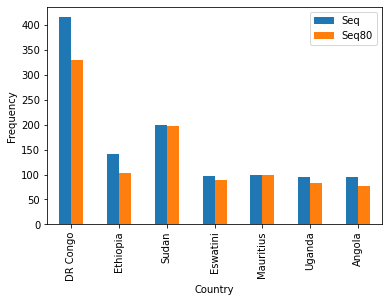

In [111]:
y1 = [415, 142, 199, 98, 100, 96, 95]
y2 = [330, 104, 197, 89, 100, 84, 78]
x = ['DR Congo', 'Ethiopia', 'Sudan', 'Eswatini', 'Mauritius', 'Uganda', 'Angola']
df = pd.DataFrame({'Country': x, 'Seq': y1, 'Seq80':y2}).set_index('Country')
df
f,ax = plt.subplots()
df.plot(kind='bar', ylabel='Frequency', ax=ax)
plt.show()


<AxesSubplot:xlabel='G_FRAC', ylabel='Count'>

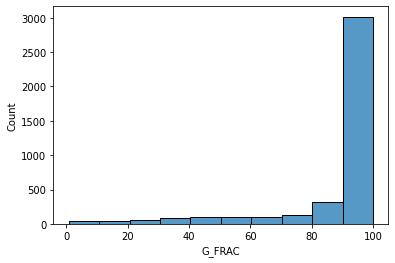

In [112]:
sns.histplot(sequenced.G_FRAC, bins=10)

In [113]:
import altair as alt
from vega_datasets import data

# d = data.barley()
# alt.Chart(sequenced).mark_bar().encode(
#     x=alt.X('sum(yield)', stack="normalize"),
#     y='variety',
#     color='site'
# )

In [114]:
def replace_with_who_lin(x):
    if x == 'B.1.1.7':
        return x.replace(x, 'Alpha')
    elif x == 'B.1.617.2':
        return x.replace(x, 'Delta')
    elif x == 'B.1':
        return x.replace(x, 'Beta')
    elif x == 'B.1.525':
        return x.replace(x, 'Eta')
    elif 'AY' in str(x):
        return str(x).replace(str(x), 'Delta')
    elif x == 'B.1.1.529':
        return x.replace(x, 'Omicron')
    elif 'BA' in str(x):
        return str(x).replace(str(x), 'Omicron')
    return x
    

In [115]:
sequenced['LIN'] = sequenced.LIN.apply(lambda x: replace_with_who_lin(x))

In [116]:
sequenced.head()#.LIN.apply(lambda x: replace_with_who_lin(x))

,S_NUM,G_FRAC,CASE_ID,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,...,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10,SEQ_TECH
0,COVC00854,96.0,NaN,23.0,F,NaN,Kenya,Nairobi,Embakasi east,No,...,NaN,NaN,NaN,NaN,F3S,R195K,NaN,NaN,NaN,Illumina
1,COVC00867,79.4,NaN,32.0,F,Food handler,Kenya,Nairobi,Kasarani,No,...,NaN,NaN,NaN,NaN,F3S,NaN,NaN,NaN,NaN,Illumina
2,COVC00893,88.8,NaN,31.0,M,Food handler,Kenya,Nairobi,Starehe,No,...,NaN,NaN,NaN,NaN,F3S,NaN,NaN,NaN,I13M,Illumina
3,COVC00915,NaN,NaN,22.0,M,Food handler,Kenya,Nairobi,Dagoretti,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illumina
4,COVC00962,94.0,NaN,31.0,M,Food handler,Kenya,Nairobi,Embakasi,No,...,NaN,NaN,NaN,NaN,NaN,D341Y,NaN,NaN,NaN,Illumina


In [147]:
top10 = sequenced.LIN.value_counts()[:4].index
top8 = sequenced.NAT.value_counts()[:8].index


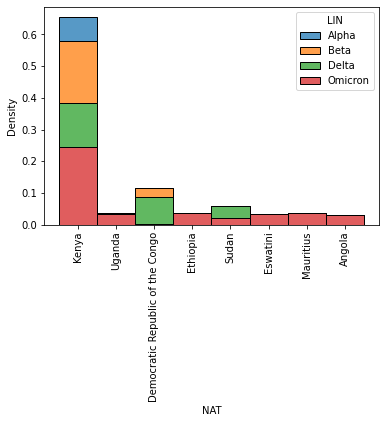

In [156]:
data = sequenced[sequenced.LIN.isin(top10) & sequenced.NAT.isin(top8)]
f,ax = plt.subplots()
sns.histplot(data, x='NAT', 
            hue='LIN',multiple="stack",
             hue_order=reversed(data.LIN.value_counts().index),
          legend=True, ax=ax,stat='density')
plt.xticks(rotation=90)
plt.show()

In [151]:
l = [l.get_text() for l in ax.get_xticklabels()]
l

['Kenya',
 'Uganda',
 'Malawi',
 'Philippines',
 'India',
 'South Sudan',
 'Brazil',
 'Democratic Republic of the Congo',
 'Zimbabwe',
 'Tanzania',
 'South Africa',
 'United Kingdom (UK)',
 'Botswana',
 'United States of America (USA)',
 'Netherlands',
 'Burundi',
 'Canada',
 'France',
 'Ethiopia',
 'Sudan',
 'Eswatini',
 'Mauritius',
 'Angola']

### Merge Seq Datd with metadata

In [25]:
seq = pd.read_excel('/home/douso/SARS-CoV-2/Outputs/all-sequenced-ILL-ONT-plus-metadata_07-06-2022.xlsx')
seq.head()

,abbr,S_NUM,G_FRAC,CASE_ID,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,...,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10,SEQ_TECH
0,desc,Unique lab ID,Genome fraction (%),Source sample ID,Age in years,Gender,Occupation,Nationality,County of residence,Sub-county of residence,...,Membrane,Open Reading Frame 6a,Open Reading Frame 7a,Open Reading Frame 7b,Open Reading Frame 8,Nucleocapsid,Open Reading Frame 9a,Open Reading Frame 9b,Open Reading Frame 10,Sequencing technology
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,COVC00854,96,NaN,23,F,NaN,Kenya,Nairobi,Embakasi east,...,NaN,NaN,NaN,NaN,F3S,R195K,NaN,NaN,NaN,Illumina
3,1,COVC00867,79.4,NaN,32,F,Food handler,Kenya,Nairobi,Kasarani,...,NaN,NaN,NaN,NaN,F3S,NaN,NaN,NaN,NaN,Illumina
4,2,COVC00893,88.8,NaN,31,M,Food handler,Kenya,Nairobi,Starehe,...,NaN,NaN,NaN,NaN,F3S,NaN,NaN,NaN,I13M,Illumina


In [26]:
seq.shape[0]

4403

In [27]:
seqdedub = seq.sort_values(['S_NUM', 'G_FRAC']).drop_duplicates('S_NUM', keep='last').loc[2:,:]
seqdedub.shape[0]

4169

In [28]:
seqdedub.head(2)

,abbr,S_NUM,G_FRAC,CASE_ID,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,...,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10,SEQ_TECH
2,0,COVC00854,96,NaN,23,F,NaN,Kenya,Nairobi,Embakasi east,...,NaN,NaN,NaN,NaN,F3S,R195K,NaN,NaN,NaN,Illumina
3,1,COVC00867,79.4,NaN,32,F,Food handler,Kenya,Nairobi,Kasarani,...,NaN,NaN,NaN,NaN,F3S,NaN,NaN,NaN,NaN,Illumina


In [29]:
df_meta.shape[0]

29811

In [30]:
metaminusseq = df_meta[~df_meta.S_NUM.isin(seq.S_NUM)]
metaminusseq.shape[0]

25657

In [31]:
complete = metaminusseq.append(seqdedub, ignore_index=True)
complete.shape[0]

29826

In [32]:
complete.sort_values('S_NUM').to_excel('/home/douso/Documents/complete.xlsx', index=False)

In [34]:
complete.columns

Index(['abbr', 'S_NUM', 'CASE_ID', 'AGE_YRS', 'GEND', 'OCCU', 'NAT',
       'COUNT_RES', 'S_COUNT_RES', 'TRAV_HIST', 'TRAV_FROM', 'QUAR_PLACE',
       'SYMPS', 'SAMP_TYPE', 'DT_SAM_COLL', 'DT_SAM_RECEP', 'RESULT',
       'DT_CONF', 'VACC_STATUS', 'VACC_DOS', 'RTPCR_POS', 'AVG_Ct', 'DT_RUN',
       'G_FRAC', 'LIN', 'CLD', 'S', 'ORF1ab', 'ORF1a', 'ORF3a', 'ORF3b', 'E',
       'M', 'ORF6', 'ORF7a', 'ORF7b', 'ORF8', 'N', 'ORF9a', 'ORF9b', 'ORF10',
       'SEQ_TECH'],
      dtype='object')

In [36]:
complete.sample(10)

,abbr,S_NUM,CASE_ID,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,...,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10,SEQ_TECH
5220,5356,COVC05357,047/K/2316,30,M,Clinical officer,Kenya,Nairobi,Kasarani,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14796,15090,COVC15091,LUS/066,15,F,Student,Kenya,Kiambu,Kikuyu,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10899,11092,COVC11093,NMS/EM/1098,37,M,Business,Kenya,Kiambu,Juja,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25011,27069,COVM00907,NPHL03/NVRL21-738,NaN,M,NaN,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7662,7841,COVC07842,NYR 1964,22,M,Casual Labourer,Kenya,Nyeri,Nyeri south,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7993,8173,COVC08174,047/TD/043,17,F,NaN,Kenya,Nairobi,South c,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2908,2982,COVC02983,ZN/014,26,M,NaN,Kenya,Nairobi,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5050,5184,COVC05185,NMS/PT/35,21,M,NaN,Kenya,Nairobi,Nairobi,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9982,10170,COVC10171,047/TD/701,49,M,Driver,Kenya,Embu,Embu,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17371,17819,COVC17820,NMS/EM/1701,36,F,NaN,Kenya,Nairobi,Warai,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## RF Report Jun22

In [ ]:
df_seq_summ = pd.read_excel(glob.glob(f'{parent_dir}/**/seq-summary-metadata-seq45_28-06-2022.xlsx')[0])
df_prev = pd.read_excel(glob.glob(f'{parent_dir}/RFellerReports/rf-20220629_ILRI_gisaid_submission_9_metadata.xls')[0], 
                              sheet_name='Submissions', usecols=['covv_provider_sample_id', 'covv_subm_sample_id'])#covv_subm_sample_id

IndexError: list index out of range

In [44]:
df_seq_summ. head(2)

,case_id,sequence_name,genome_coverage,lineage,clade,run_num,tech,seq_dt,lib_prep,primer_set,analysis_pipeline,sno.
0,MUS/35032/2022,COVM03838,99.8,BA.4,22A (Omicron),Run45,NextSeq,24/06/2022,COVIDSeq,ARTIC_V3,nf-viralrecon-v2.4.1,NaN
1,MUS/34744/2022,COVM03789,99.8,BA.4,22A (Omicron),Run45,NextSeq,24/06/2022,COVIDSeq,ARTIC_V3,nf-viralrecon-v2.4.1,NaN


In [45]:
df_seq_summ.run_num.unique()

array(['Run45'], dtype=object)

In [46]:
mask1 = df_seq_summ.run_num.isin(['Run45'])#, 'Run41'


In [47]:
latest_seq = df_seq_summ[mask1 == True]
print(f'Total sequenced: {latest_seq.shape[0]}')

Total sequenced: 229


In [48]:
mask2, msk1, msk2, msk3 = (latest_seq.case_id.str.contains('SWZ/'), latest_seq.case_id.str.contains('MUS/'),
latest_seq.case_id.str.contains('MUS/'), latest_seq.case_id.str.contains('AGO/'))
# latest_eth = latest_seq[mask2 == True]
# latest_eth.shape[0]#latest_seq.shape[0] - 

In [49]:
print(f'Total submitted: {df_prev.shape[0] - 1}')

Total submitted: 227


In [50]:
mask3 = df_meta.S_NUM.isin(df_prev.covv_subm_sample_id)#covv_subm_sample_id
df_prev.head()

,covv_provider_sample_id,covv_subm_sample_id
0,Sample ID given by originating laboratory,Sample ID given by the submitting laboratory
1,COVM03638,COVM03638
2,COVM03639,COVM03639
3,COVM03641,COVM03641
4,COVM03642,COVM03642


In [51]:
sub_meta = df_meta[mask3 == True]
sub_meta.head(2)

,abbr,S_NUM,CASE_ID,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,...,SAMP_TYPE,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF,VACC_STATUS,VACC_DOS,RTPCR_POS,AVG_Ct,DT_RUN
29801,29799,COVM03638,UGC/ILRI001/2022,50,M,PASTOR,Kenya,Uasin gishu,Soy,No,...,NP & OP Swab,2022-06-06 00:00:00,2022-06-11 00:00:00,Positive,2022-06-16 00:00:00,Y,C,A01,29.8,2022-06-15 14:16:57
29802,29800,COVM03639,UGC/ILRI002/2022,30,M,STUDENT,Kenya,Uasin gishu,Kesses,Yes,...,NP & OP Swab,2022-06-08 00:00:00,2022-06-11 00:00:00,Positive,2022-06-16 00:00:00,N,NC,A02,27.7,2022-06-15 14:16:57


In [52]:
sub_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 29801 to 30040
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   abbr          227 non-null    object
 1   S_NUM         227 non-null    object
 2   CASE_ID       227 non-null    object
 3   AGE_YRS       224 non-null    object
 4   GEND          226 non-null    object
 5   OCCU          25 non-null     object
 6   NAT           227 non-null    object
 7   COUNT_RES     226 non-null    object
 8   S_COUNT_RES   30 non-null     object
 9   TRAV_HIST     227 non-null    object
 10  TRAV_FROM     6 non-null      object
 11  QUAR_PLACE    17 non-null     object
 12  SYMPS         23 non-null     object
 13  SAMP_TYPE     226 non-null    object
 14  DT_SAM_COLL   227 non-null    object
 15  DT_SAM_RECEP  216 non-null    object
 16  RESULT        7 non-null      object
 17  DT_CONF       17 non-null     object
 18  VACC_STATUS   182 non-null    object
 19  VA

In [53]:
sub_meta[sub_meta.DT_SAM_COLL.isna() == True].shape[0]

0

In [54]:
sub_fnl = sub_meta[sub_meta.DT_SAM_COLL.isna() == False]


In [55]:
sub_fnl.head(2)#.DT_SAM_COLL.astype('datetime64[ns]')

,abbr,S_NUM,CASE_ID,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,...,SAMP_TYPE,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF,VACC_STATUS,VACC_DOS,RTPCR_POS,AVG_Ct,DT_RUN
29801,29799,COVM03638,UGC/ILRI001/2022,50,M,PASTOR,Kenya,Uasin gishu,Soy,No,...,NP & OP Swab,2022-06-06 00:00:00,2022-06-11 00:00:00,Positive,2022-06-16 00:00:00,Y,C,A01,29.8,2022-06-15 14:16:57
29802,29800,COVM03639,UGC/ILRI002/2022,30,M,STUDENT,Kenya,Uasin gishu,Kesses,Yes,...,NP & OP Swab,2022-06-08 00:00:00,2022-06-11 00:00:00,Positive,2022-06-16 00:00:00,N,NC,A02,27.7,2022-06-15 14:16:57


In [58]:
latest_seq = sub_fnl
dt_delta = sub_fnl[~sub_fnl.CASE_ID.str.contains('MUS/')].DT_SAM_COLL.astype('datetime64[ns]') - pd.Timestamp('2022-07-07')
dt_delta1 = sub_fnl[sub_fnl.CASE_ID.str.contains('MUS/')].DT_SAM_COLL.astype('datetime64[ns]') - pd.Timestamp('2022-07-07')
# dt_delta2 = sub_fnl[msk2].DT_SAM_COLL.astype('datetime64[ns]') - pd.Timestamp('2022-06-02')
# dt_delta3 = sub_fnl[msk3].DT_SAM_COLL.astype('datetime64[ns]') - pd.Timestamp('2022-06-02')
print(f'Local: {dt_delta.mean()}')
print(f'Mauritius: {dt_delta1.mean()}')
# print(f'Uganda: {dt_delta2.mean()}')
# print(f'Angola: {dt_delta3.mean()}')

Local: -24 days +21:25:42.857142858
Mauritius: -44 days +02:31:57.587939699


## RF Report Jul20

In [8]:
df_seq_summ = pd.read_excel(glob.glob(f'{parent_dir}/Outputs/seq-summary-metadata_seq48_19-07-2022.xlsx')[0])
df_prev = pd.read_excel(glob.glob(f'{parent_dir}/RFellerReports/rf-20220720_ILRI_gisaid_submission_10_metadata.xls')[0], 
                              sheet_name='Submissions', usecols=['covv_provider_sample_id', 'covv_subm_sample_id'])#covv_subm_sample_id

In [9]:
parent_dir

'/home/kibet/bioinformatics/github/covid/data/SarsGenomics/SARS-CoV-2'

In [10]:
df_seq_summ. head(2)

,case_id,sequence_name,genome_coverage,lineage,clade,run_num,tech,seq_dt,lib_prep,primer_set,analysis_pipeline,sno.
0,NKR/002/2022,COVM03891,99.8,BA.5.2.1,22B (Omicron),Run48,NextSeq,15/07/2022,COVIDSeq,ARTIC_V3,nf-viralrecon-v2.4.1,NaN
1,NKR/003/2022,COVM03892,99.8,BA.5.2.1,22B (Omicron),Run48,NextSeq,15/07/2022,COVIDSeq,ARTIC_V3,nf-viralrecon-v2.4.1,NaN


In [11]:
df_seq_summ.run_num.unique()

array(['Run48'], dtype=object)

In [12]:
mask1 = df_seq_summ.run_num.isin(['Run48'])#, 'Run41'


In [13]:
latest_seq = df_seq_summ[mask1 == True]
print(f'Total sequenced: {latest_seq.shape[0]}')

Total sequenced: 49


In [14]:
mask2, msk1, msk2, msk3 = (latest_seq.case_id.str.contains('SWZ/'), latest_seq.case_id.str.contains('MUS/'),
latest_seq.case_id.str.contains('MUS/'), latest_seq.case_id.str.contains('AGO/'))
# latest_eth = latest_seq[mask2 == True]
# latest_eth.shape[0]#latest_seq.shape[0] - 

In [15]:
print(f'Total submitted: {df_prev.shape[0] - 1}')

Total submitted: 49


In [16]:
mask3 = df_meta.S_NUM.isin(df_prev.covv_subm_sample_id)#covv_subm_sample_id
df_prev.head()

,covv_provider_sample_id,covv_subm_sample_id
0,Sample ID given by originating laboratory,Sample ID given by the submitting laboratory
1,COVM03878,COVM03878
2,COVM03879,COVM03879
3,COVM03880,COVM03880
4,COVM03881,COVM03881


In [17]:
sub_meta = df_meta[mask3 == True]
sub_meta.head(2)

,abbr,S_NUM,CASE_ID,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,...,SAMP_TYPE,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF,VACC_STATUS,VACC_DOS,RTPCR_POS,AVG_Ct,DT_RUN
30041,30039,COVM03878,BMT/002/2022,NaN,NaN,NaN,NaN,Bomet,Bomet central,No,...,NaN,2022-06-20 00:00:00,NaN,NaN,2022-07-13 00:00:00,NaN,NaN,A01,31.4,2022-07-13 15:07:39
30042,30040,COVM03879,NYA/KIN090/2022,67,F,Farmer,Kenya,Nyandarua,Kinangop,No,...,NP Swab,2022-06-22 00:00:00,2022-06-30 00:00:00,NaN,2022-07-13 00:00:00,Yes,C,A02,32,2022-07-13 15:07:39


In [18]:
sub_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 30041 to 30102
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   abbr          49 non-null     object
 1   S_NUM         49 non-null     object
 2   CASE_ID       49 non-null     object
 3   AGE_YRS       48 non-null     object
 4   GEND          48 non-null     object
 5   OCCU          42 non-null     object
 6   NAT           48 non-null     object
 7   COUNT_RES     49 non-null     object
 8   S_COUNT_RES   44 non-null     object
 9   TRAV_HIST     49 non-null     object
 10  TRAV_FROM     1 non-null      object
 11  QUAR_PLACE    20 non-null     object
 12  SYMPS         26 non-null     object
 13  SAMP_TYPE     48 non-null     object
 14  DT_SAM_COLL   49 non-null     object
 15  DT_SAM_RECEP  48 non-null     object
 16  RESULT        0 non-null      object
 17  DT_CONF       49 non-null     object
 18  VACC_STATUS   41 non-null     object
 19  VAC

In [19]:
sub_meta[sub_meta.DT_SAM_COLL.isna() == True].shape[0]

0

In [20]:
sub_fnl = sub_meta[sub_meta.DT_SAM_COLL.isna() == False]


In [21]:
sub_fnl.head(2)#.DT_SAM_COLL.astype('datetime64[ns]')

,abbr,S_NUM,CASE_ID,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,...,SAMP_TYPE,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF,VACC_STATUS,VACC_DOS,RTPCR_POS,AVG_Ct,DT_RUN
30041,30039,COVM03878,BMT/002/2022,NaN,NaN,NaN,NaN,Bomet,Bomet central,No,...,NaN,2022-06-20 00:00:00,NaN,NaN,2022-07-13 00:00:00,NaN,NaN,A01,31.4,2022-07-13 15:07:39
30042,30040,COVM03879,NYA/KIN090/2022,67,F,Farmer,Kenya,Nyandarua,Kinangop,No,...,NP Swab,2022-06-22 00:00:00,2022-06-30 00:00:00,NaN,2022-07-13 00:00:00,Yes,C,A02,32,2022-07-13 15:07:39


In [22]:
latest_seq = sub_fnl
dt_delta = sub_fnl[~sub_fnl.CASE_ID.str.contains('MUS/')].DT_SAM_COLL.astype('datetime64[ns]') - pd.Timestamp('2022-07-07')
dt_delta1 = sub_fnl[sub_fnl.CASE_ID.str.contains('MUS/')].DT_SAM_COLL.astype('datetime64[ns]') - pd.Timestamp('2022-07-07')
# dt_delta2 = sub_fnl[msk2].DT_SAM_COLL.astype('datetime64[ns]') - pd.Timestamp('2022-06-02')
# dt_delta3 = sub_fnl[msk3].DT_SAM_COLL.astype('datetime64[ns]') - pd.Timestamp('2022-06-02')
print(f'Local: {dt_delta.mean()}')
print(f'Mauritius: {dt_delta1.mean()}')
# print(f'Uganda: {dt_delta2.mean()}')
# print(f'Angola: {dt_delta3.mean()}')

Local: -11 days +23:01:13.469387756
Mauritius: NaT


## RF Report Jun22

In [43]:
df_seq_summ = pd.read_excel(glob.glob(f'{parent_dir}/**/seq-summary-metadata-seq45_28-06-2022.xlsx')[0])
df_prev = pd.read_excel(glob.glob(f'{parent_dir}/RFellerReports/rf-20220629_ILRI_gisaid_submission_9_metadata.xls')[0], 
                              sheet_name='Submissions', usecols=['covv_provider_sample_id', 'covv_subm_sample_id'])#covv_subm_sample_id

In [44]:
df_seq_summ. head(2)

,case_id,sequence_name,genome_coverage,lineage,clade,run_num,tech,seq_dt,lib_prep,primer_set,analysis_pipeline,sno.
0,MUS/35032/2022,COVM03838,99.8,BA.4,22A (Omicron),Run45,NextSeq,24/06/2022,COVIDSeq,ARTIC_V3,nf-viralrecon-v2.4.1,NaN
1,MUS/34744/2022,COVM03789,99.8,BA.4,22A (Omicron),Run45,NextSeq,24/06/2022,COVIDSeq,ARTIC_V3,nf-viralrecon-v2.4.1,NaN


In [45]:
df_seq_summ.run_num.unique()

array(['Run45'], dtype=object)

In [46]:
mask1 = df_seq_summ.run_num.isin(['Run45'])#, 'Run41'


In [47]:
latest_seq = df_seq_summ[mask1 == True]
print(f'Total sequenced: {latest_seq.shape[0]}')

Total sequenced: 229


In [48]:
mask2, msk1, msk2, msk3 = (latest_seq.case_id.str.contains('SWZ/'), latest_seq.case_id.str.contains('MUS/'),
latest_seq.case_id.str.contains('MUS/'), latest_seq.case_id.str.contains('AGO/'))
# latest_eth = latest_seq[mask2 == True]
# latest_eth.shape[0]#latest_seq.shape[0] - 

In [49]:
print(f'Total submitted: {df_prev.shape[0] - 1}')

Total submitted: 227


In [50]:
mask3 = df_meta.S_NUM.isin(df_prev.covv_subm_sample_id)#covv_subm_sample_id
df_prev.head()

,covv_provider_sample_id,covv_subm_sample_id
0,Sample ID given by originating laboratory,Sample ID given by the submitting laboratory
1,COVM03638,COVM03638
2,COVM03639,COVM03639
3,COVM03641,COVM03641
4,COVM03642,COVM03642


In [51]:
sub_meta = df_meta[mask3 == True]
sub_meta.head(2)

,abbr,S_NUM,CASE_ID,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,...,SAMP_TYPE,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF,VACC_STATUS,VACC_DOS,RTPCR_POS,AVG_Ct,DT_RUN
29801,29799,COVM03638,UGC/ILRI001/2022,50,M,PASTOR,Kenya,Uasin gishu,Soy,No,...,NP & OP Swab,2022-06-06 00:00:00,2022-06-11 00:00:00,Positive,2022-06-16 00:00:00,Y,C,A01,29.8,2022-06-15 14:16:57
29802,29800,COVM03639,UGC/ILRI002/2022,30,M,STUDENT,Kenya,Uasin gishu,Kesses,Yes,...,NP & OP Swab,2022-06-08 00:00:00,2022-06-11 00:00:00,Positive,2022-06-16 00:00:00,N,NC,A02,27.7,2022-06-15 14:16:57


In [52]:
sub_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 29801 to 30040
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   abbr          227 non-null    object
 1   S_NUM         227 non-null    object
 2   CASE_ID       227 non-null    object
 3   AGE_YRS       224 non-null    object
 4   GEND          226 non-null    object
 5   OCCU          25 non-null     object
 6   NAT           227 non-null    object
 7   COUNT_RES     226 non-null    object
 8   S_COUNT_RES   30 non-null     object
 9   TRAV_HIST     227 non-null    object
 10  TRAV_FROM     6 non-null      object
 11  QUAR_PLACE    17 non-null     object
 12  SYMPS         23 non-null     object
 13  SAMP_TYPE     226 non-null    object
 14  DT_SAM_COLL   227 non-null    object
 15  DT_SAM_RECEP  216 non-null    object
 16  RESULT        7 non-null      object
 17  DT_CONF       17 non-null     object
 18  VACC_STATUS   182 non-null    object
 19  VA

In [53]:
sub_meta[sub_meta.DT_SAM_COLL.isna() == True].shape[0]

0

In [54]:
sub_fnl = sub_meta[sub_meta.DT_SAM_COLL.isna() == False]


In [55]:
sub_fnl.head(2)#.DT_SAM_COLL.astype('datetime64[ns]')

,abbr,S_NUM,CASE_ID,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,...,SAMP_TYPE,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF,VACC_STATUS,VACC_DOS,RTPCR_POS,AVG_Ct,DT_RUN
29801,29799,COVM03638,UGC/ILRI001/2022,50,M,PASTOR,Kenya,Uasin gishu,Soy,No,...,NP & OP Swab,2022-06-06 00:00:00,2022-06-11 00:00:00,Positive,2022-06-16 00:00:00,Y,C,A01,29.8,2022-06-15 14:16:57
29802,29800,COVM03639,UGC/ILRI002/2022,30,M,STUDENT,Kenya,Uasin gishu,Kesses,Yes,...,NP & OP Swab,2022-06-08 00:00:00,2022-06-11 00:00:00,Positive,2022-06-16 00:00:00,N,NC,A02,27.7,2022-06-15 14:16:57


In [58]:
latest_seq = sub_fnl
dt_delta = sub_fnl[~sub_fnl.CASE_ID.str.contains('MUS/')].DT_SAM_COLL.astype('datetime64[ns]') - pd.Timestamp('2022-07-07')
dt_delta1 = sub_fnl[sub_fnl.CASE_ID.str.contains('MUS/')].DT_SAM_COLL.astype('datetime64[ns]') - pd.Timestamp('2022-07-07')
# dt_delta2 = sub_fnl[msk2].DT_SAM_COLL.astype('datetime64[ns]') - pd.Timestamp('2022-06-02')
# dt_delta3 = sub_fnl[msk3].DT_SAM_COLL.astype('datetime64[ns]') - pd.Timestamp('2022-06-02')
print(f'Local: {dt_delta.mean()}')
print(f'Mauritius: {dt_delta1.mean()}')
# print(f'Uganda: {dt_delta2.mean()}')
# print(f'Angola: {dt_delta3.mean()}')

Local: -24 days +21:25:42.857142858
Mauritius: -44 days +02:31:57.587939699
